In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import time
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

# Get data from INSEE and from openData

### https://www.data.gouv.fr/fr/datasets/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/

### https://www.insee.fr/fr/information/4477356

### this last file has been modified a bit: departement 1->9 were rewritten 01 to 09

In [2]:
dfMvt=pd.read_csv('data/populationMvt/donnees-confinement.csv',sep=';',encoding = "ISO-8859-1")

In [3]:
dfMvt['Scenario1_Nuitees_avant_confinement']=dfMvt['Scenario1_Nuitees_avant_confinement'].str.replace(' ','')
dfMvt['Scenario1_Nuiteestotales_ecart_lie_au_confinement']=dfMvt['Scenario1_Nuiteestotales_ecart_lie_au_confinement'].str.replace(' ','')

In [4]:
dfMvt.columns

Index(['Code_departement', 'Departement', 'PopRP_101jan2020',
       'Scenario1_Nuitees_avant_confinement',
       'Scenario1_Enuiteestotales_Evolution_pourcentage_nuitees_avant_confinement',
       'Scenario1_Nuiteestotales_ecart_lie_au_confinement',
       'Scenario1_Nuiteesresidentsdansdepartement_Partdansnuiteestotales',
       'Scenario1_Nuiteesresidentsdansdepartement_ecart_lie_au_confinement',
       'Scenario1_Evolution_residentsdansdepartement_pourcentage_nuiteestotales_avant_confinement',
       'Scenario1_Nuiteesresidentshorsdepartement_Partdansnuiteestotales',
       'Scenario1_Nuiteesresidentshorsdepartement_ecart_lie_au_confinement',
       'Scenario1_Evolution_residentshorsdepartement_pourcentage_nuiteestotales_avant_confinement',
       'Scenario1_nuitees_etrangers_avant_confinement_SourceOrange',
       'Scenario1_Nuiteesetrangers_ecart_lie_au_confinement_sourceOrange',
       'Scenario1_Evolution_etrangers_pourcentage_nuiteestotales_avant_confinement',
       'Scenari

In [5]:
df=pd.read_csv('data/donnees-hospitalieres-covid19-2020-04-12-19h00.csv',sep=';')
dfNew=pd.read_csv('data/donnees-hospitalieres-nouveaux-covid19-2020-04-12-19h00.csv',sep=';')
# keep only lines with no sex
df=df[df['sexe']==0]
#dfNew=dfNew[dfNew['sexe']==0]

In [6]:
print(df.columns)
print(dfNew.columns)

Index(['dep', 'sexe', 'jour', 'hosp', 'rea', 'rad', 'dc'], dtype='object')
Index(['dep', 'jour', 'incid_hosp', 'incid_rea', 'incid_dc', 'incid_rad'], dtype='object')


# use dates: more convenient

In [7]:
df['date']=pd.to_datetime(df['jour'])
dfNew['date']=pd.to_datetime(dfNew['jour'])
#df[df['date']=='2020-04-12']

# national count

In [8]:
dfGB=pd.DataFrame(df.groupby(['dep','date'])['hosp','rea','rad','dc'].sum()).reset_index()
#print(dfGB[dfGB['date']=='2020-04-12'])
dfGB=pd.DataFrame(df.groupby(['date'])['hosp','rea','rad','dc'].sum()).reset_index()
#print(dfGB[dfGB['date']=='2020-04-12'])

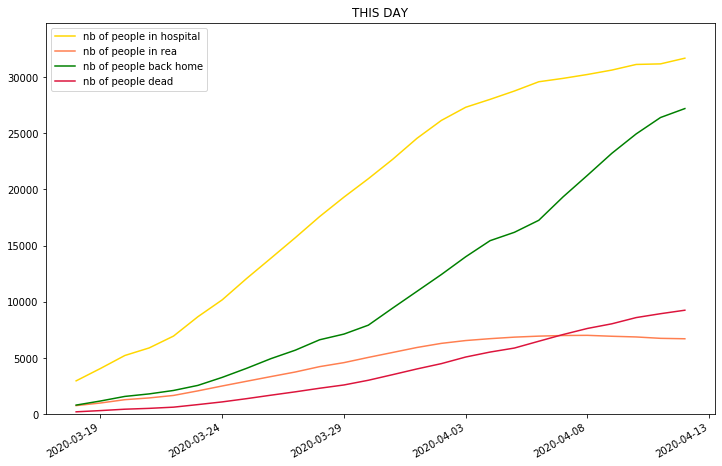

In [9]:
# compute people getting out of the hospital every day and people dying
#dfGB['sortie']=dfGB['rad']-dfGB['rad'].shift(1)
#dfGB['dead']=dfGB['dc']-dfGB['dc'].shift(1)
        
# to have same yaxis on every chart, take max for of all variables
yaxis_max=np.max(dfGB[['hosp','rea','rad','dc']].max(axis=0))*1.1
yaxis_max=max(1000,yaxis_max)

plt.figure(figsize=(12,8))
plt.subplot(111)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.plot(dfGB['date'].tolist(),dfGB['hosp'],color='gold',label='nb of people in hospital')
plt.plot(dfGB['date'].tolist(),dfGB['rea'],color='coral',label='nb of people in rea')
plt.plot(dfGB['date'].tolist(),dfGB['rad'],color='green',label='nb of people back home')
plt.plot(dfGB['date'].tolist(),dfGB['dc'],color='crimson',label='nb of people dead')

plt.gcf().autofmt_xdate()
plt.ylim((0,yaxis_max))
plt.title('THIS DAY')
plt.legend(loc='upper left')
plt.show()

# group data by department and date

In [10]:
dfGB=pd.DataFrame(df.groupby(['dep','date'])['hosp','rea','rad','dc'].sum()).reset_index()
dfGBnew=pd.DataFrame(dfNew.groupby(['dep','date'])['incid_hosp','incid_rea','incid_rad','incid_dc'].sum()).reset_index()

# Create basic curves for each department

In [12]:
confinementDay=datetime(2020,3,17)

start with dep 01 --------------------------------------------------------------------------------------- 
Departement 01 Ain


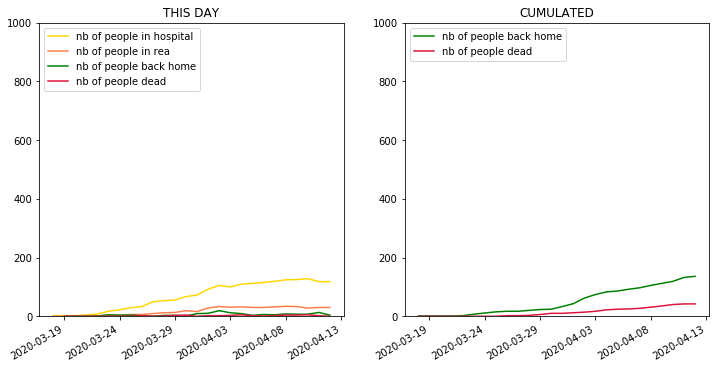

start with dep 02 --------------------------------------------------------------------------------------- 
Departement 02 Aisne


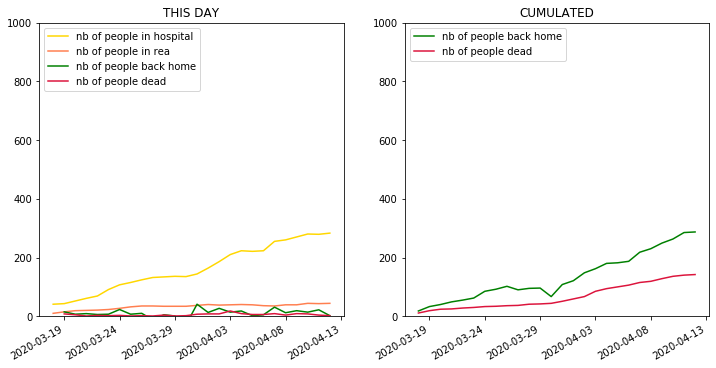

start with dep 03 --------------------------------------------------------------------------------------- 
Departement 03 Allier


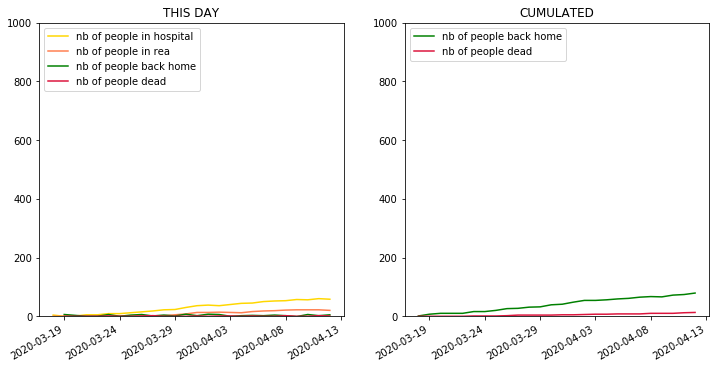

start with dep 04 --------------------------------------------------------------------------------------- 
Departement 04 Alpes-de-Haute-Provence


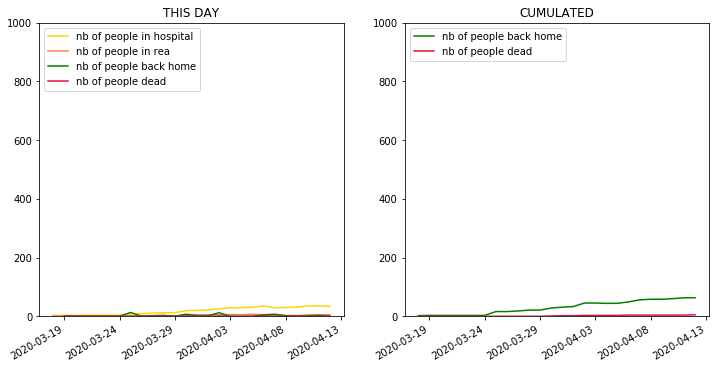

start with dep 05 --------------------------------------------------------------------------------------- 
Departement 05 Hautes-Alpes


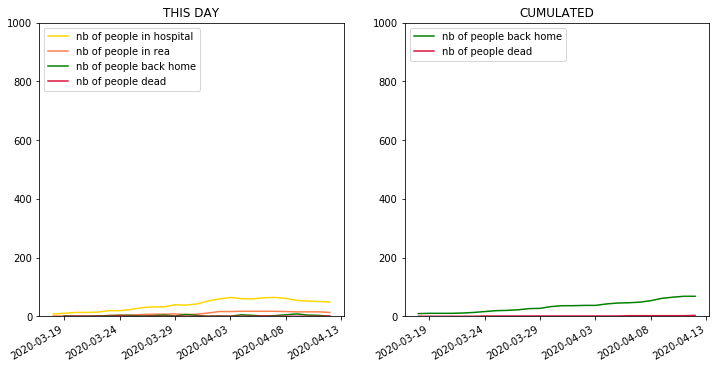

start with dep 06 --------------------------------------------------------------------------------------- 
Departement 06 Alpes-Maritimes


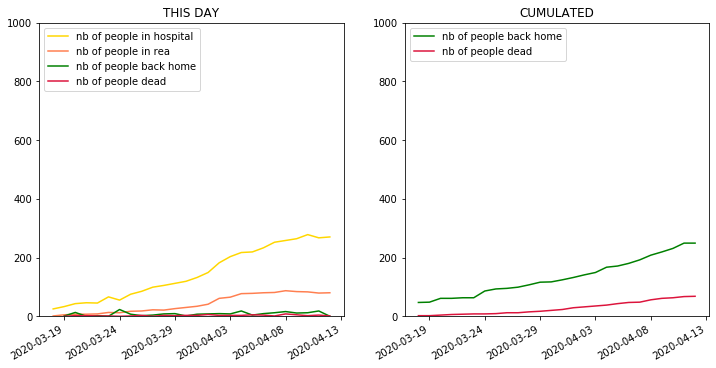

start with dep 07 --------------------------------------------------------------------------------------- 
Departement 07 Ardèche


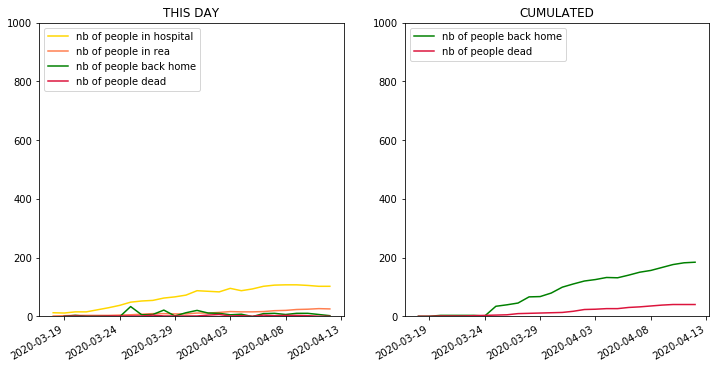

start with dep 08 --------------------------------------------------------------------------------------- 
Departement 08 Ardennes


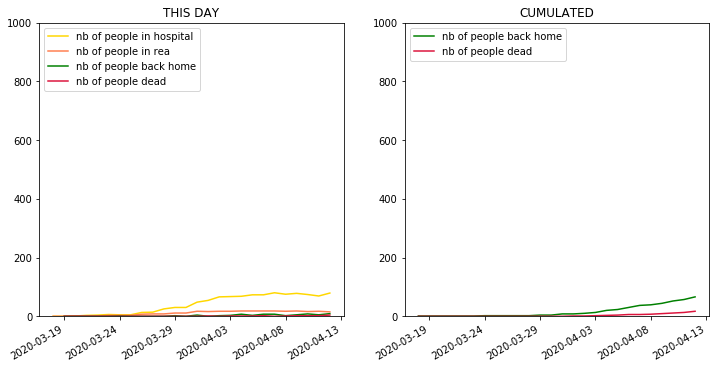

start with dep 09 --------------------------------------------------------------------------------------- 
Departement 09 Ariège


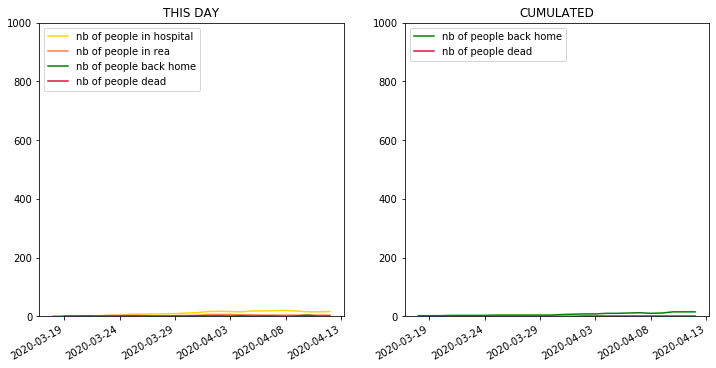

start with dep 10 --------------------------------------------------------------------------------------- 
Departement 10 Aube


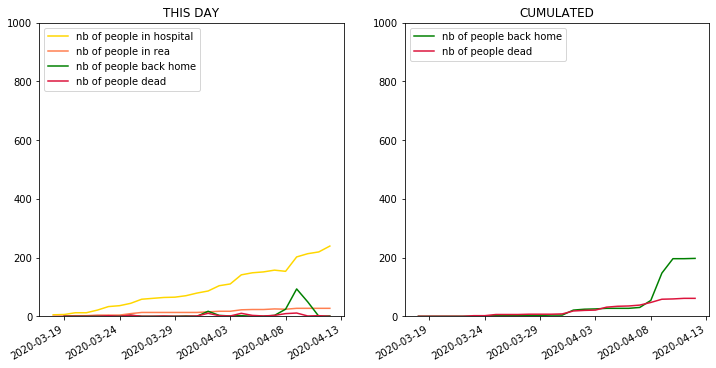

start with dep 11 --------------------------------------------------------------------------------------- 
Departement 11 Aude


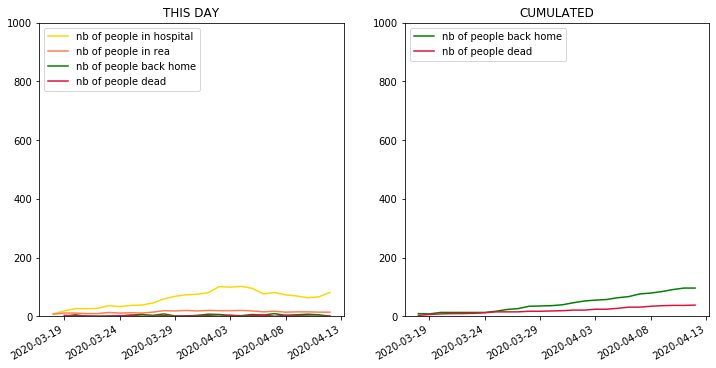

start with dep 12 --------------------------------------------------------------------------------------- 
Departement 12 Aveyron


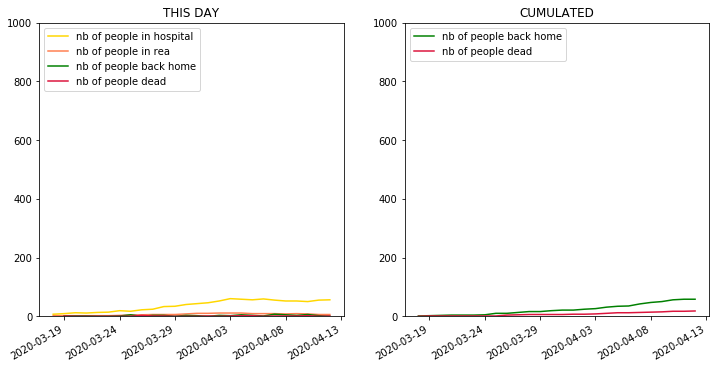

start with dep 13 --------------------------------------------------------------------------------------- 
Departement 13 Bouches-du-Rhône


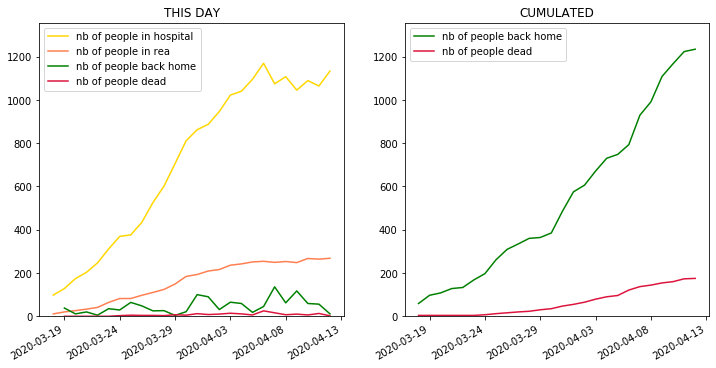

start with dep 14 --------------------------------------------------------------------------------------- 
Departement 14 Calvados


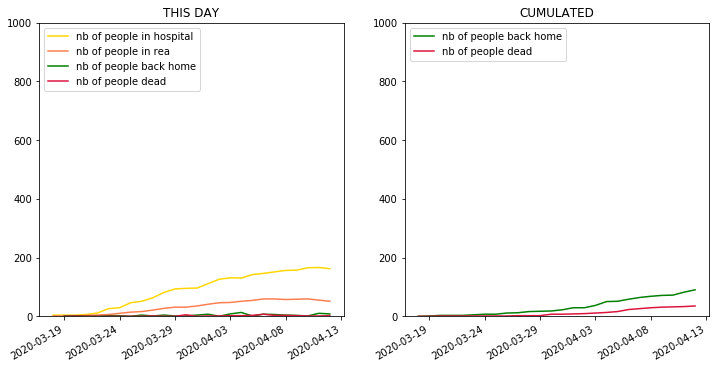

start with dep 15 --------------------------------------------------------------------------------------- 
Departement 15 Cantal


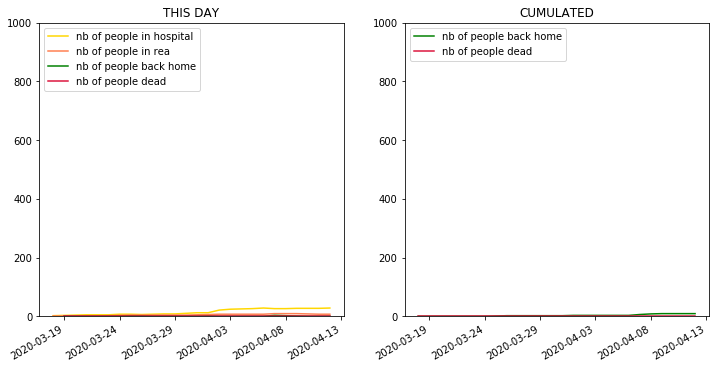

start with dep 16 --------------------------------------------------------------------------------------- 
Departement 16 Charente


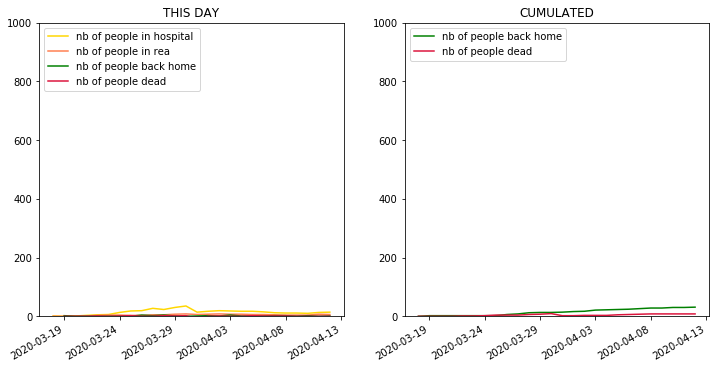

start with dep 17 --------------------------------------------------------------------------------------- 
Departement 17 Charente-Maritime


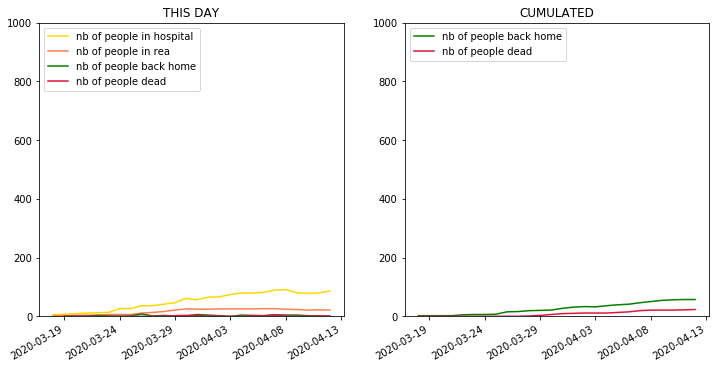

start with dep 18 --------------------------------------------------------------------------------------- 
Departement 18 Cher


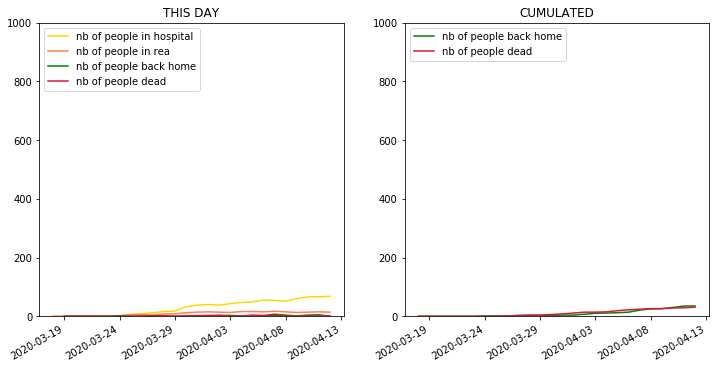

start with dep 19 --------------------------------------------------------------------------------------- 
Departement 19 Corrèze


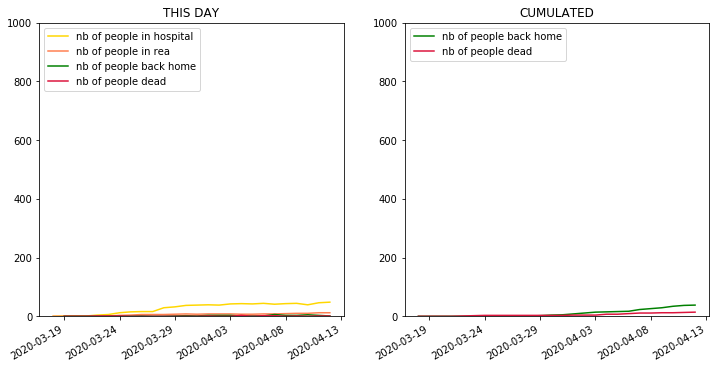

start with dep 21 --------------------------------------------------------------------------------------- 
Departement 21 Côte-d'Or


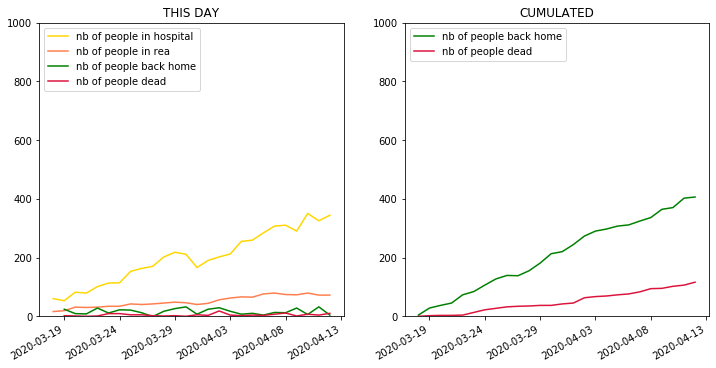

start with dep 22 --------------------------------------------------------------------------------------- 
Departement 22 Côtes-d'Armor


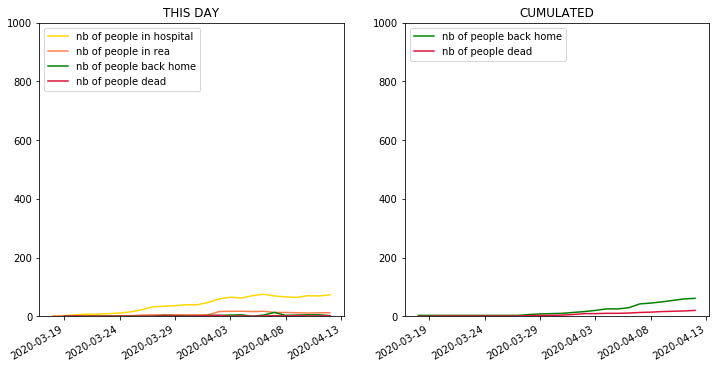

start with dep 23 --------------------------------------------------------------------------------------- 
Departement 23 Creuse


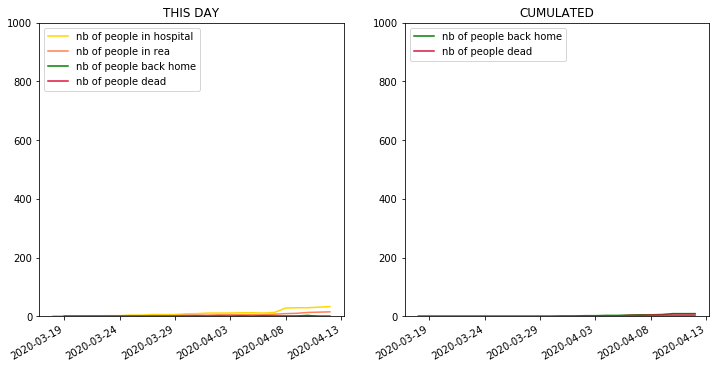

start with dep 24 --------------------------------------------------------------------------------------- 
Departement 24 Dordogne


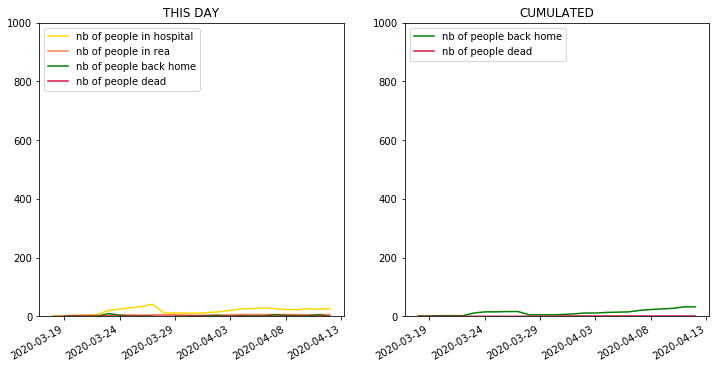

start with dep 25 --------------------------------------------------------------------------------------- 
Departement 25 Doubs


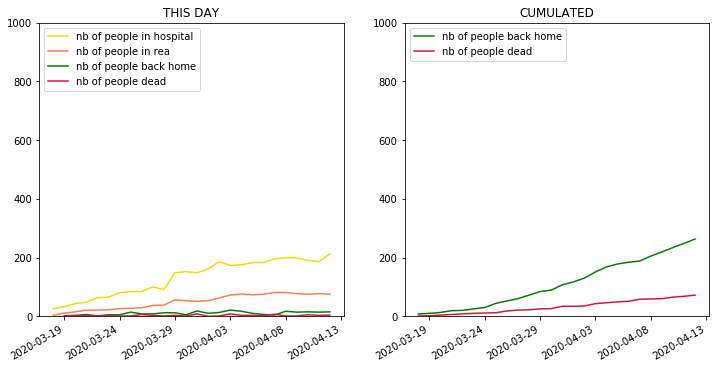

start with dep 26 --------------------------------------------------------------------------------------- 
Departement 26 Drôme


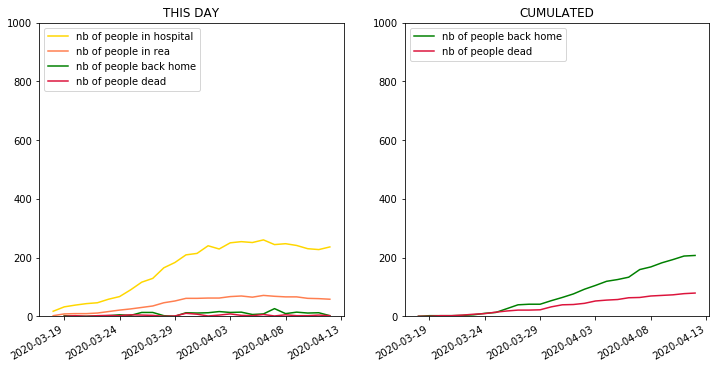

start with dep 27 --------------------------------------------------------------------------------------- 
Departement 27 Eure


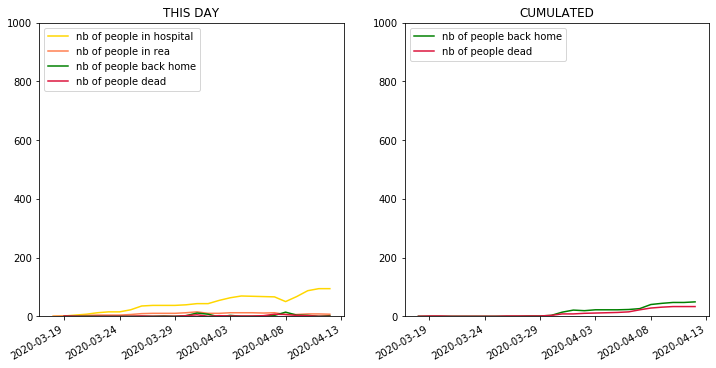

start with dep 28 --------------------------------------------------------------------------------------- 
Departement 28 Eure-et-Loir


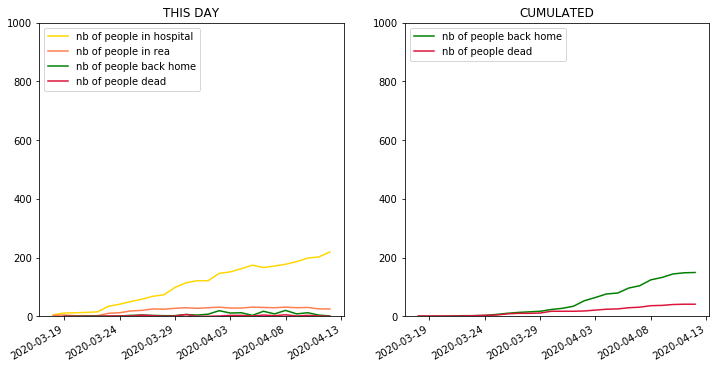

start with dep 29 --------------------------------------------------------------------------------------- 
Departement 29 Finistère


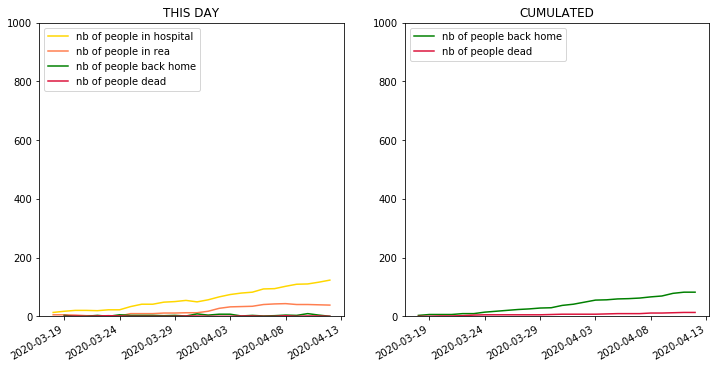

start with dep 2A --------------------------------------------------------------------------------------- 
Departement 2A Corse-du-Sud


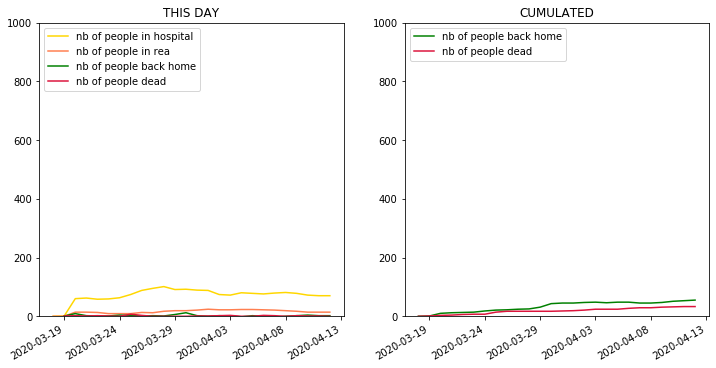

start with dep 2B --------------------------------------------------------------------------------------- 
Departement 2B Haute-Corse


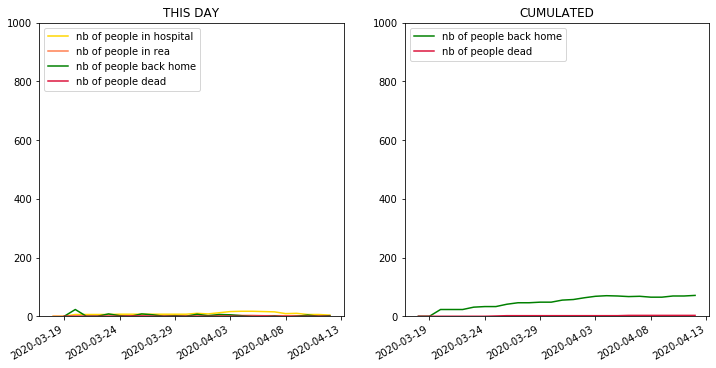

start with dep 30 --------------------------------------------------------------------------------------- 
Departement 30 Gard


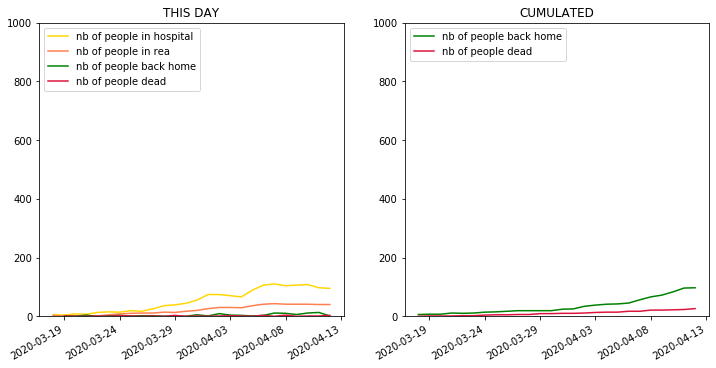

start with dep 31 --------------------------------------------------------------------------------------- 
Departement 31 Haute-Garonne


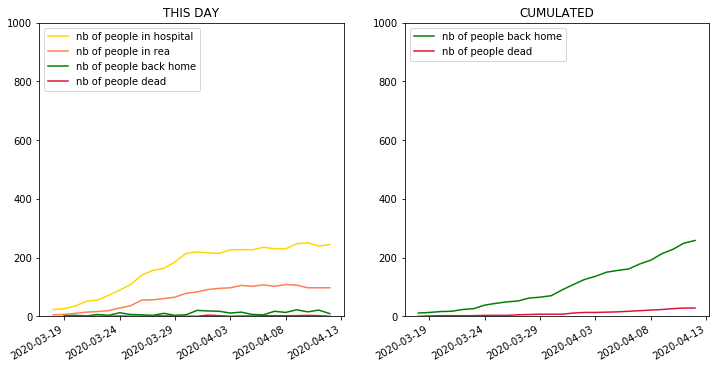

start with dep 32 --------------------------------------------------------------------------------------- 
Departement 32 Gers


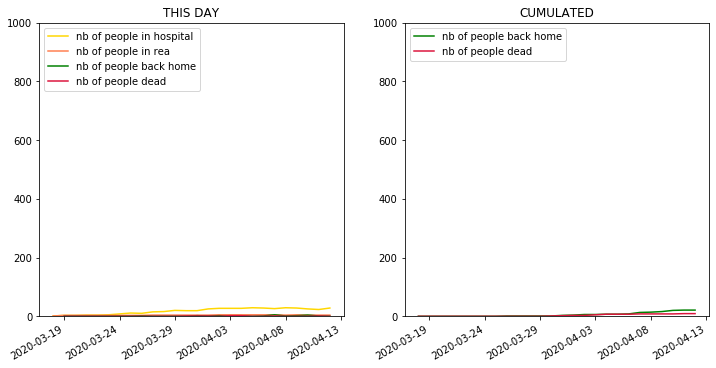

start with dep 33 --------------------------------------------------------------------------------------- 
Departement 33 Gironde


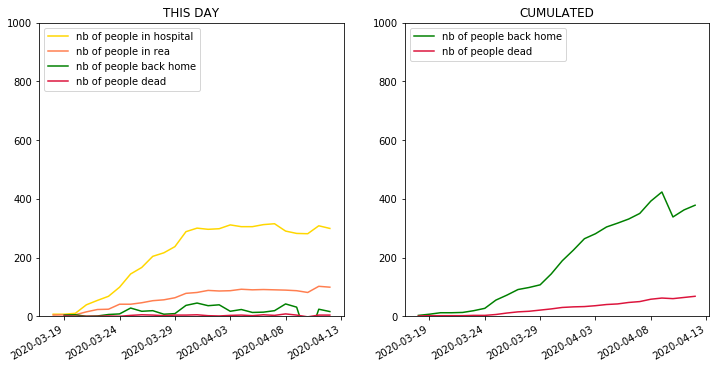

start with dep 34 --------------------------------------------------------------------------------------- 
Departement 34 Hérault


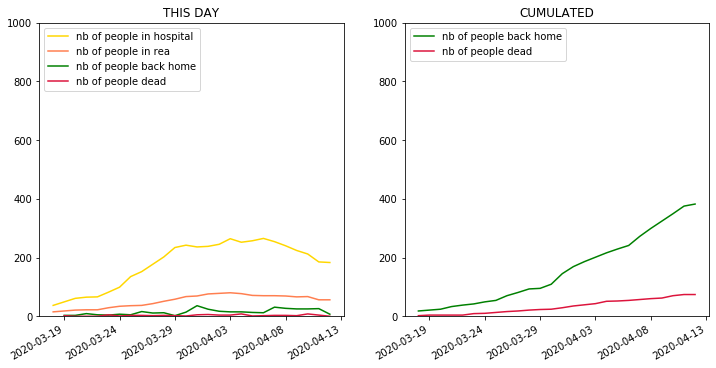

start with dep 35 --------------------------------------------------------------------------------------- 
Departement 35 Ille-et-Vilaine


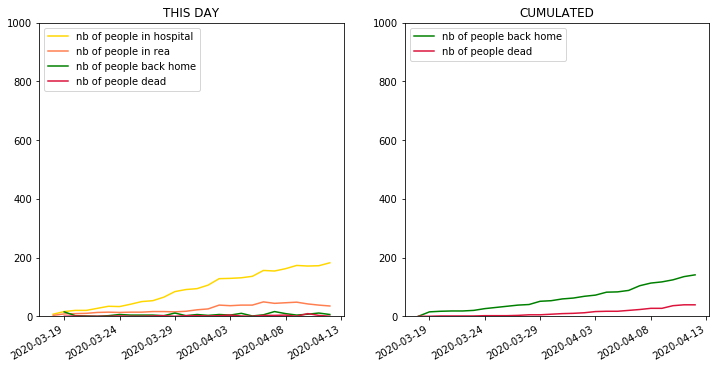

start with dep 36 --------------------------------------------------------------------------------------- 
Departement 36 Indre


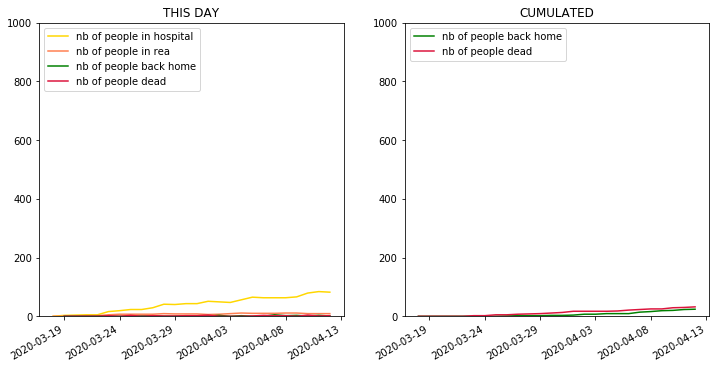

start with dep 37 --------------------------------------------------------------------------------------- 
Departement 37 Indre-et-Loire


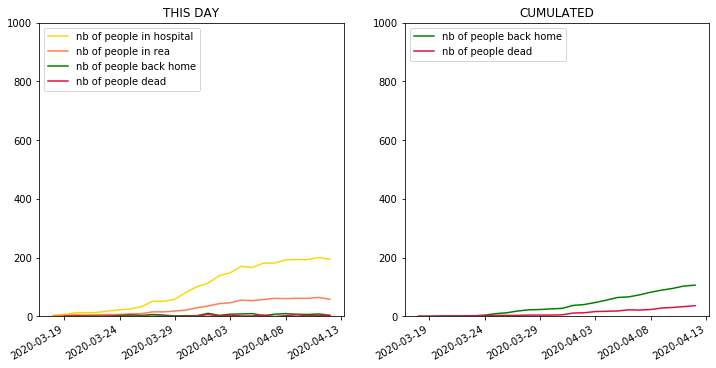

start with dep 38 --------------------------------------------------------------------------------------- 
Departement 38 Isère


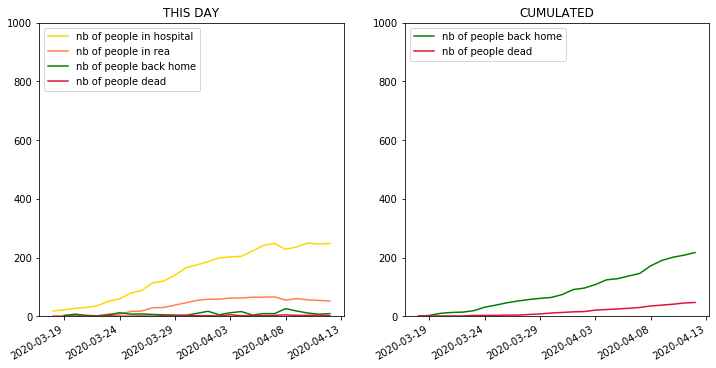

start with dep 39 --------------------------------------------------------------------------------------- 
Departement 39 Jura


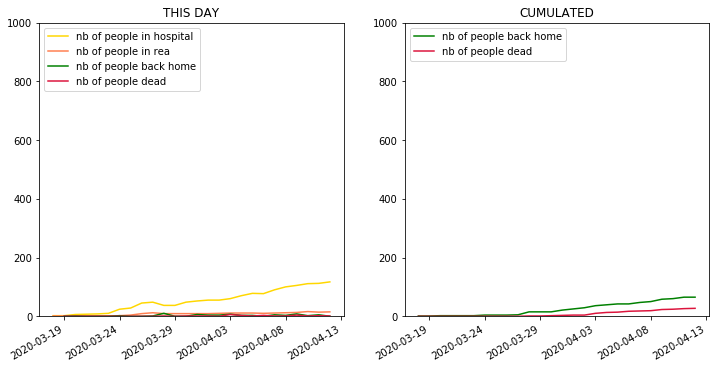

start with dep 40 --------------------------------------------------------------------------------------- 
Departement 40 Landes


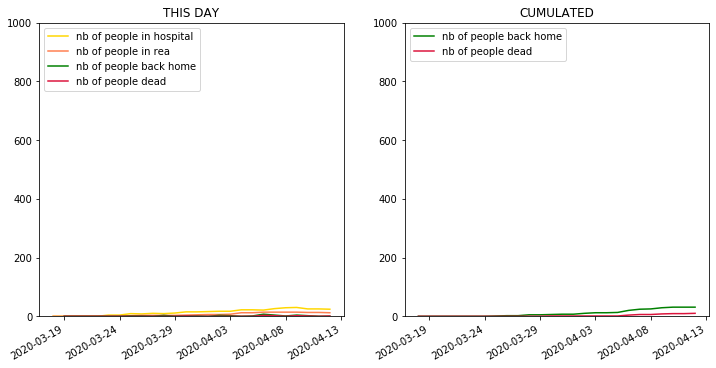

start with dep 41 --------------------------------------------------------------------------------------- 
Departement 41 Loir-et-Cher


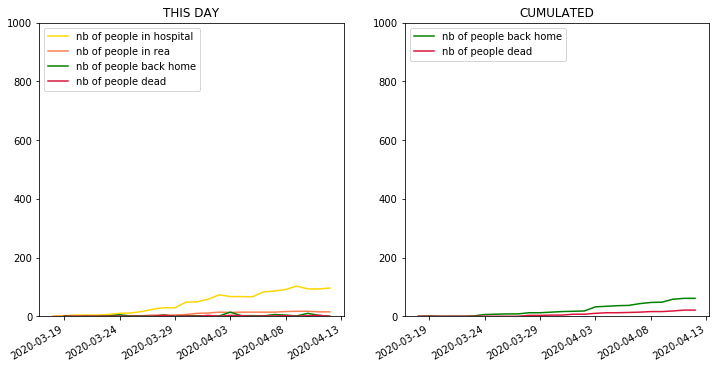

start with dep 42 --------------------------------------------------------------------------------------- 
Departement 42 Loire


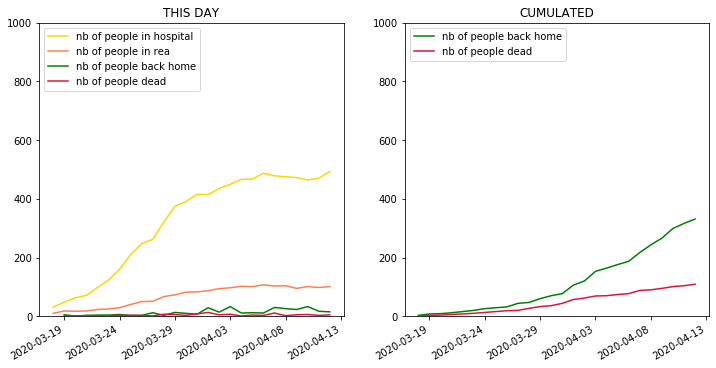

start with dep 43 --------------------------------------------------------------------------------------- 
Departement 43 Haute-Loire


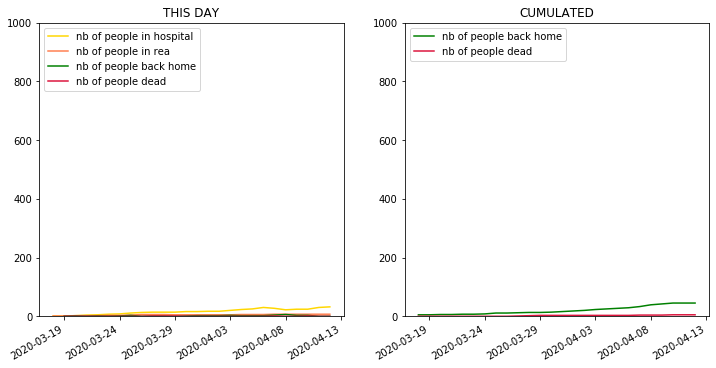

start with dep 44 --------------------------------------------------------------------------------------- 
Departement 44 Loire-Atlantique


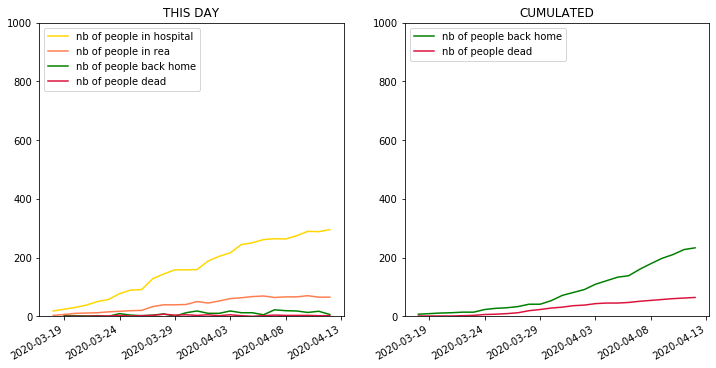

start with dep 45 --------------------------------------------------------------------------------------- 
Departement 45 Loiret


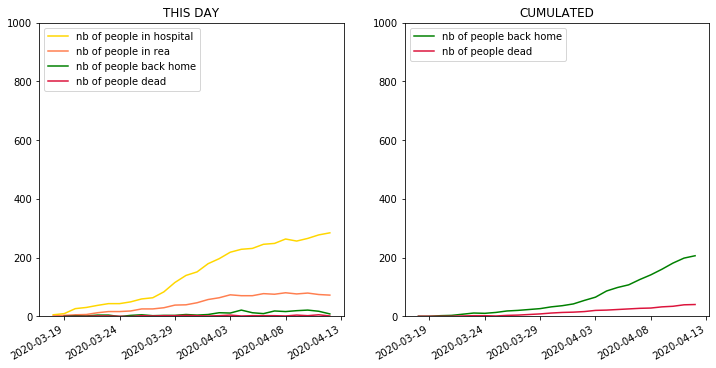

start with dep 46 --------------------------------------------------------------------------------------- 
Departement 46 Lot


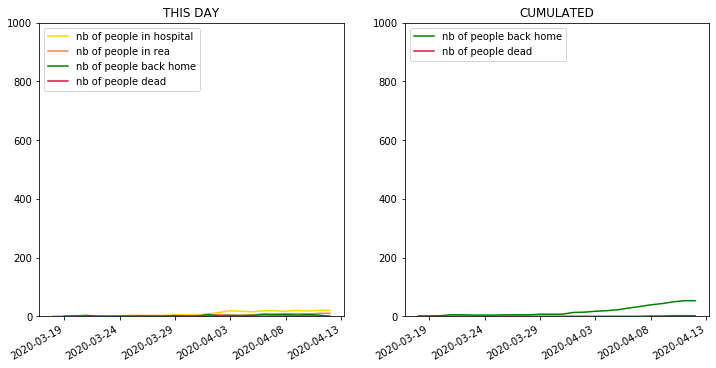

start with dep 47 --------------------------------------------------------------------------------------- 
Departement 47 Lot-et-Garonne


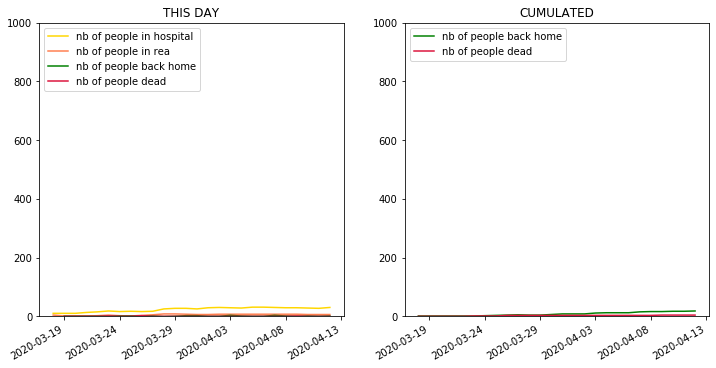

start with dep 48 --------------------------------------------------------------------------------------- 
Departement 48 Lozère


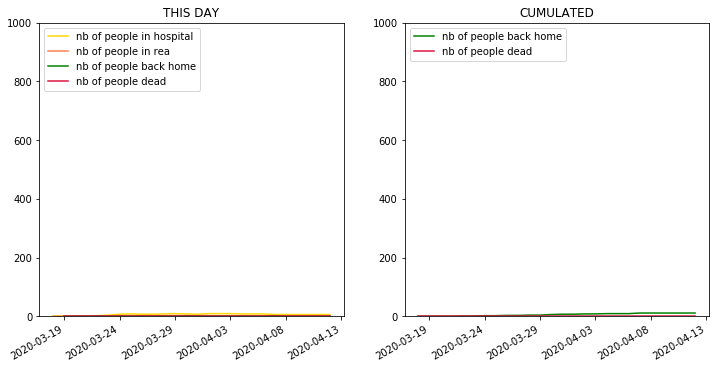

start with dep 49 --------------------------------------------------------------------------------------- 
Departement 49 Maine-et-Loire


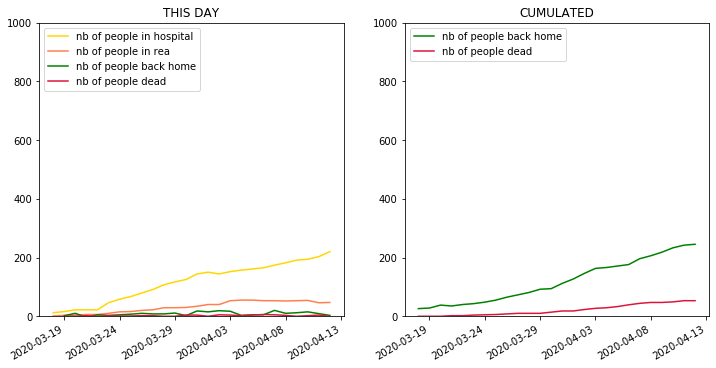

start with dep 50 --------------------------------------------------------------------------------------- 
Departement 50 Manche


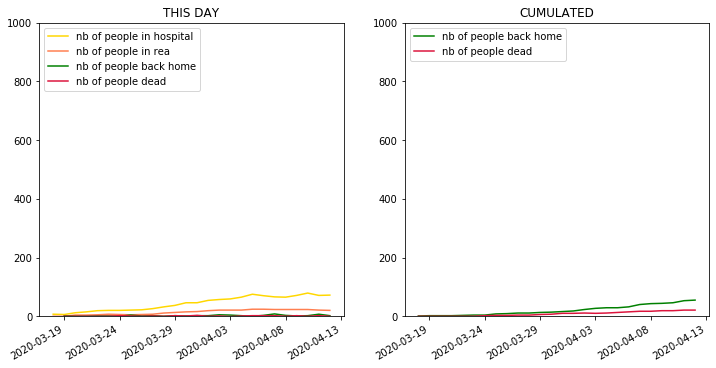

start with dep 51 --------------------------------------------------------------------------------------- 
Departement 51 Marne


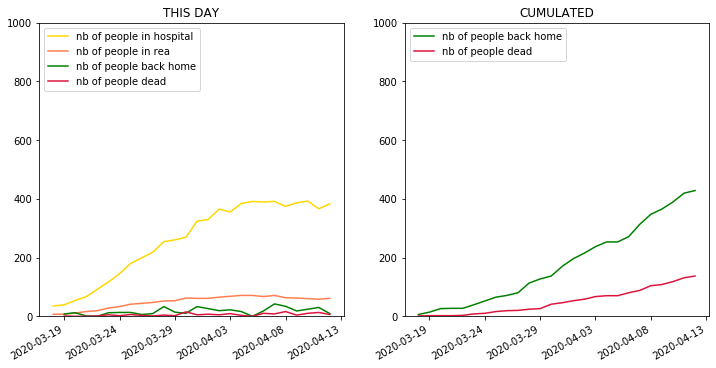

start with dep 52 --------------------------------------------------------------------------------------- 
Departement 52 Haute-Marne


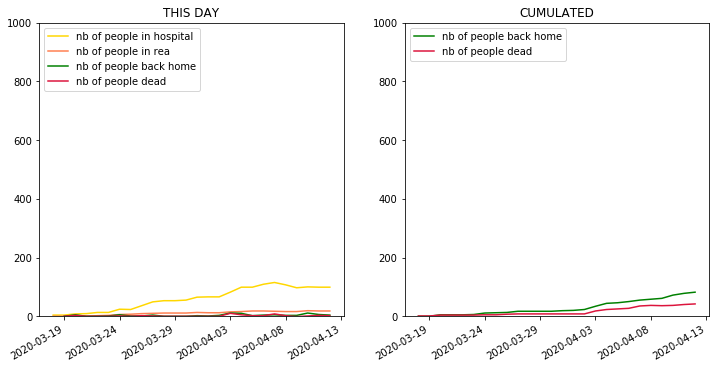

start with dep 53 --------------------------------------------------------------------------------------- 
Departement 53 Mayenne


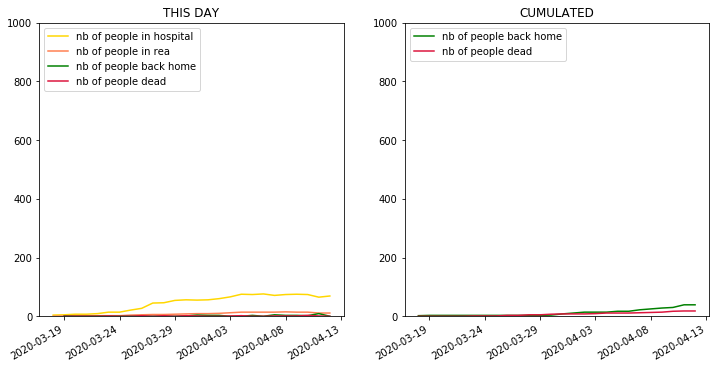

start with dep 54 --------------------------------------------------------------------------------------- 
Departement 54 Meurthe-et-Moselle


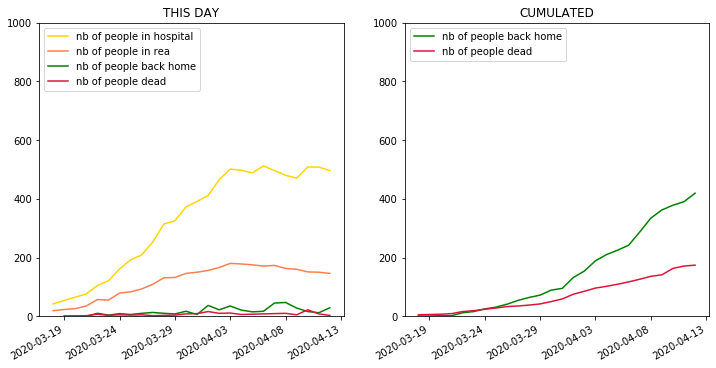

start with dep 55 --------------------------------------------------------------------------------------- 
Departement 55 Meuse


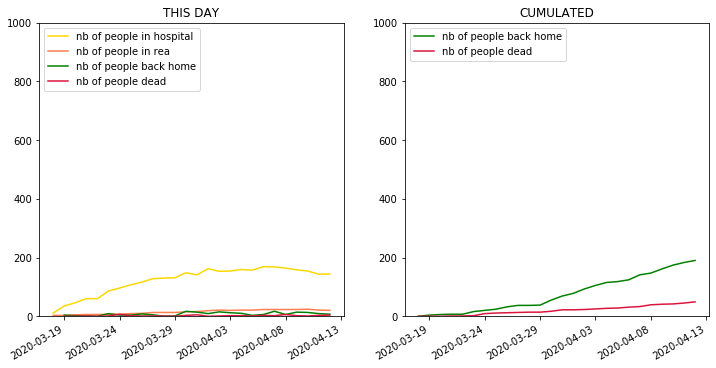

start with dep 56 --------------------------------------------------------------------------------------- 
Departement 56 Morbihan


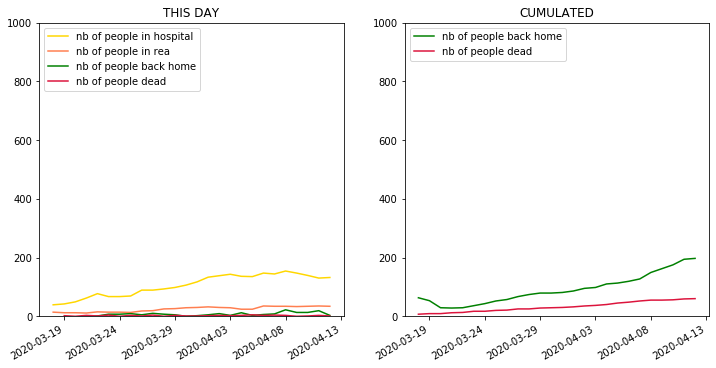

start with dep 57 --------------------------------------------------------------------------------------- 
Departement 57 Moselle


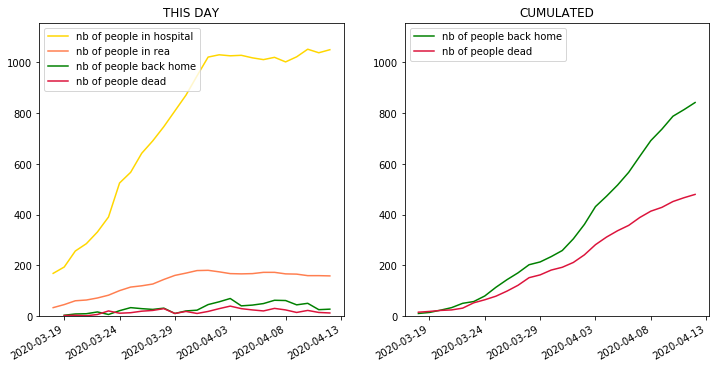

start with dep 58 --------------------------------------------------------------------------------------- 
Departement 58 Nièvre


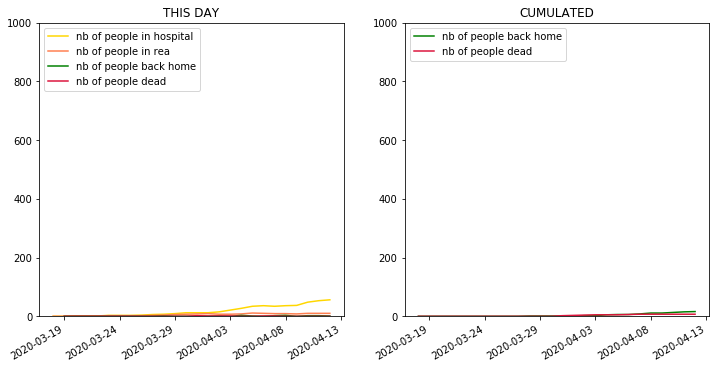

start with dep 59 --------------------------------------------------------------------------------------- 
Departement 59 Nord


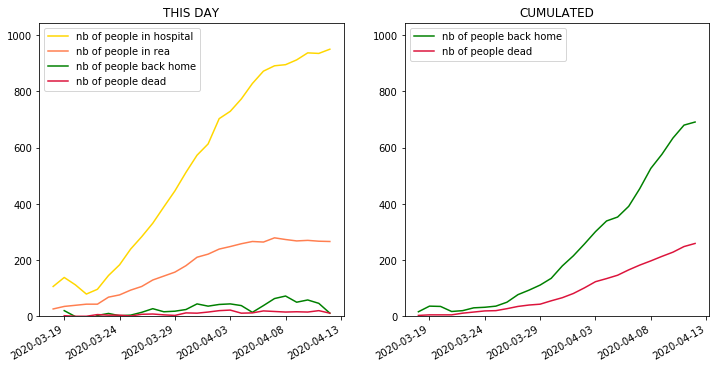

start with dep 60 --------------------------------------------------------------------------------------- 
Departement 60 Oise


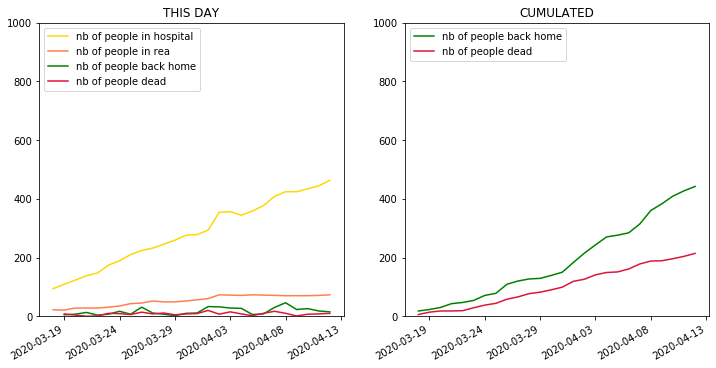

start with dep 61 --------------------------------------------------------------------------------------- 
Departement 61 Orne


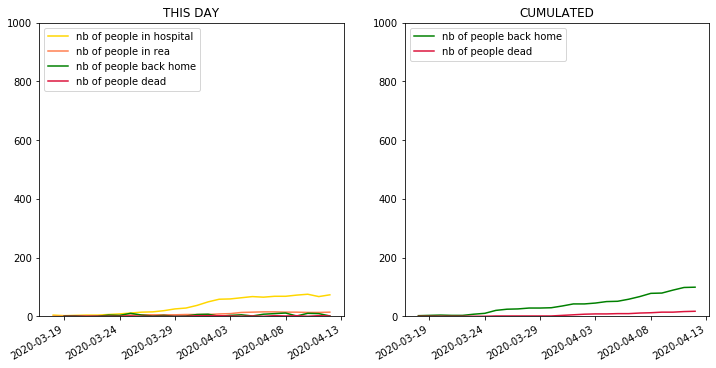

start with dep 62 --------------------------------------------------------------------------------------- 
Departement 62 Pas-de-Calais


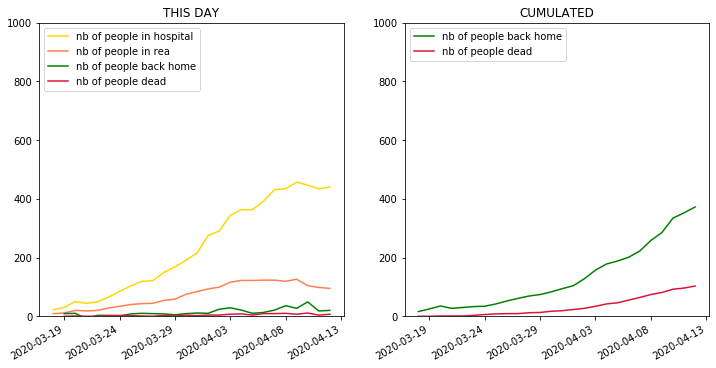

start with dep 63 --------------------------------------------------------------------------------------- 
Departement 63 Puy-de-Dôme


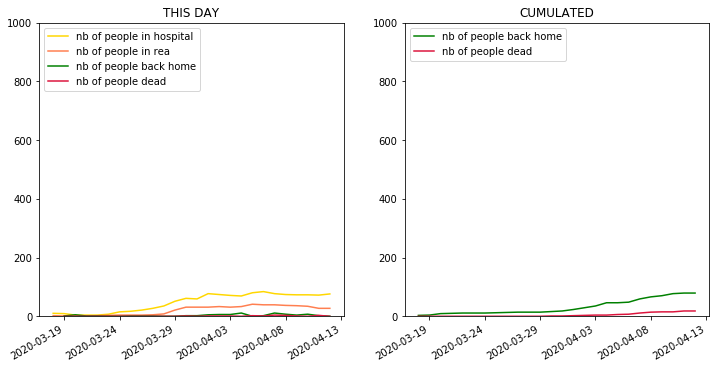

start with dep 64 --------------------------------------------------------------------------------------- 
Departement 64 Pyrénées-Atlantiques


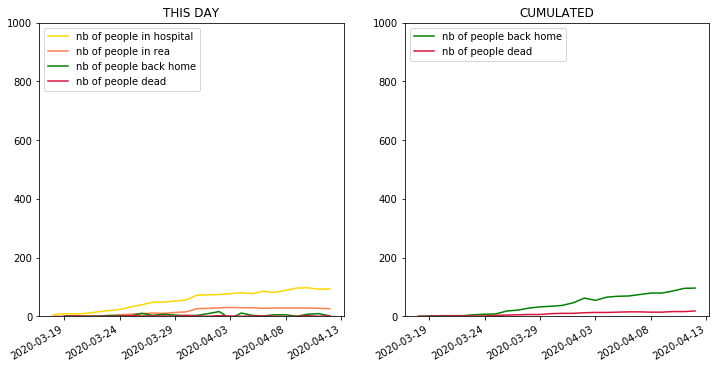

start with dep 65 --------------------------------------------------------------------------------------- 
Departement 65 Hautes-Pyrénées


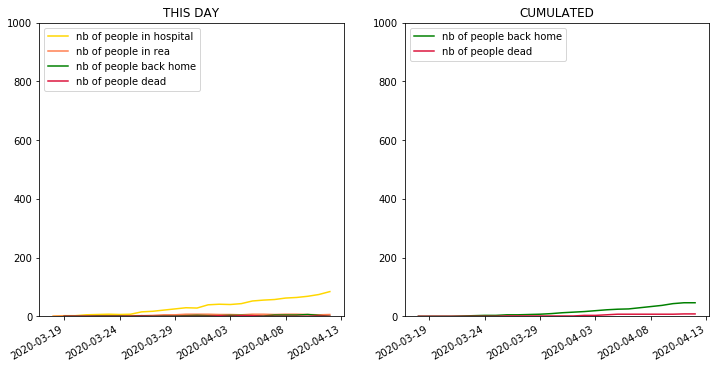

start with dep 66 --------------------------------------------------------------------------------------- 
Departement 66 Pyrénées-Orientales


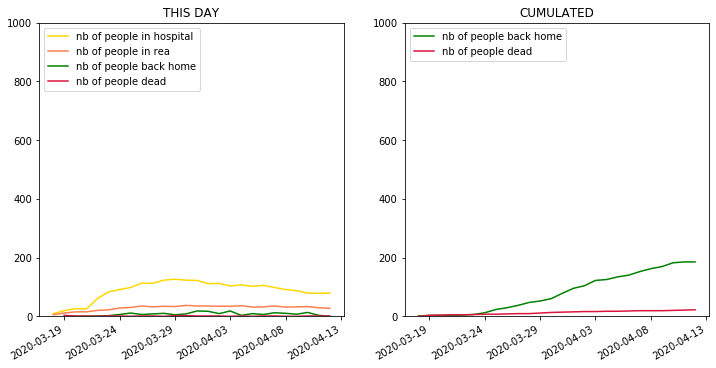

start with dep 67 --------------------------------------------------------------------------------------- 
Departement 67 Bas-Rhin


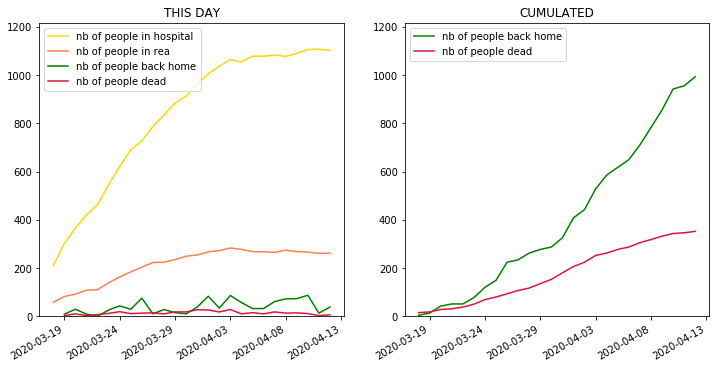

start with dep 68 --------------------------------------------------------------------------------------- 
Departement 68 Haut-Rhin


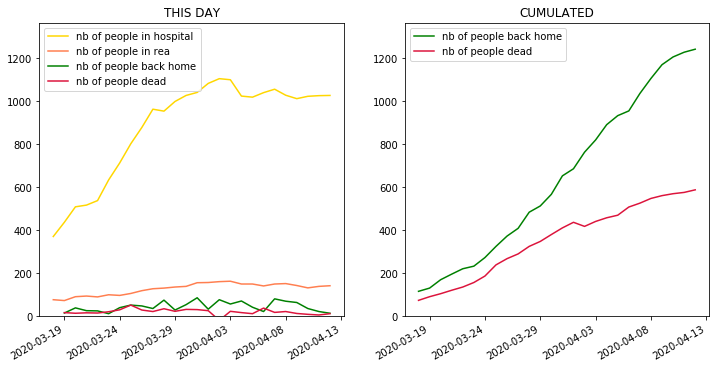

start with dep 69 --------------------------------------------------------------------------------------- 
Departement 69 Rhône


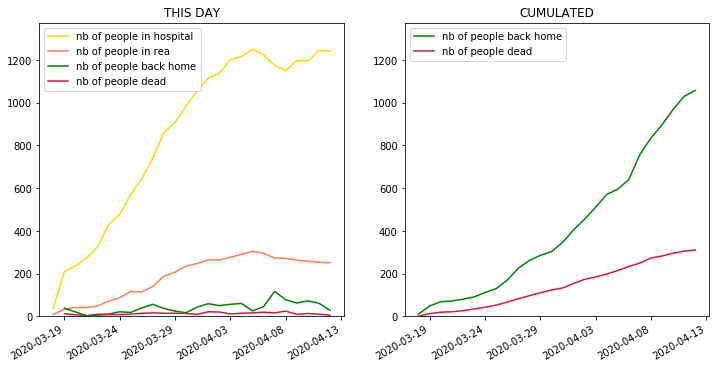

start with dep 70 --------------------------------------------------------------------------------------- 
Departement 70 Haute-Saône


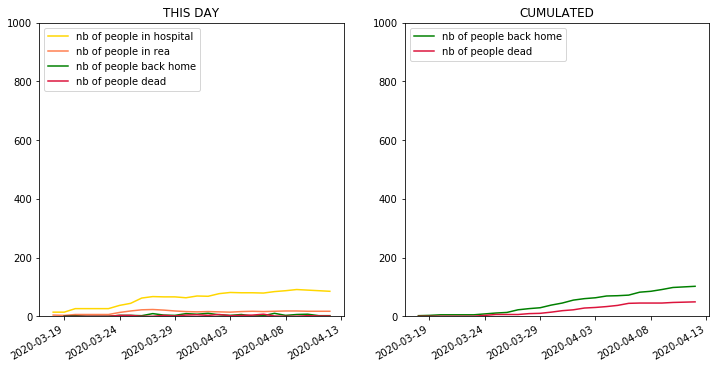

start with dep 71 --------------------------------------------------------------------------------------- 
Departement 71 Saône-et-Loire


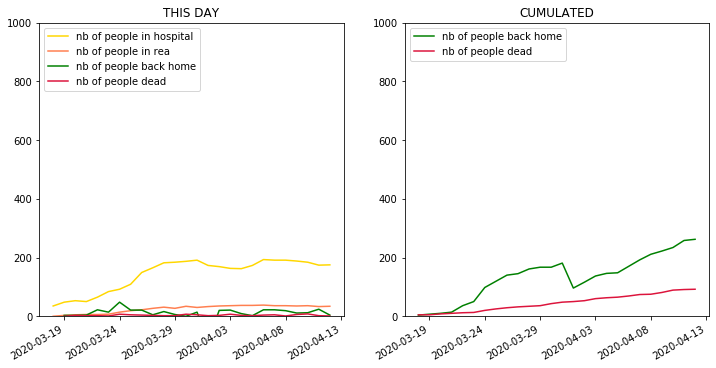

start with dep 72 --------------------------------------------------------------------------------------- 
Departement 72 Sarthe


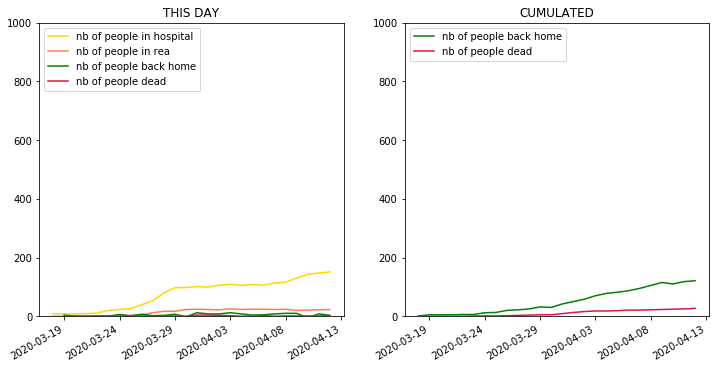

start with dep 73 --------------------------------------------------------------------------------------- 
Departement 73 Savoie


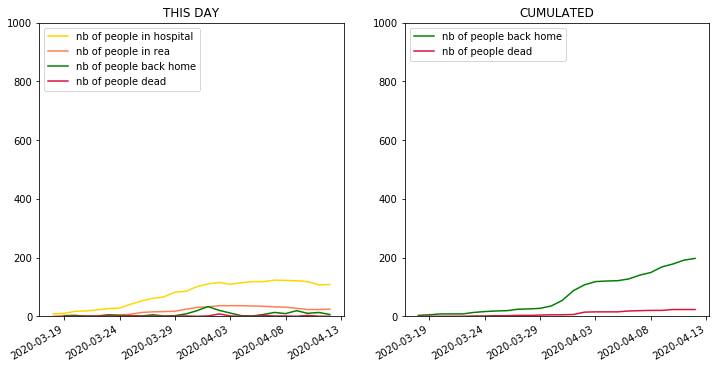

start with dep 74 --------------------------------------------------------------------------------------- 
Departement 74 Haute-Savoie


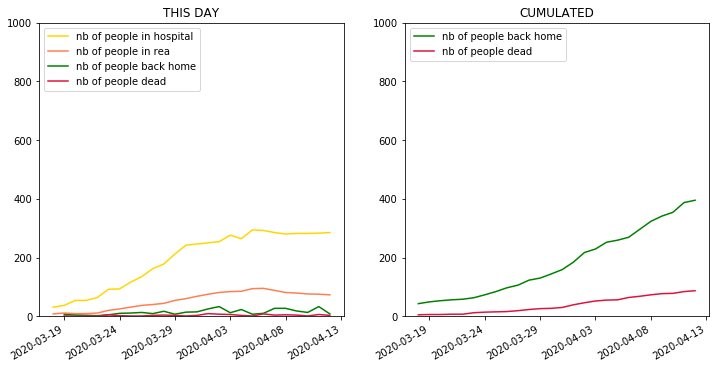

start with dep 75 --------------------------------------------------------------------------------------- 
Departement 75 Paris


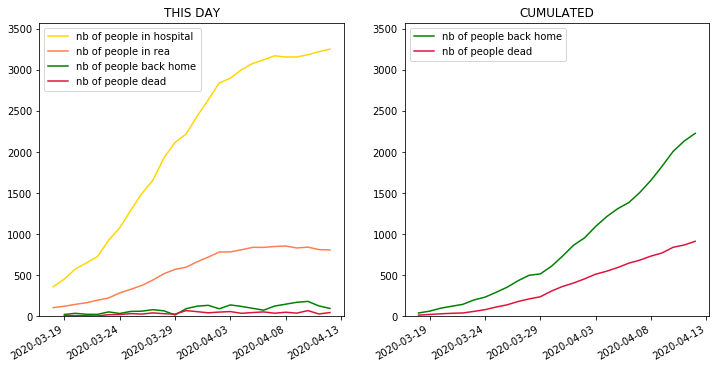

start with dep 76 --------------------------------------------------------------------------------------- 
Departement 76 Seine-Maritime


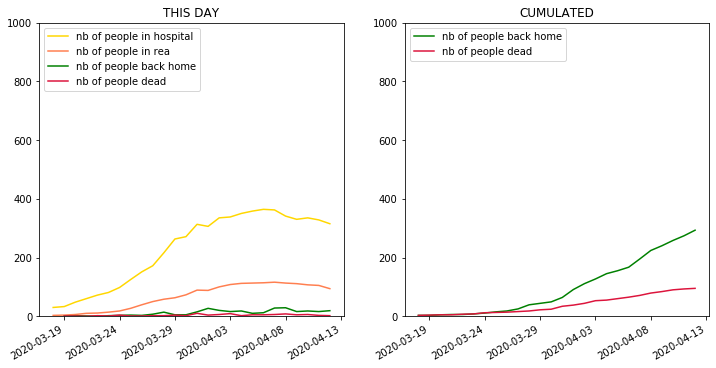

start with dep 77 --------------------------------------------------------------------------------------- 
Departement 77 Seine-et-Marne


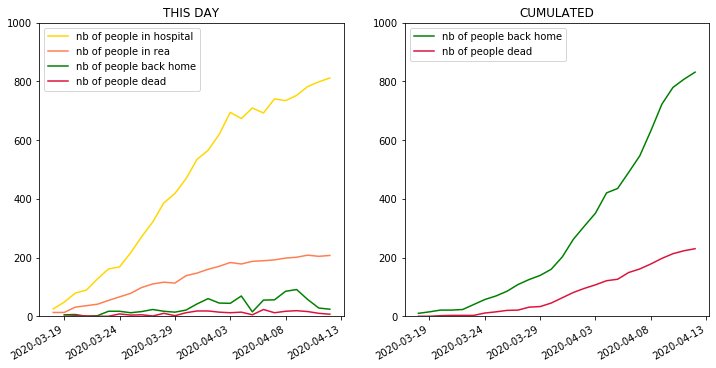

start with dep 78 --------------------------------------------------------------------------------------- 
Departement 78 Yvelines


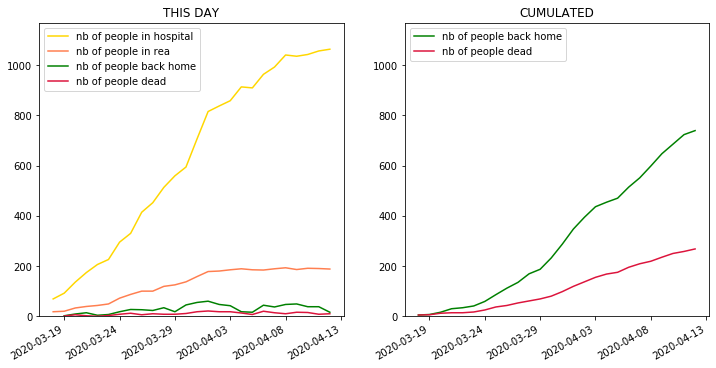

start with dep 79 --------------------------------------------------------------------------------------- 
Departement 79 Deux-Sèvres


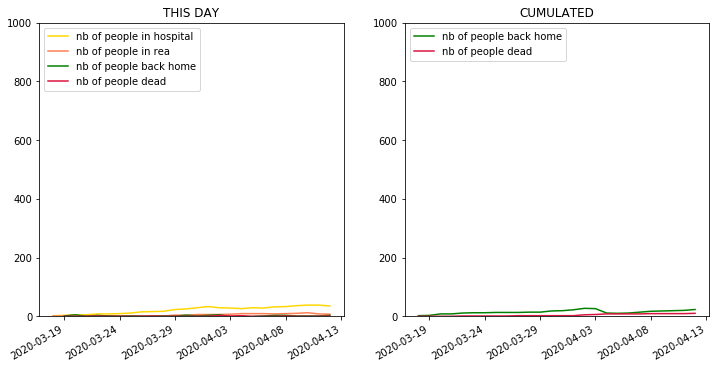

start with dep 80 --------------------------------------------------------------------------------------- 
Departement 80 Somme


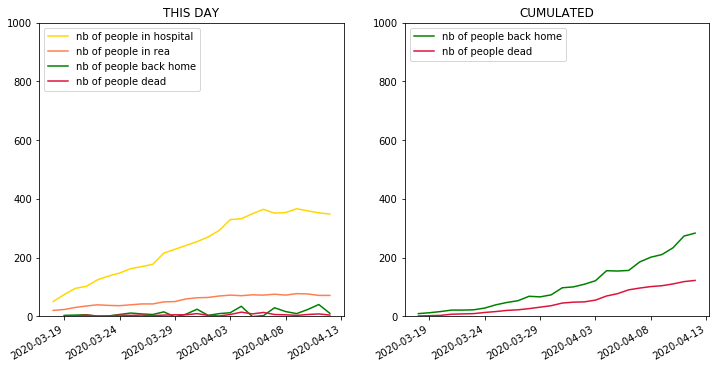

start with dep 81 --------------------------------------------------------------------------------------- 
Departement 81 Tarn


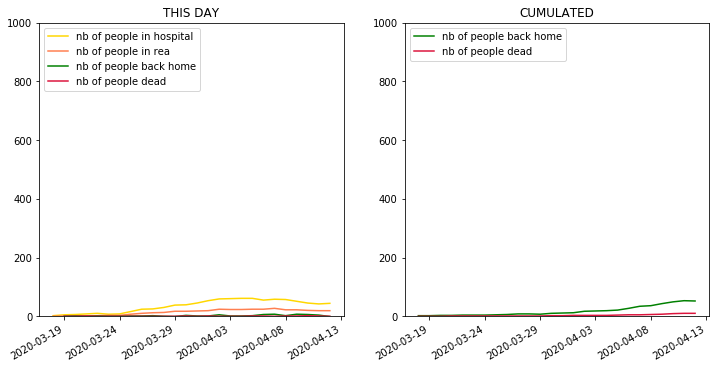

start with dep 82 --------------------------------------------------------------------------------------- 
Departement 82 Tarn-et-Garonne


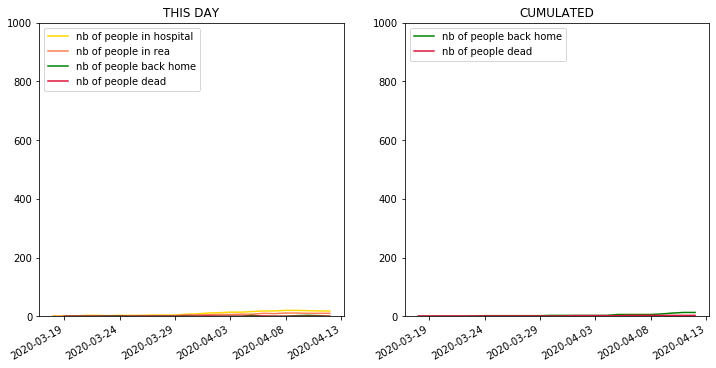

start with dep 83 --------------------------------------------------------------------------------------- 
Departement 83 Var


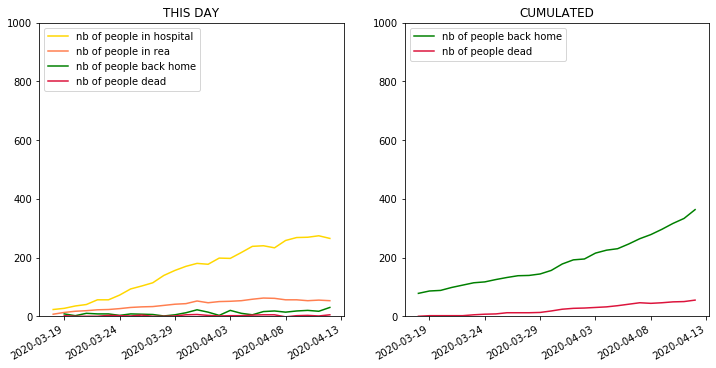

start with dep 84 --------------------------------------------------------------------------------------- 
Departement 84 Vaucluse


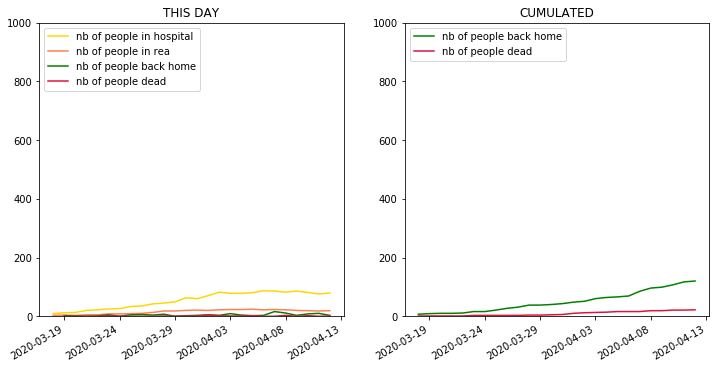

start with dep 85 --------------------------------------------------------------------------------------- 
Departement 85 Vendée


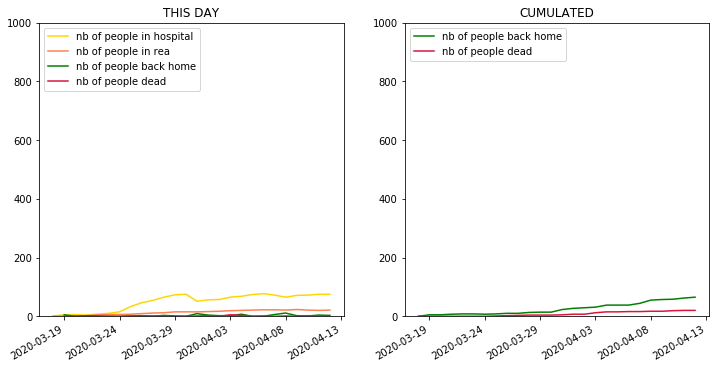

start with dep 86 --------------------------------------------------------------------------------------- 
Departement 86 Vienne


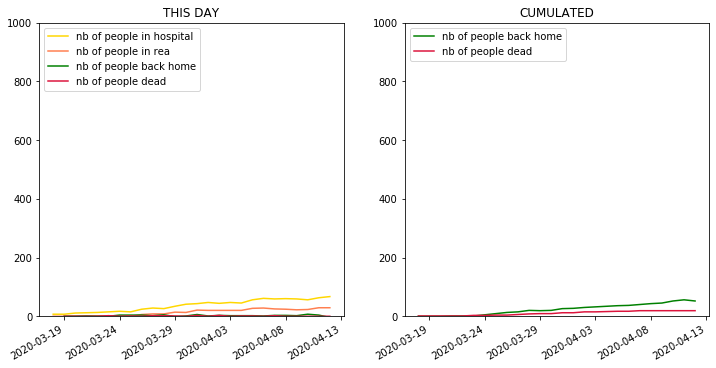

start with dep 87 --------------------------------------------------------------------------------------- 
Departement 87 Haute-Vienne


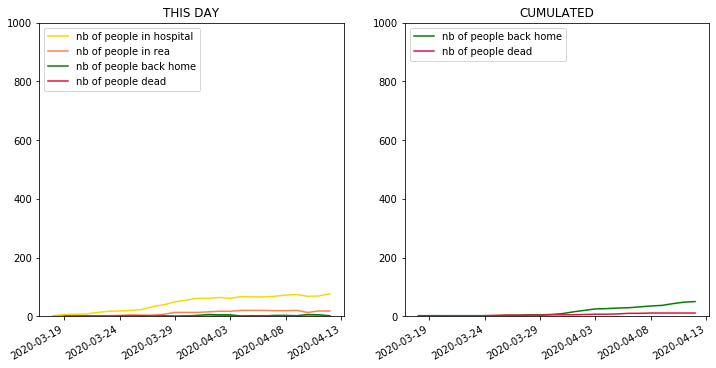

start with dep 88 --------------------------------------------------------------------------------------- 
Departement 88 Vosges


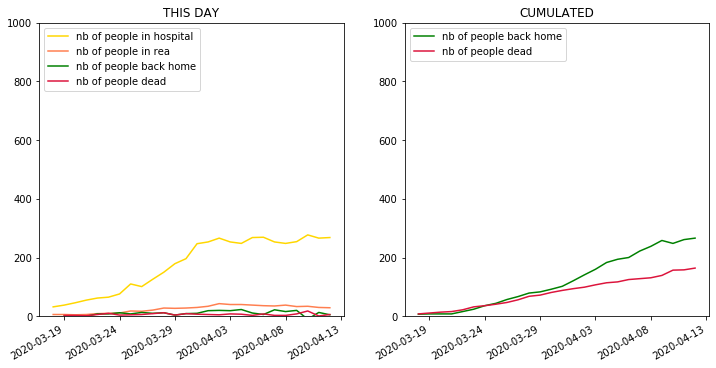

start with dep 89 --------------------------------------------------------------------------------------- 
Departement 89 Yonne


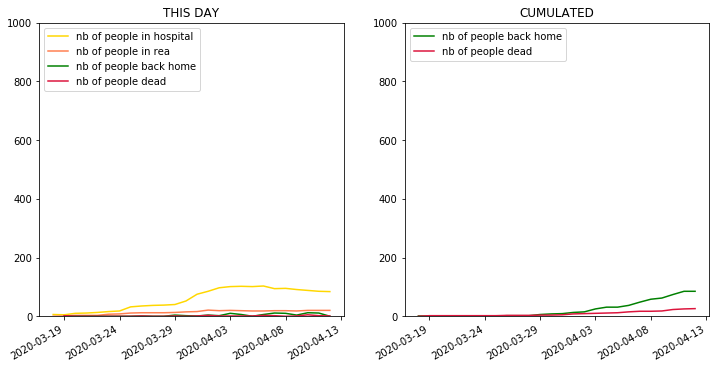

start with dep 90 --------------------------------------------------------------------------------------- 
Departement 90 Territoire de Belfort


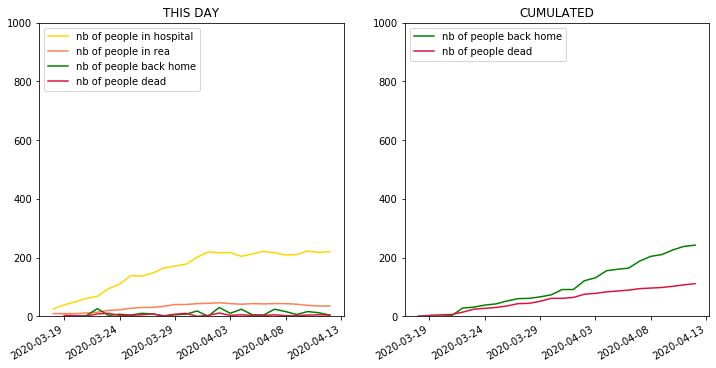

start with dep 91 --------------------------------------------------------------------------------------- 
Departement 91 Essonne


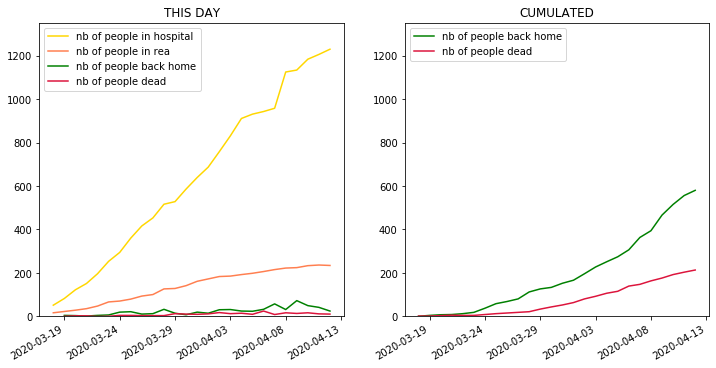

start with dep 92 --------------------------------------------------------------------------------------- 
Departement 92 Hauts-de-Seine


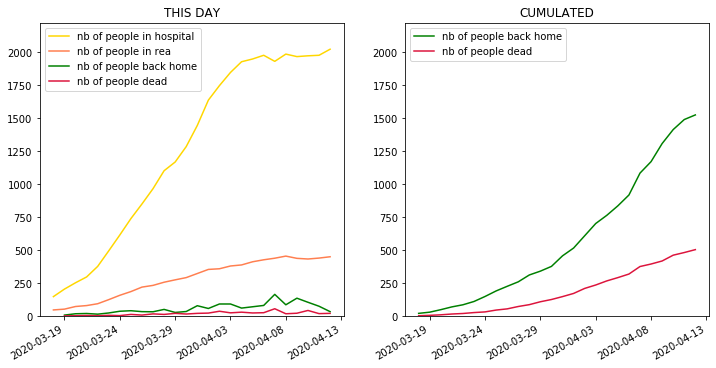

start with dep 93 --------------------------------------------------------------------------------------- 
Departement 93 Seine-Saint-Denis


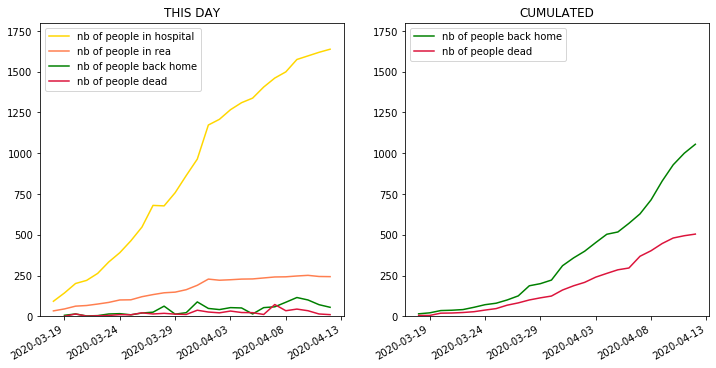

start with dep 94 --------------------------------------------------------------------------------------- 
Departement 94 Val-de-Marne


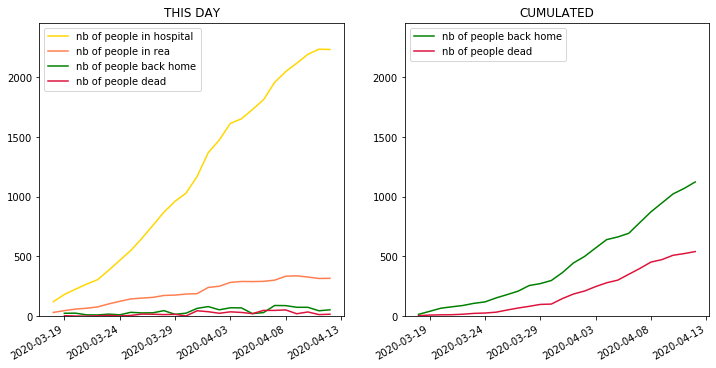

start with dep 95 --------------------------------------------------------------------------------------- 
Departement 95 Val-d'Oise


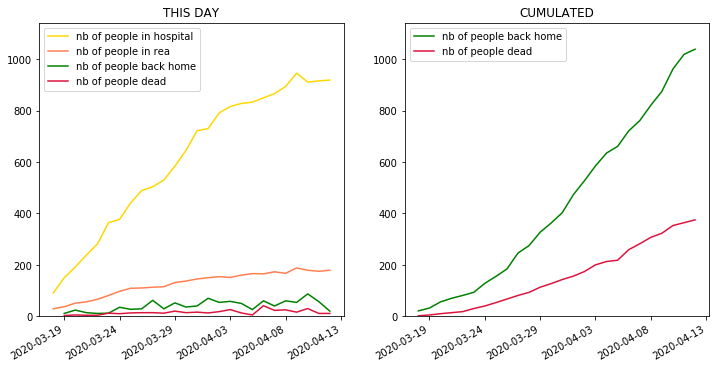

start with dep 971 --------------------------------------------------------------------------------------- 
start with dep 972 --------------------------------------------------------------------------------------- 
start with dep 973 --------------------------------------------------------------------------------------- 
start with dep 974 --------------------------------------------------------------------------------------- 
start with dep 976 --------------------------------------------------------------------------------------- 


In [13]:
timeStep=4
        
for nbDone,dep in enumerate(np.unique(dfGB['dep'].tolist())):
    
    print('start with dep',dep,'--------------------------------------------------------------------------------------- ')
    
    depNom=dfMvt[dfMvt['Code_departement']==dep]['Departement'].tolist()
    
    if len(depNom)>0:
        depNom=depNom[0]
        print('Departement',dep,depNom)
        
        #print(dep)
        depData=dfGB[dfGB['dep']==dep]
        #print(depData)

        # compute people getting out of the hospital every day and people dying
        depData['sortie']=depData['rad']-depData['rad'].shift(1)
        depData['dead']=depData['dc']-depData['dc'].shift(1)
        
        # the following addition seems to be wrong ... considering information from the "nouveaux" dataset is safer
        # consequently 'statistics' and acceleration is not computed on these values
        #depData['admission']=depData['hosp']-depData['hosp'].shift(1)+depData['sortie'].shift(1)+depData['dc'].shift(1)        
        #depData['slidingAdmission']=depData['admission'].rolling(3,win_type='triang',center=True).mean()
            
        #print(depData[0:10])

        # to have same yaxis on every chart, take max for of all variables
        yaxis_max=np.max(depData[['hosp','rea','rad','dc']].max(axis=0))*1.1
        yaxis_max=max(1000,yaxis_max)
        
        plt.figure(figsize=(12,6))
        plt.subplot(121)
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
        plt.plot(depData['date'].tolist(),depData['hosp'],color='gold',label='nb of people in hospital')
        plt.plot(depData['date'].tolist(),depData['rea'],color='coral',label='nb of people in rea')
        plt.plot(depData['date'].tolist(),depData['sortie'],color='green',label='nb of people back home')
        plt.plot(depData['date'].tolist(),depData['dead'],color='crimson',label='nb of people dead')
        plt.gcf().autofmt_xdate()
        plt.ylim((0,yaxis_max))
        plt.title('THIS DAY')
        plt.legend(loc='upper left')

        plt.subplot(122)
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
        plt.plot(depData['date'].tolist(),depData['rad'],color='green',label='nb of people back home')
        plt.plot(depData['date'].tolist(),depData['dc'],color='crimson',label='nb of people dead')
        plt.gcf().autofmt_xdate()
        plt.ylim((0,yaxis_max))
        plt.title('CUMULATED')
        plt.legend(loc='upper left')
        plt.show()
        
        '''
        plt.subplot(133)
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
        plt.plot(depData['date'].tolist(),depData['sortie'],color='green',label='nb of people back home')
        #plt.plot(depData['date'].tolist(),depData['admission'],color='gold',label='nb of people admitted')
        #plt.plot(depData['date'].tolist(),depData['slidingAdmission'],color='orange',label='nb of people admitted sliding')
        plt.plot(depData['date'].tolist(),depData['dead'],color='crimson',label='nb of people dead')
        plt.gcf().autofmt_xdate()
        plt.ylim((0,yaxis_max))
        plt.title('DAILY')
        plt.legend(loc='upper left')
        plt.show()
        '''
        
        '''
        # get the data of population movement for this department
        depNuit=dfMvt[dfMvt['Code_departement']==dep]
        #print(depNuit)

        habitant=int(depNuit['Scenario1_Nuitees_avant_confinement'].astype(int))
        habitantApres=habitant+int(depNuit['Scenario1_Nuiteestotales_ecart_lie_au_confinement'].astype(int))
        
        habitantIncrease=float((habitantApres/habitant)-1)*100

        #print('habitant:',habitant,habitantApres,habitantIncrease)
            
        dateList=depData[3::timeStep]['date'].tolist()
        
        #print('dateList:',dateList)
                
        firstData=depData[depData['date']==dateList[0]]
        
        print('firstData:',firstData)
        
        for date in dateList:
            thisData=depData[depData['date']==date]
            #print('thisData:',thisData)
            #print(thisData['slidingAdmission'].tolist()[0])
            if int(firstData['slidingAdmission'])>0 and not np.isnan(thisData['slidingAdmission'].tolist()[0]):
                points.append([date,dep,dateList[0],habitant,habitantIncrease,int(thisData['slidingAdmission'])/int(firstData['slidingAdmission'])])
            else:
                points.append([date,dep,dateList[0],habitant,habitantIncrease,np.nan])
       '''     

        #if nbDone>5:
        #    break
            
#points=pd.DataFrame(points,columns=['date','dep','firstDate','habitant','habitantIncrease','admissionIncrease'])

# -----------------------------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------------------------

# Create basic curves for new cases for each department

## also compute difference of spread of the disease:
## difference of case increase between begining of the data and different dates

start with dep 01 --------------------------------------------------------------------------------------- 
Departement 01 Ain


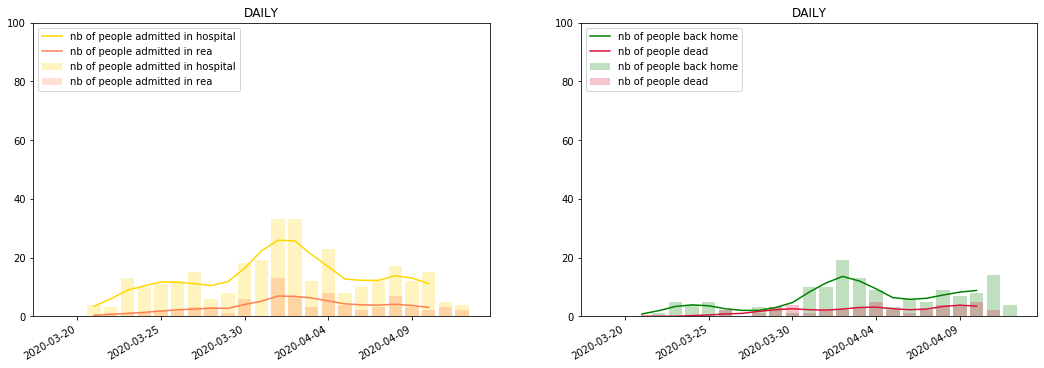

habitants: 724000 740000 2.209945
start with dep 02 --------------------------------------------------------------------------------------- 
Departement 02 Aisne


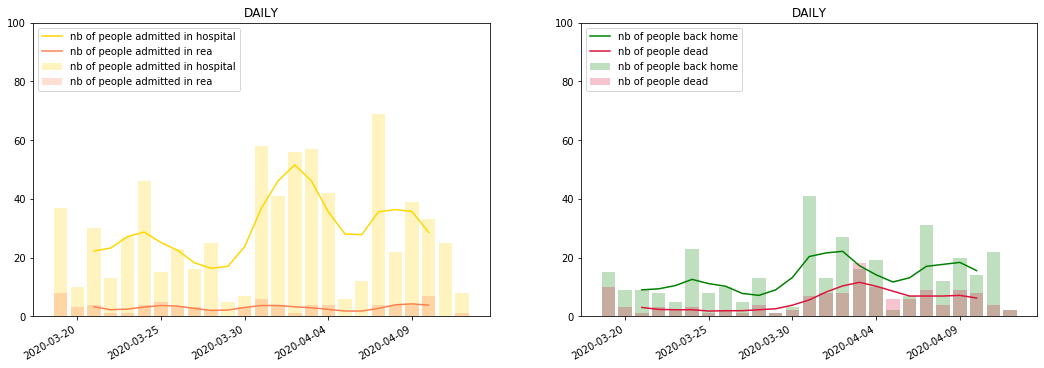

habitants: 534000 550000 2.996255
start with dep 03 --------------------------------------------------------------------------------------- 
Departement 03 Allier


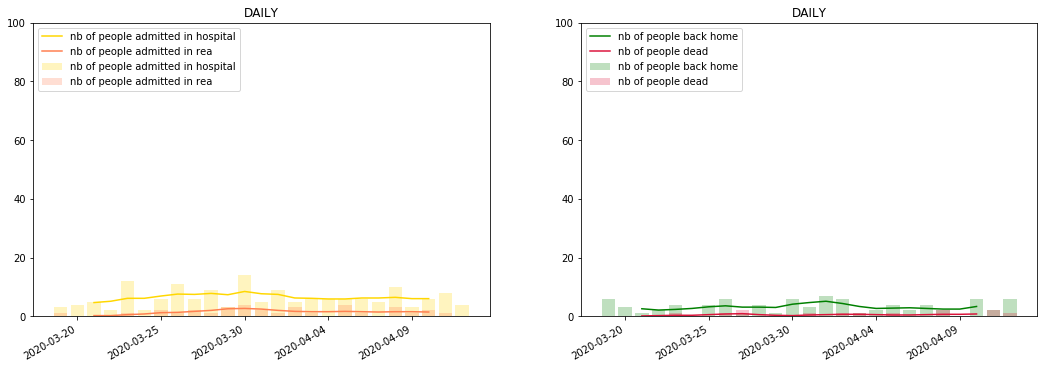

habitants: 344000 351000 2.034884
start with dep 04 --------------------------------------------------------------------------------------- 
Departement 04 Alpes-de-Haute-Provence


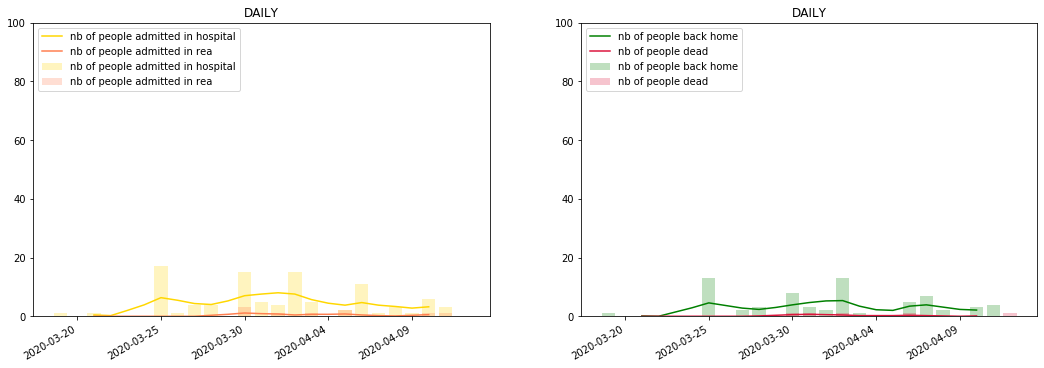

habitants: 185000 182000 -1.621622
start with dep 05 --------------------------------------------------------------------------------------- 
Departement 05 Hautes-Alpes


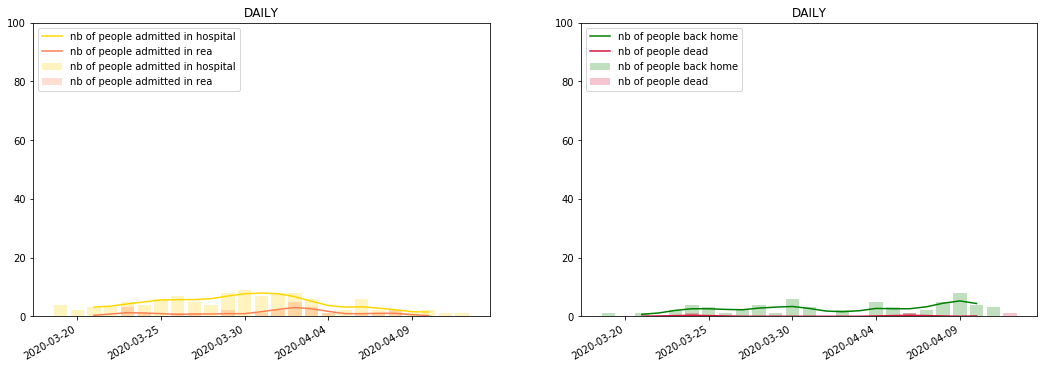

habitants: 216000 160000 -25.925926
start with dep 06 --------------------------------------------------------------------------------------- 
Departement 06 Alpes-Maritimes


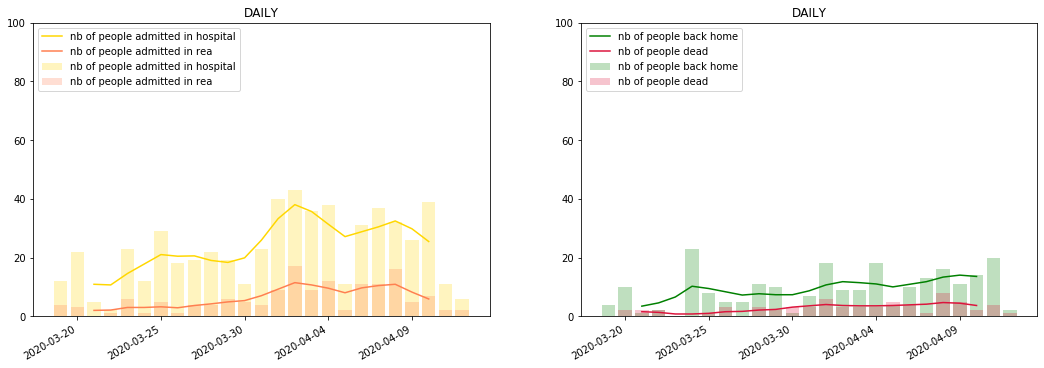

habitants: 1185000 1170000 -1.265823
start with dep 07 --------------------------------------------------------------------------------------- 
Departement 07 Ardèche


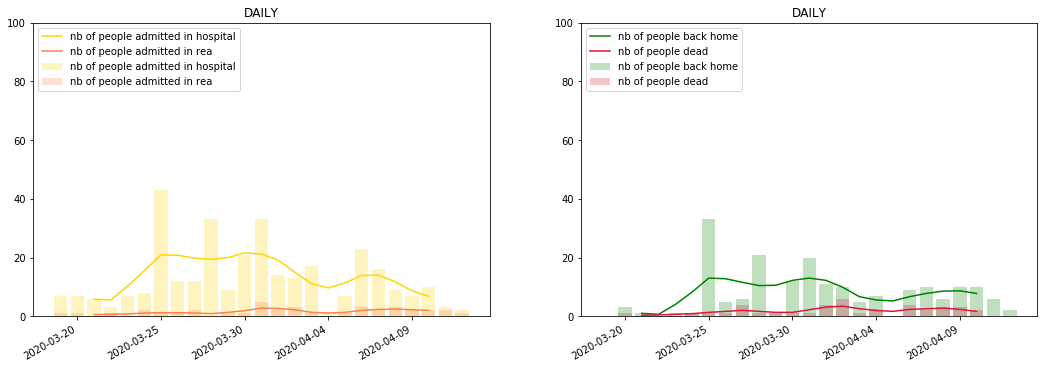

habitants: 312000 329000 5.448718
start with dep 08 --------------------------------------------------------------------------------------- 
Departement 08 Ardennes


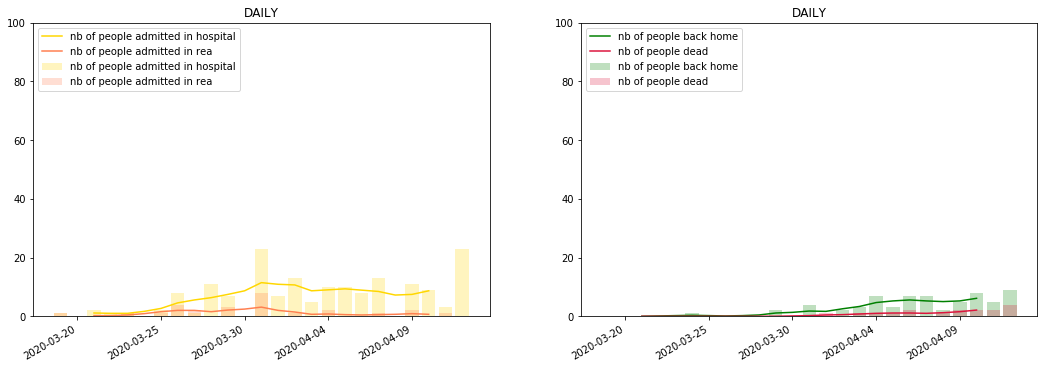

habitants: 263000 273000 3.802281
start with dep 09 --------------------------------------------------------------------------------------- 
Departement 09 Ariège


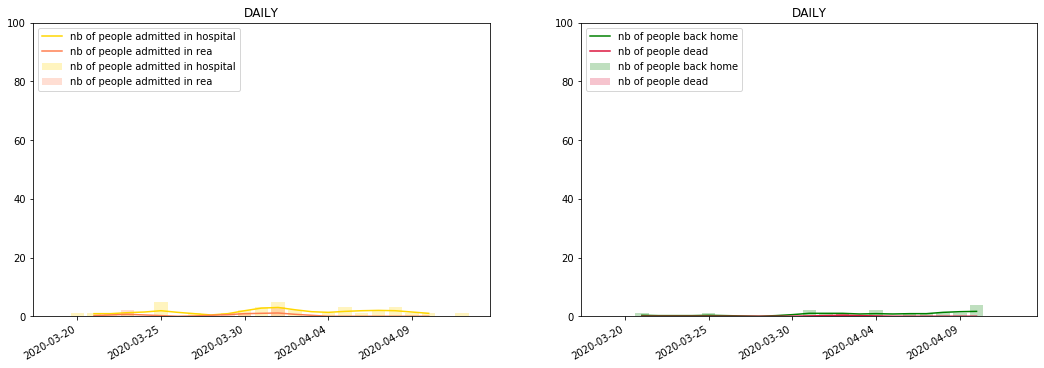

habitants: 163000 166000 1.840491
start with dep 10 --------------------------------------------------------------------------------------- 
Departement 10 Aube


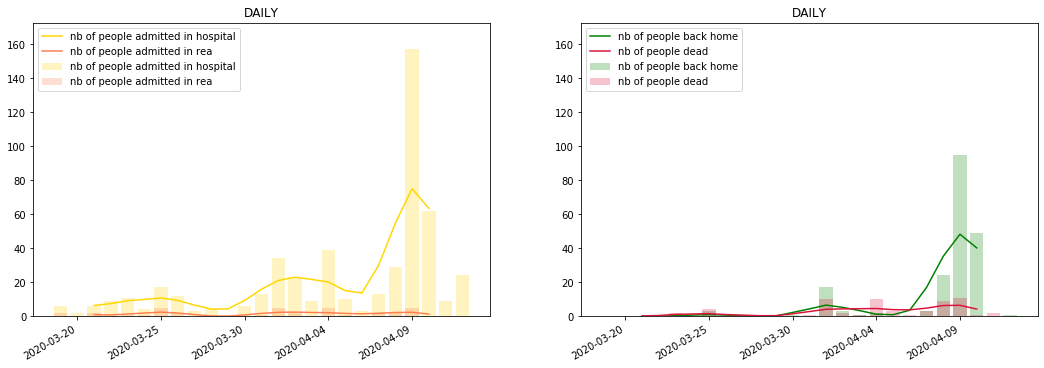

habitants: 315000 320000 1.587302
start with dep 11 --------------------------------------------------------------------------------------- 
Departement 11 Aude


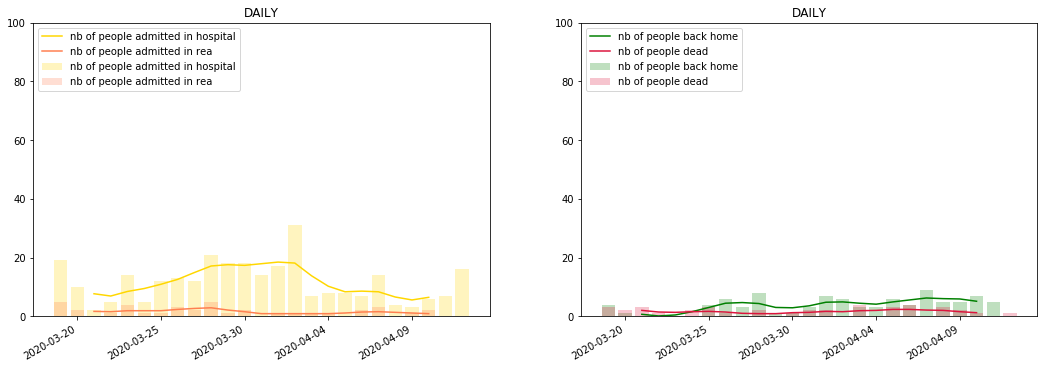

habitants: 393000 394000 0.254453
start with dep 12 --------------------------------------------------------------------------------------- 
Departement 12 Aveyron


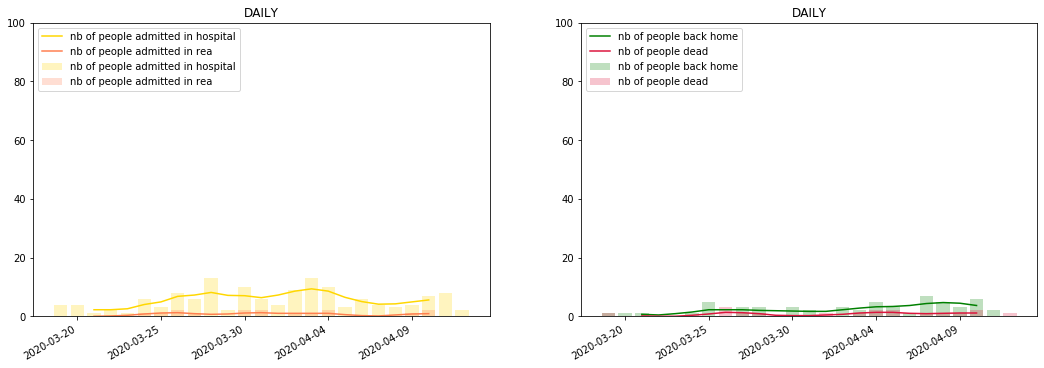

habitants: 291000 301000 3.436426
start with dep 13 --------------------------------------------------------------------------------------- 
Departement 13 Bouches-du-Rhône


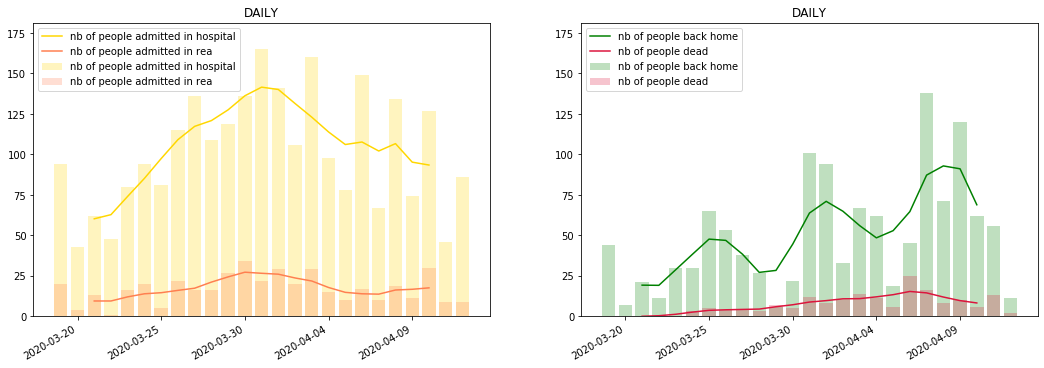

habitants: 2093000 2126000 1.576684
start with dep 14 --------------------------------------------------------------------------------------- 
Departement 14 Calvados


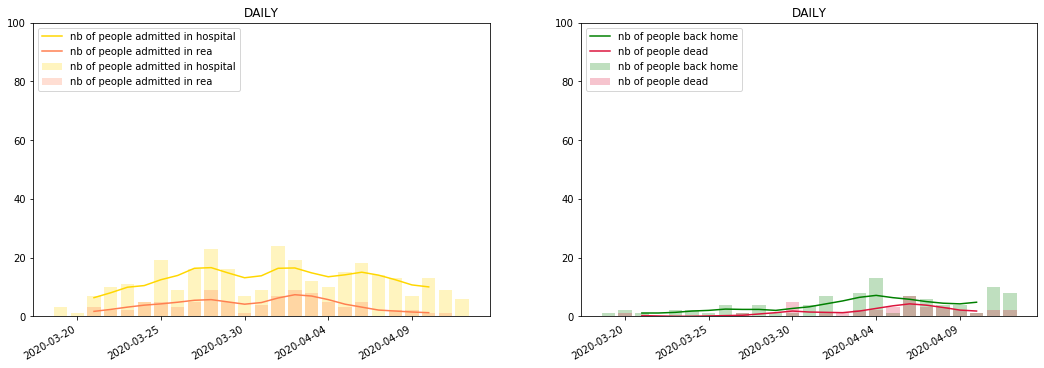

habitants: 744000 748000 0.537634
start with dep 15 --------------------------------------------------------------------------------------- 
Departement 15 Cantal


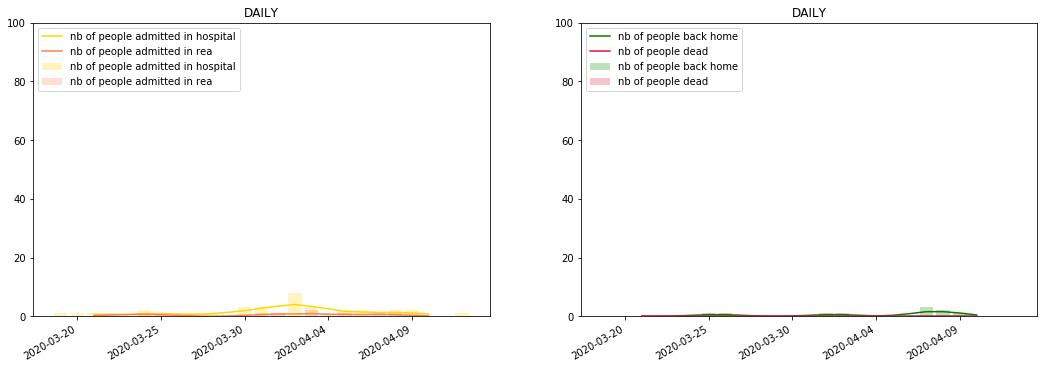

habitants: 156000 163000 4.487179
start with dep 16 --------------------------------------------------------------------------------------- 
Departement 16 Charente


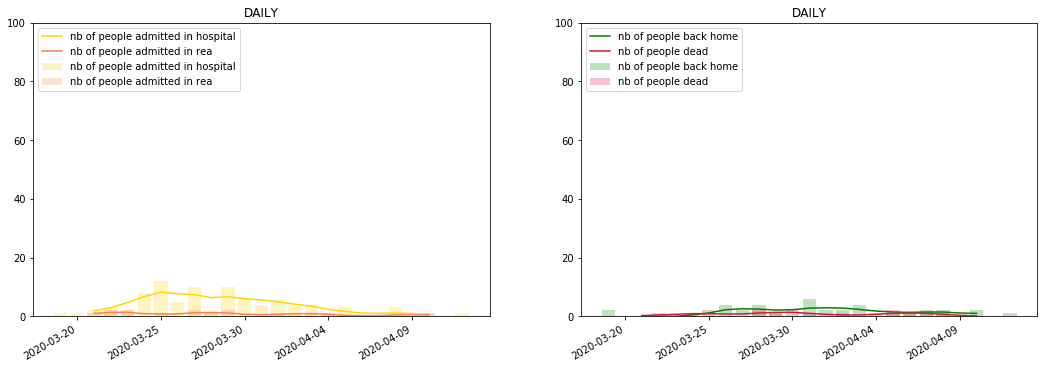

habitants: 358000 361000 0.837989
start with dep 17 --------------------------------------------------------------------------------------- 
Departement 17 Charente-Maritime


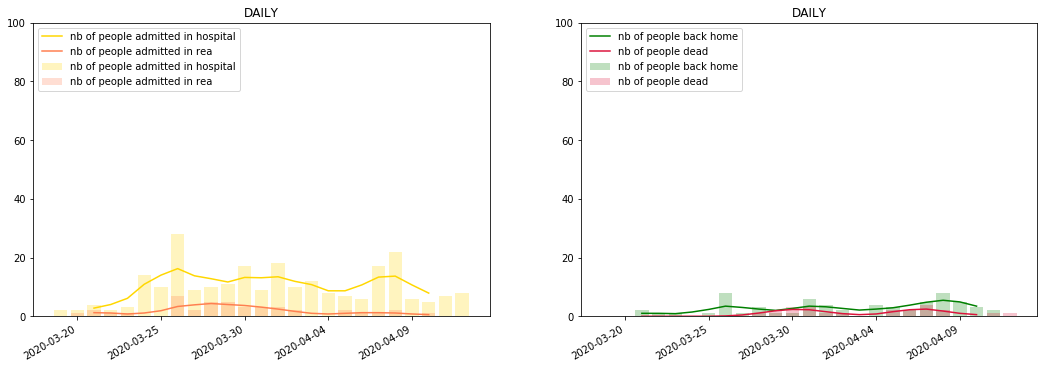

habitants: 676000 686000 1.479290
start with dep 18 --------------------------------------------------------------------------------------- 
Departement 18 Cher


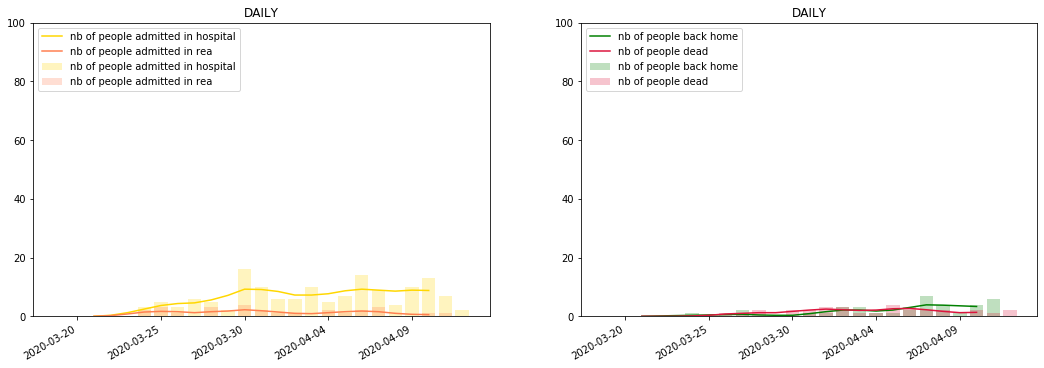

habitants: 315000 314000 -0.317460
start with dep 19 --------------------------------------------------------------------------------------- 
Departement 19 Corrèze


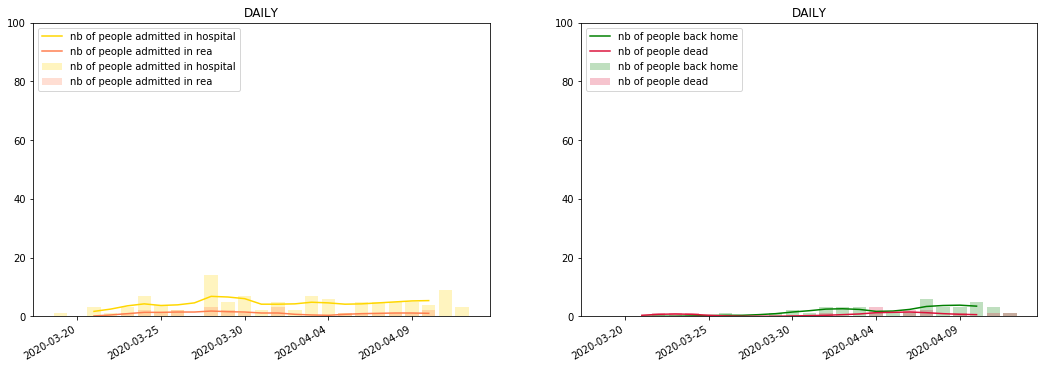

habitants: 242000 243000 0.413223
start with dep 21 --------------------------------------------------------------------------------------- 
Departement 21 Côte-d'Or


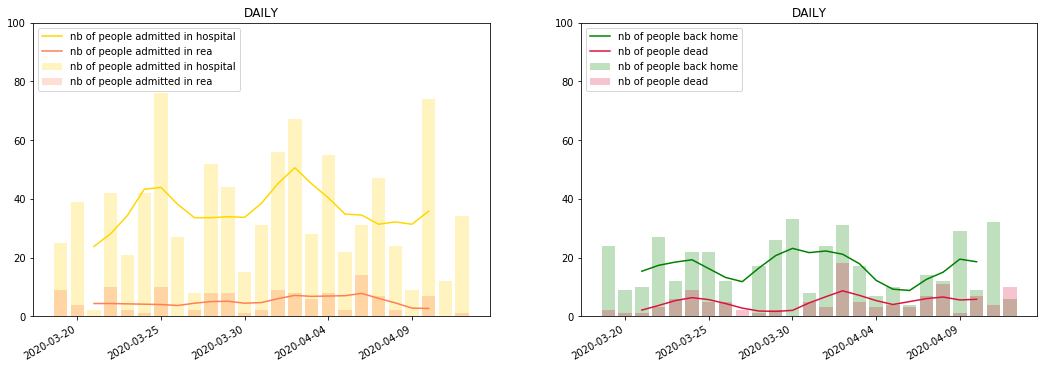

habitants: 554000 548000 -1.083032
start with dep 22 --------------------------------------------------------------------------------------- 
Departement 22 Côtes-d'Armor


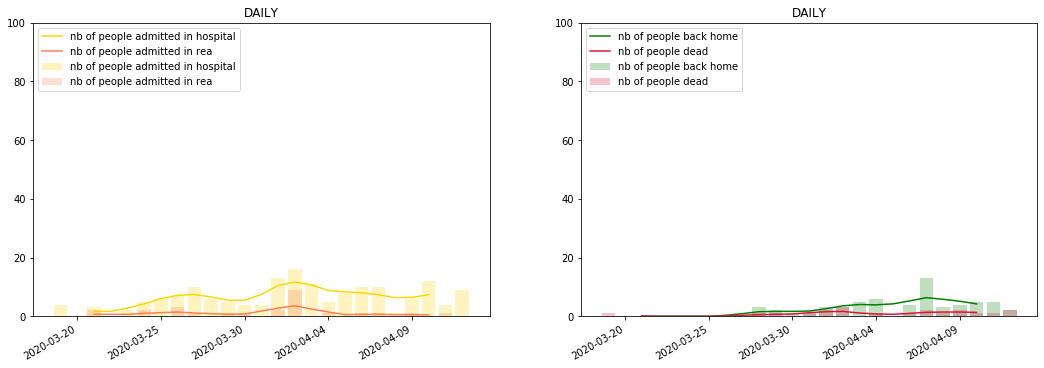

habitants: 626000 656000 4.792332
start with dep 23 --------------------------------------------------------------------------------------- 
Departement 23 Creuse


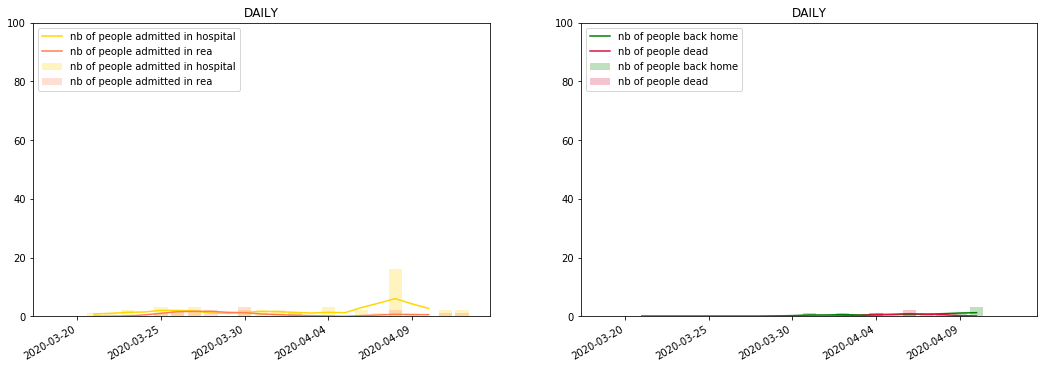

habitants: 121000 123000 1.652893
start with dep 24 --------------------------------------------------------------------------------------- 
Departement 24 Dordogne


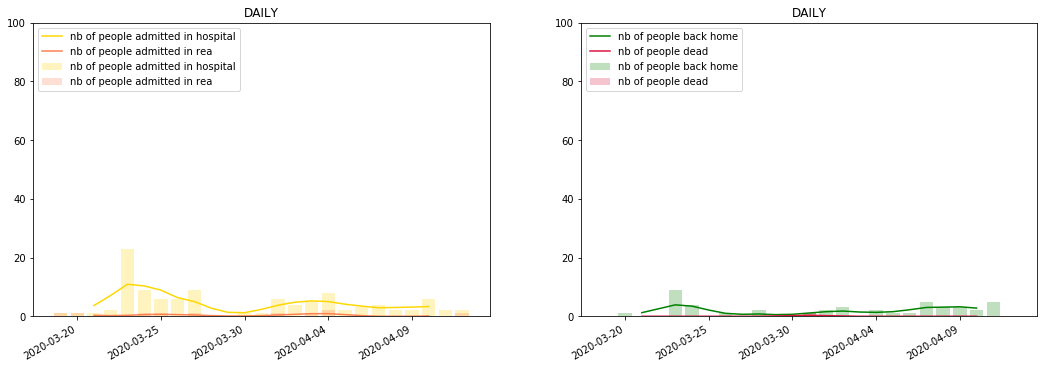

habitants: 440000 456000 3.636364
start with dep 25 --------------------------------------------------------------------------------------- 
Departement 25 Doubs


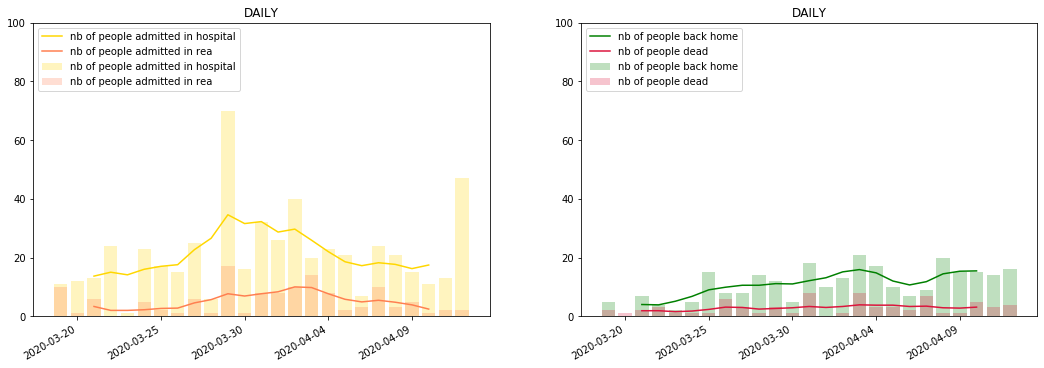

habitants: 571000 574000 0.525394
start with dep 26 --------------------------------------------------------------------------------------- 
Departement 26 Drôme


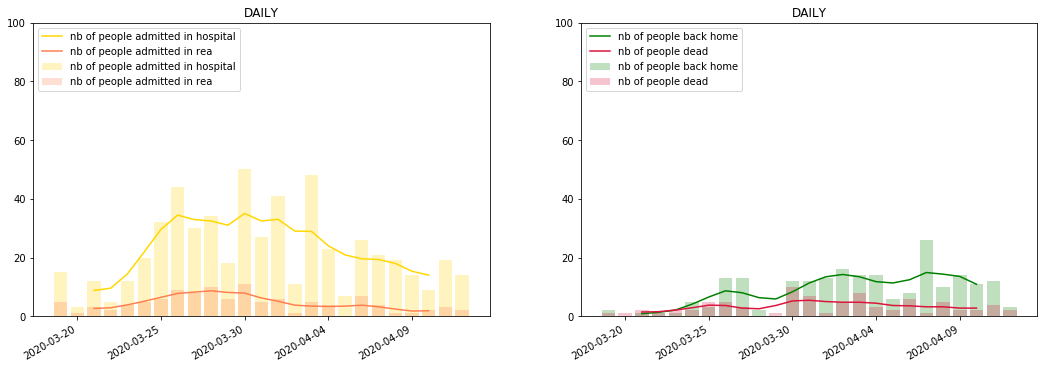

habitants: 546000 564000 3.296703
start with dep 27 --------------------------------------------------------------------------------------- 
Departement 27 Eure


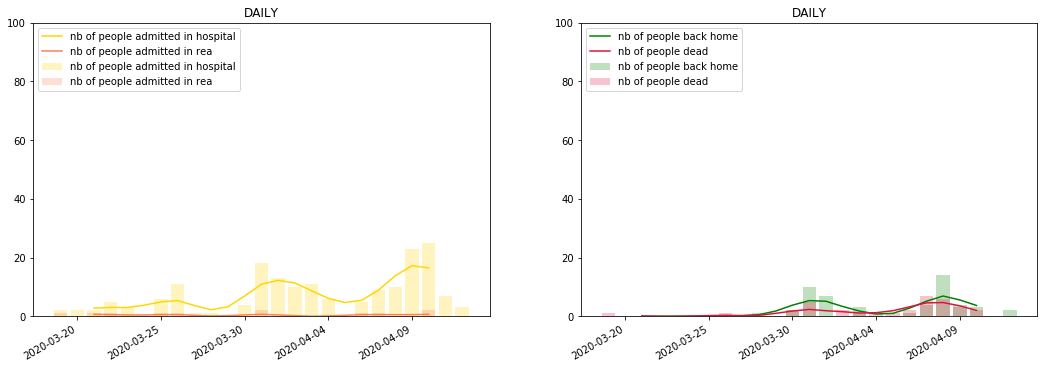

habitants: 590000 616000 4.406780
start with dep 28 --------------------------------------------------------------------------------------- 
Departement 28 Eure-et-Loir


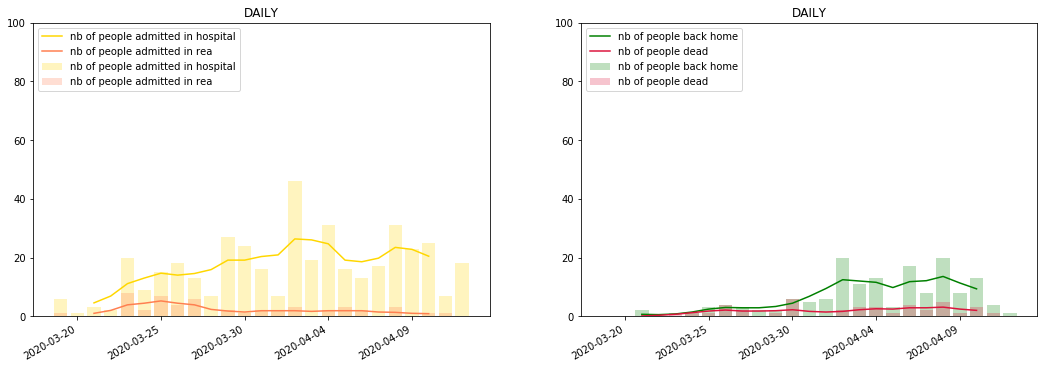

habitants: 441000 458000 3.854875
start with dep 29 --------------------------------------------------------------------------------------- 
Departement 29 Finistère


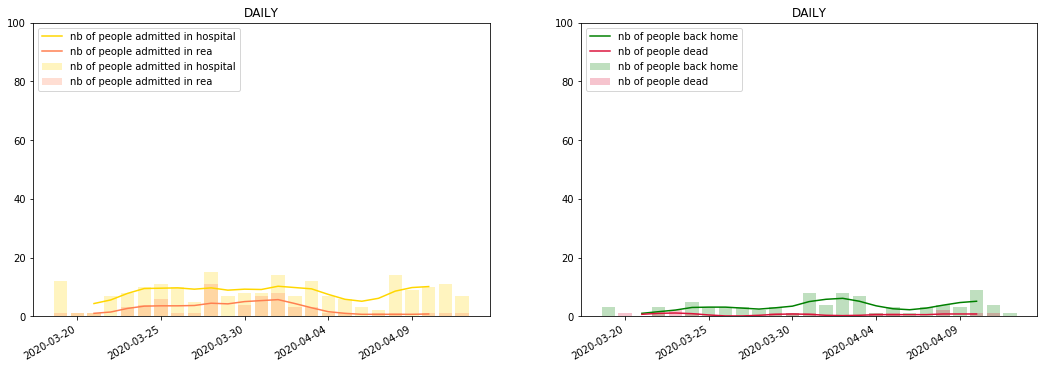

habitants: 930000 947000 1.827957
start with dep 2A --------------------------------------------------------------------------------------- 
Departement 2A Corse-du-Sud


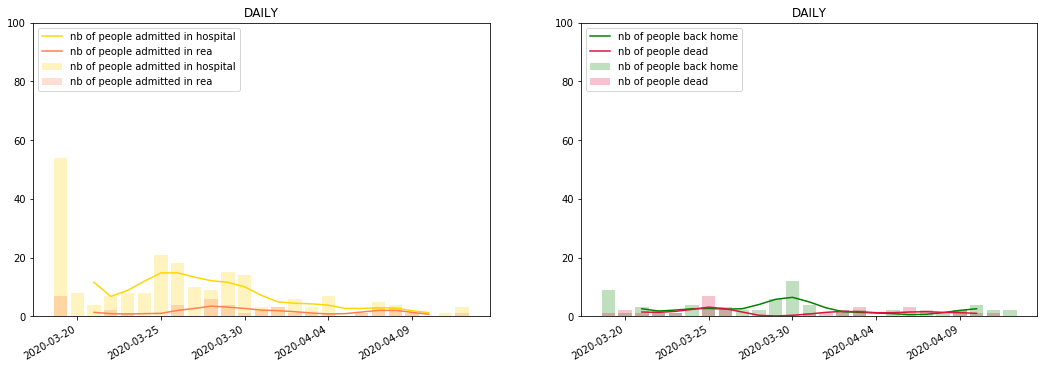

habitants: 170000 172000 1.176471
start with dep 2B --------------------------------------------------------------------------------------- 
Departement 2B Haute-Corse


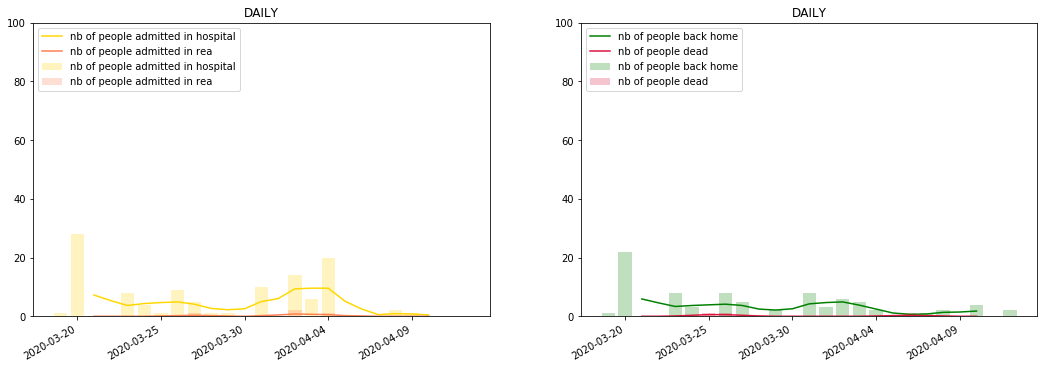

habitants: 192000 195000 1.562500
start with dep 30 --------------------------------------------------------------------------------------- 
Departement 30 Gard


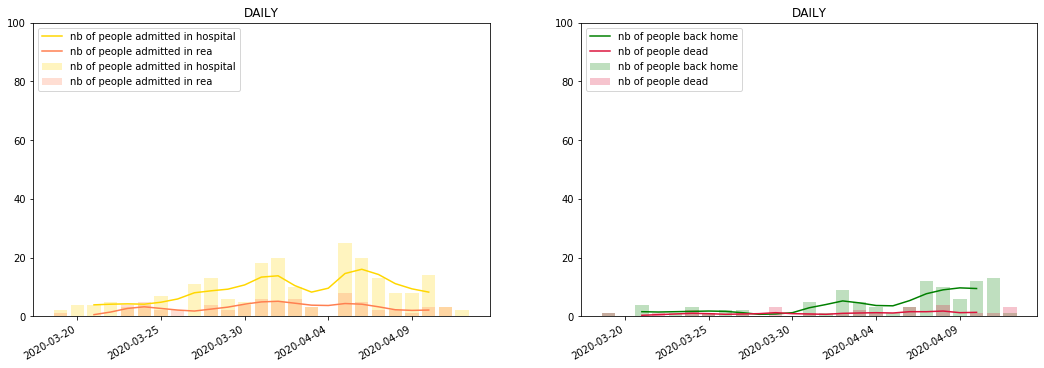

habitants: 761000 780000 2.496715
start with dep 31 --------------------------------------------------------------------------------------- 
Departement 31 Haute-Garonne


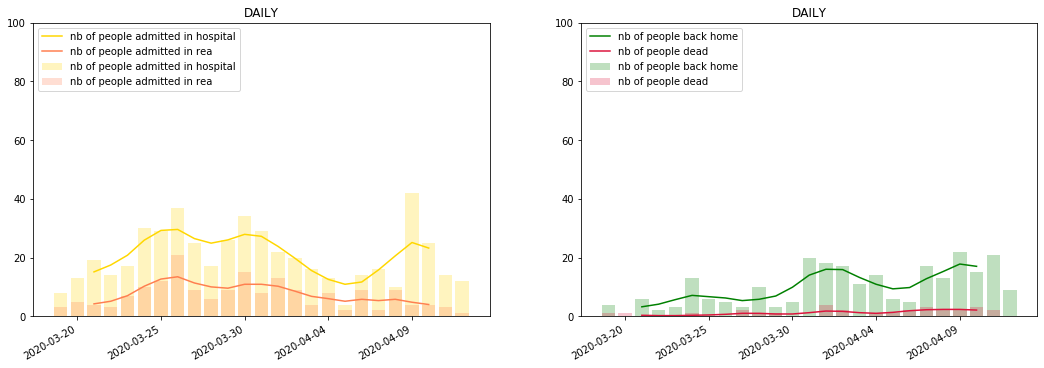

habitants: 1486000 1431000 -3.701211
start with dep 32 --------------------------------------------------------------------------------------- 
Departement 32 Gers


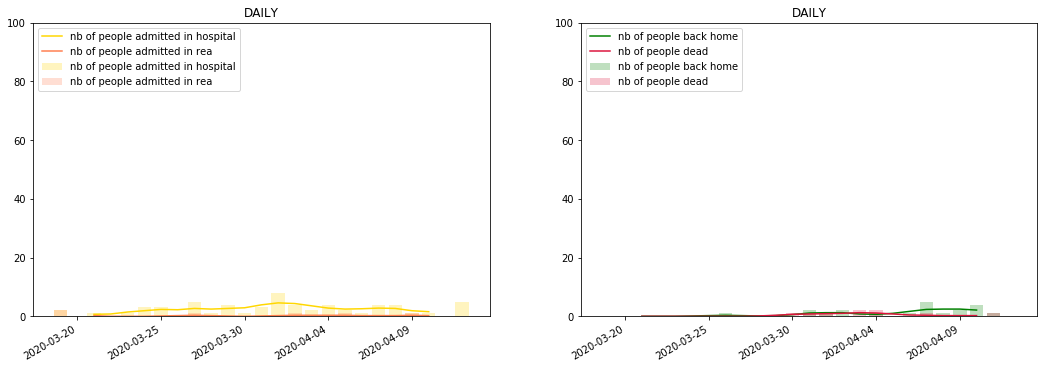

habitants: 199000 211000 6.030151
start with dep 33 --------------------------------------------------------------------------------------- 
Departement 33 Gironde


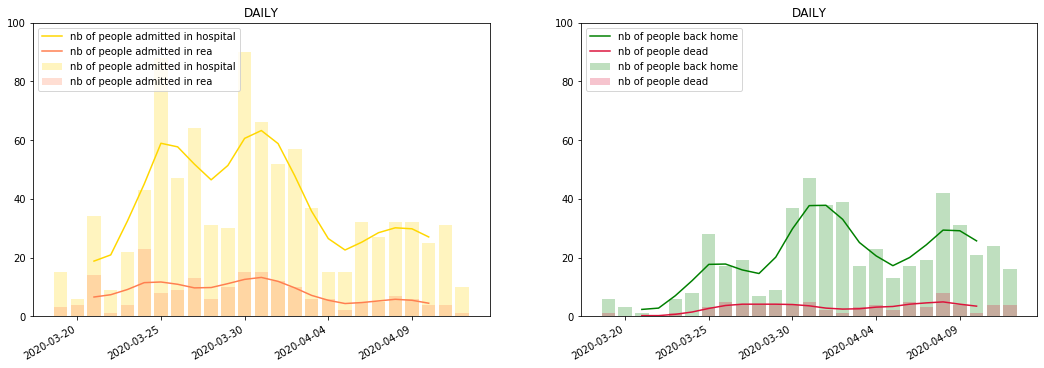

habitants: 1724000 1692000 -1.856148
start with dep 34 --------------------------------------------------------------------------------------- 
Departement 34 Hérault


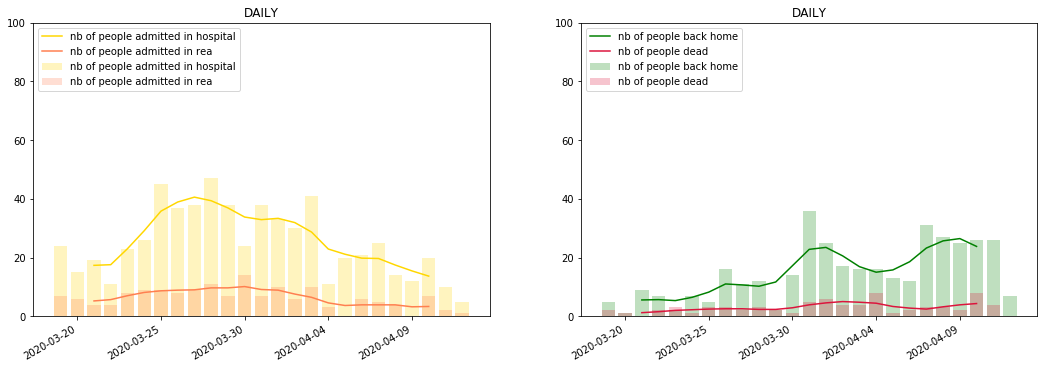

habitants: 1251000 1221000 -2.398082
start with dep 35 --------------------------------------------------------------------------------------- 
Departement 35 Ille-et-Vilaine


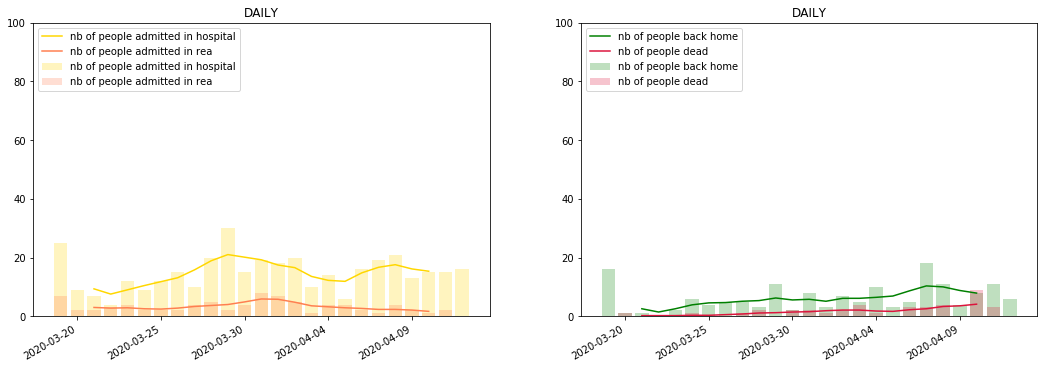

habitants: 1108000 1095000 -1.173285
start with dep 36 --------------------------------------------------------------------------------------- 
Departement 36 Indre


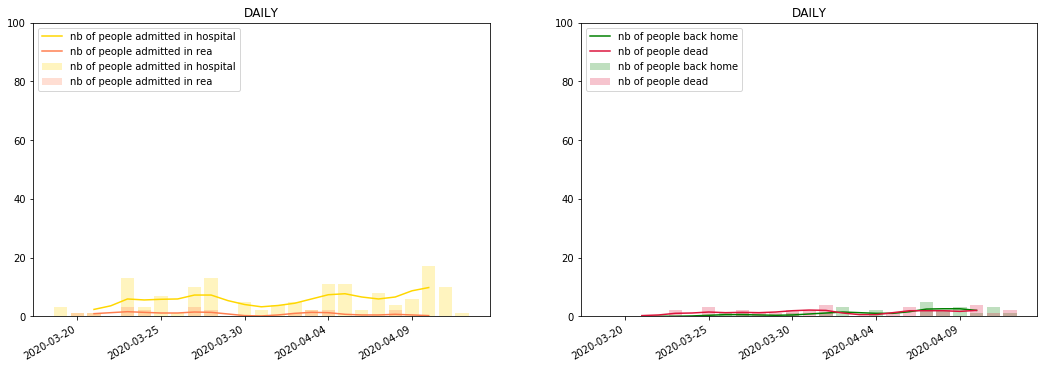

habitants: 223000 225000 0.896861
start with dep 37 --------------------------------------------------------------------------------------- 
Departement 37 Indre-et-Loire


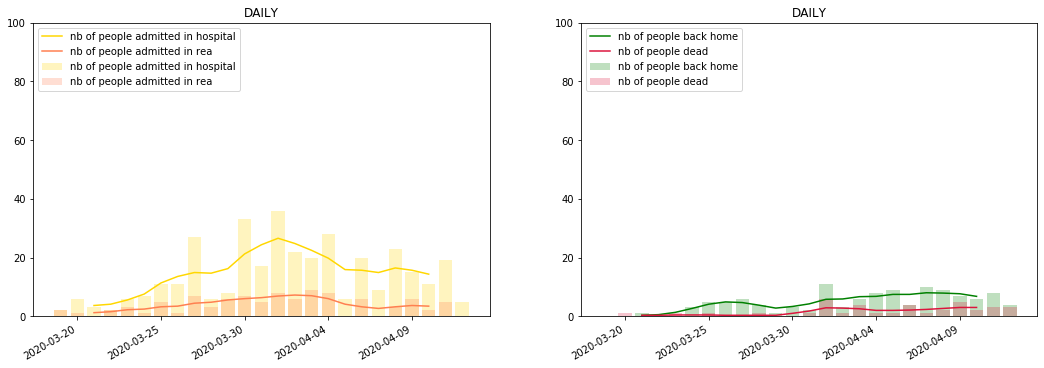

habitants: 631000 626000 -0.792393
start with dep 38 --------------------------------------------------------------------------------------- 
Departement 38 Isère


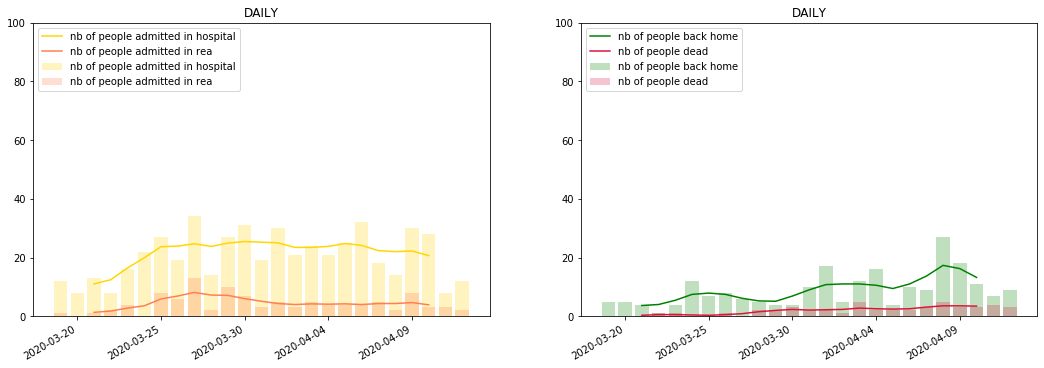

habitants: 1346000 1319000 -2.005944
start with dep 39 --------------------------------------------------------------------------------------- 
Departement 39 Jura


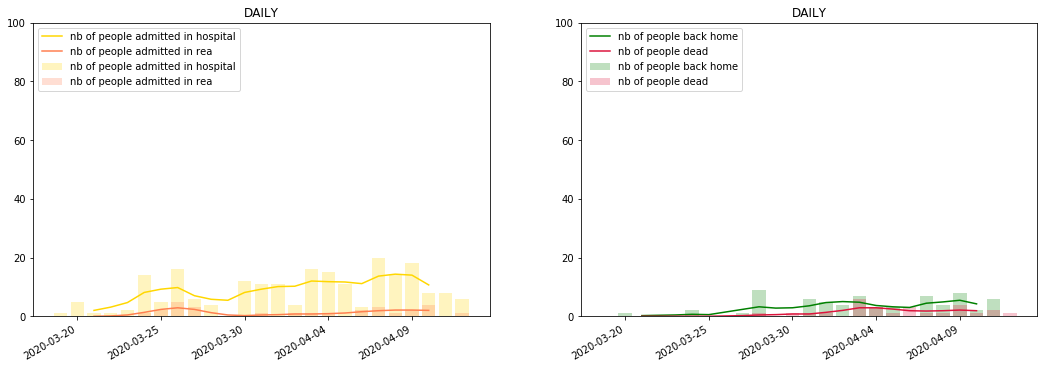

habitants: 268000 273000 1.865672
start with dep 40 --------------------------------------------------------------------------------------- 
Departement 40 Landes


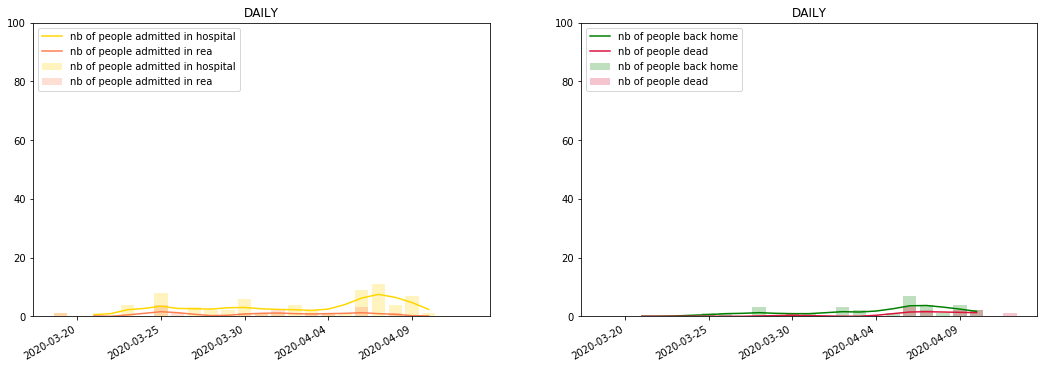

habitants: 447000 457000 2.237136
start with dep 41 --------------------------------------------------------------------------------------- 
Departement 41 Loir-et-Cher


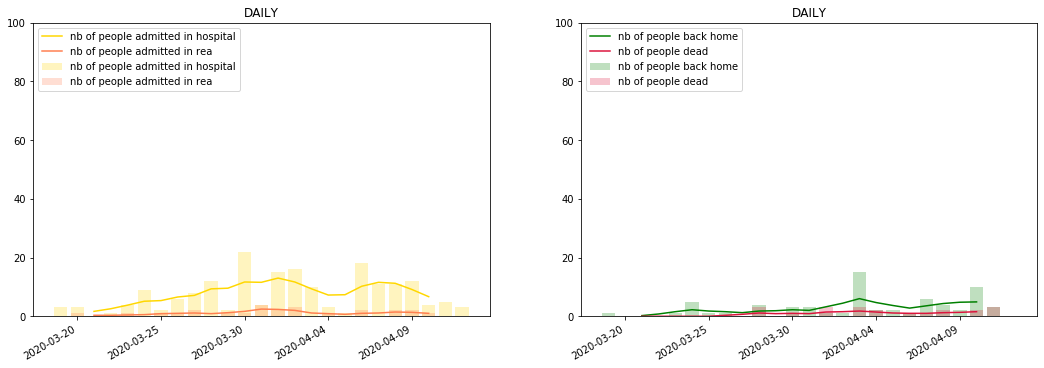

habitants: 344000 355000 3.197674
start with dep 42 --------------------------------------------------------------------------------------- 
Departement 42 Loire


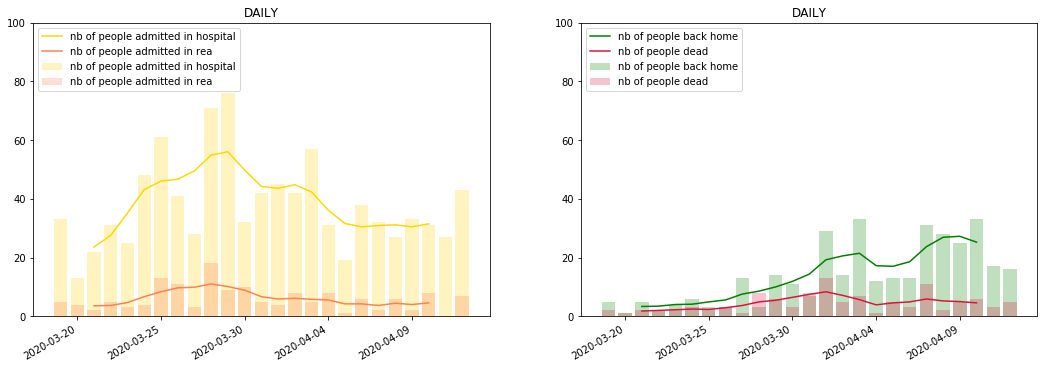

habitants: 763000 779000 2.096986
start with dep 43 --------------------------------------------------------------------------------------- 
Departement 43 Haute-Loire


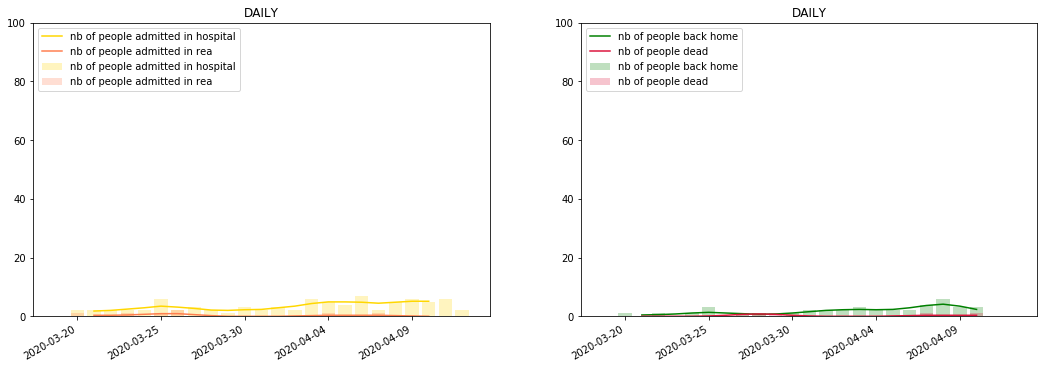

habitants: 229000 243000 6.113537
start with dep 44 --------------------------------------------------------------------------------------- 
Departement 44 Loire-Atlantique


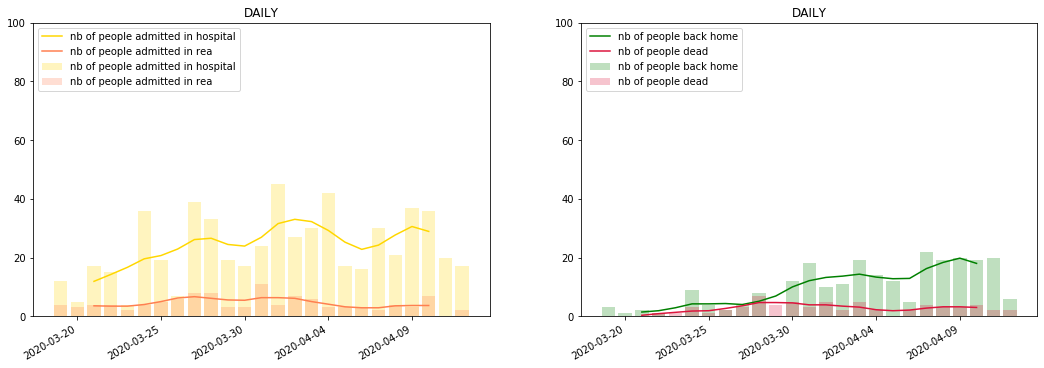

habitants: 1485000 1470000 -1.010101
start with dep 45 --------------------------------------------------------------------------------------- 
Departement 45 Loiret


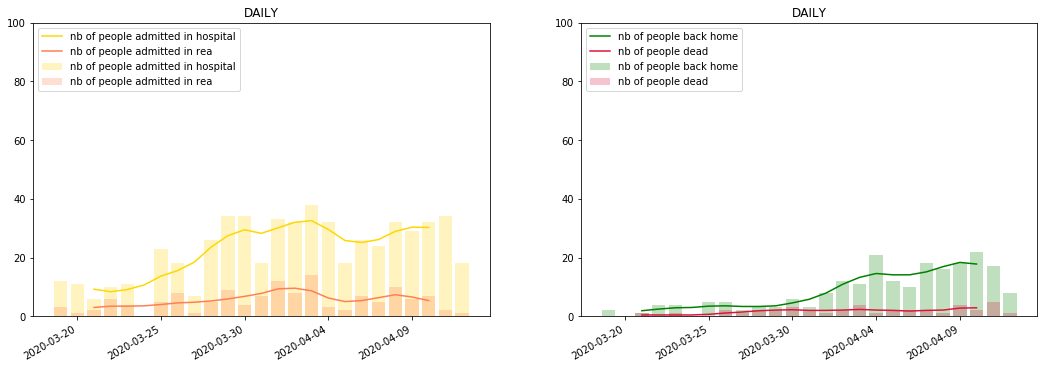

habitants: 715000 715000 0.000000
start with dep 46 --------------------------------------------------------------------------------------- 
Departement 46 Lot


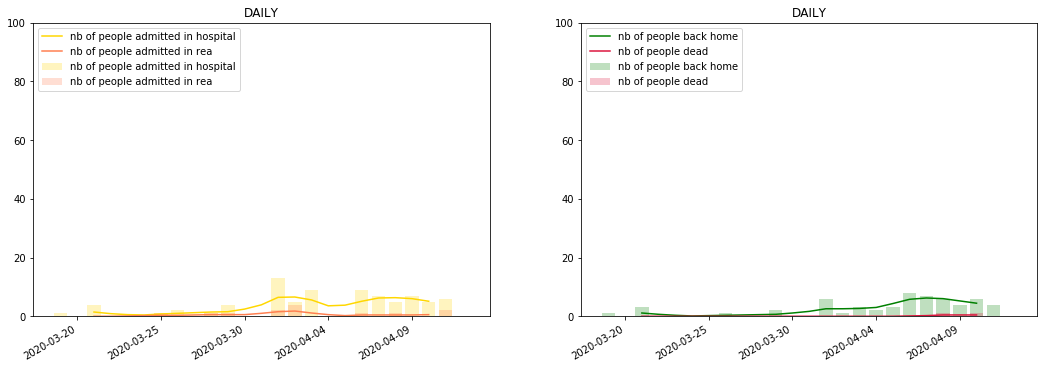

habitants: 180000 190000 5.555556
start with dep 47 --------------------------------------------------------------------------------------- 
Departement 47 Lot-et-Garonne


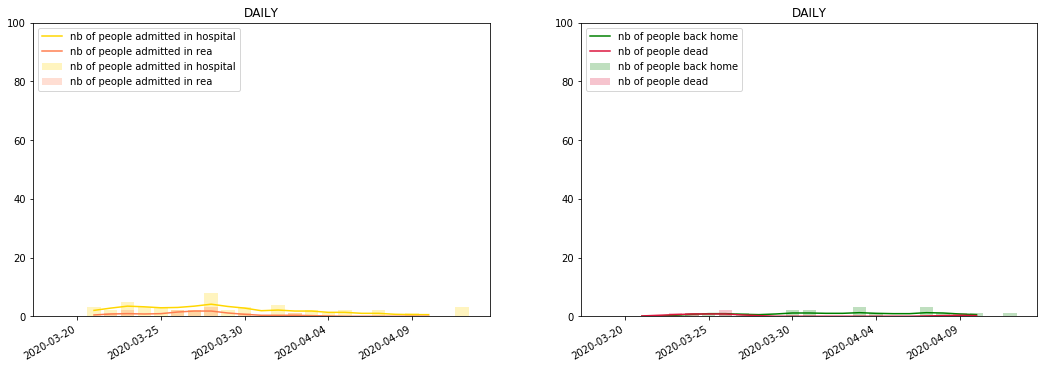

habitants: 346000 353000 2.023121
start with dep 48 --------------------------------------------------------------------------------------- 
Departement 48 Lozère


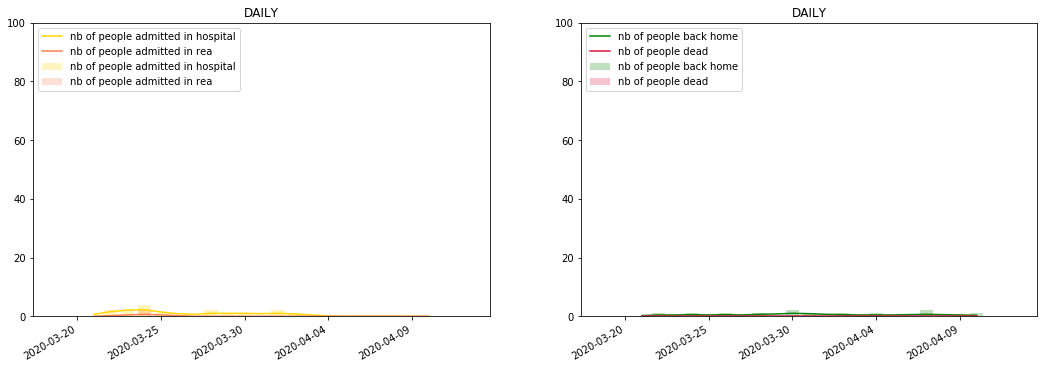

habitants: 81000 82000 1.234568
start with dep 49 --------------------------------------------------------------------------------------- 
Departement 49 Maine-et-Loire


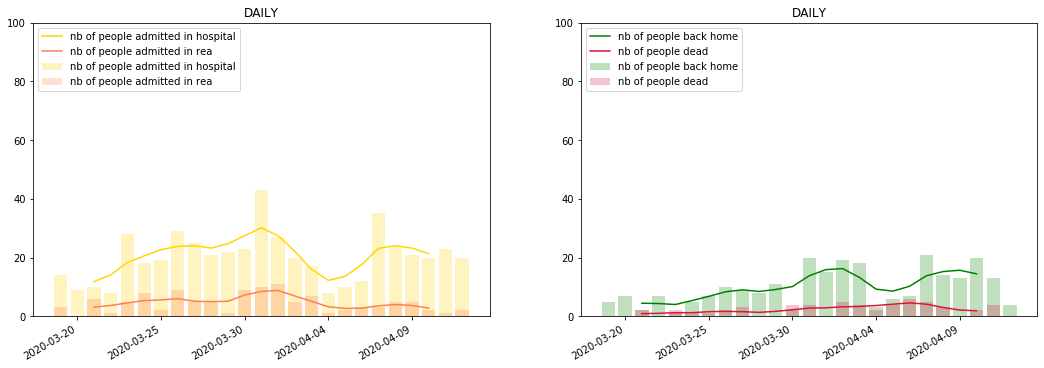

habitants: 835000 832000 -0.359281
start with dep 50 --------------------------------------------------------------------------------------- 
Departement 50 Manche


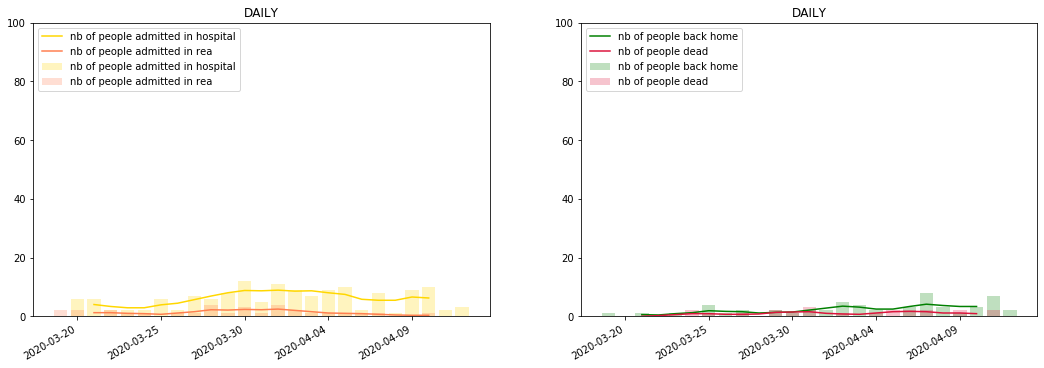

habitants: 501000 514000 2.594810
start with dep 51 --------------------------------------------------------------------------------------- 
Departement 51 Marne


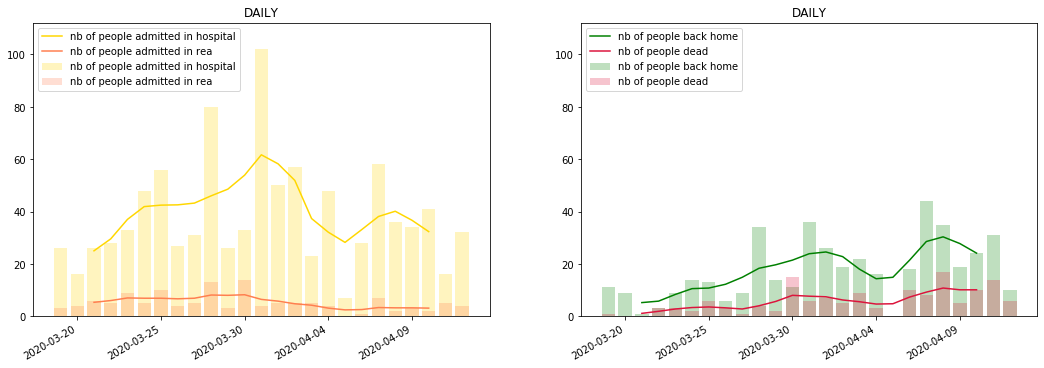

habitants: 592000 585000 -1.182432
start with dep 52 --------------------------------------------------------------------------------------- 
Departement 52 Haute-Marne


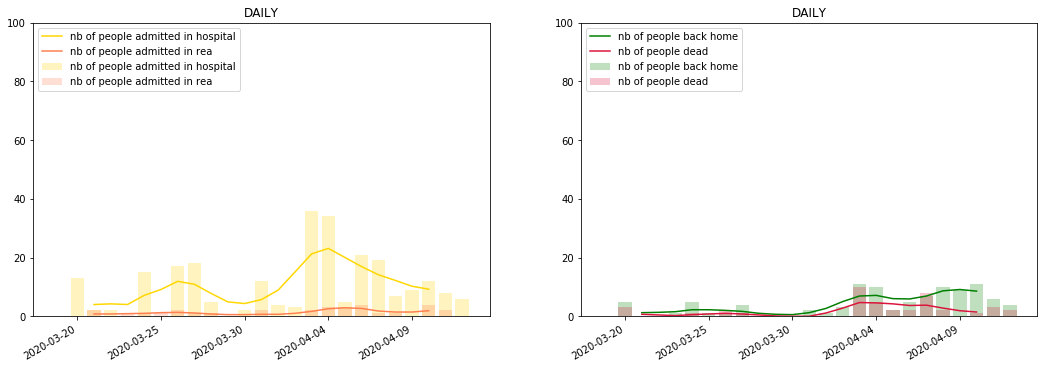

habitants: 175000 178000 1.714286
start with dep 53 --------------------------------------------------------------------------------------- 
Departement 53 Mayenne


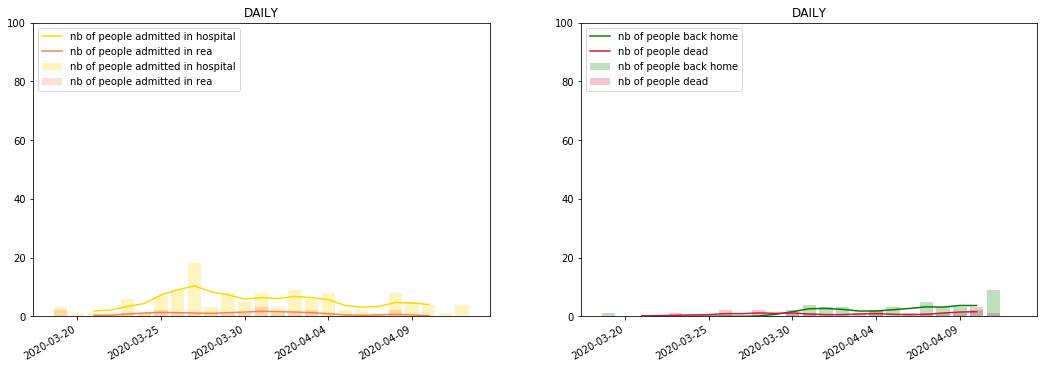

habitants: 307000 314000 2.280130
start with dep 54 --------------------------------------------------------------------------------------- 
Departement 54 Meurthe-et-Moselle


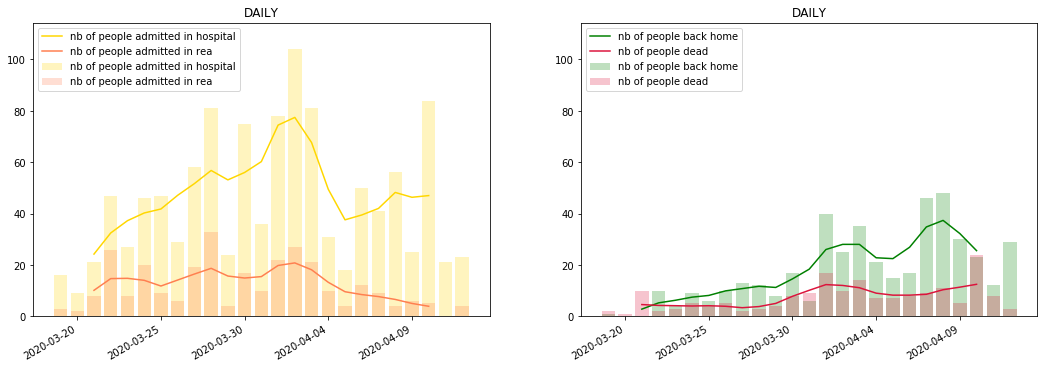

habitants: 770000 768000 -0.259740
start with dep 55 --------------------------------------------------------------------------------------- 
Departement 55 Meuse


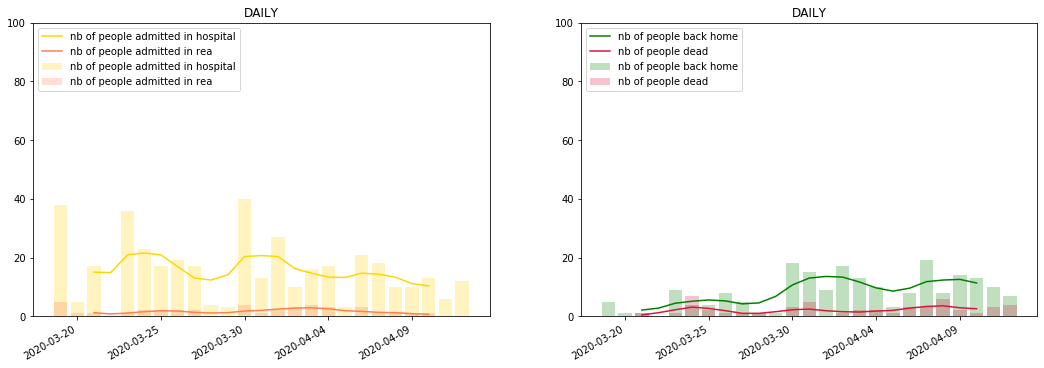

habitants: 191000 198000 3.664921
start with dep 56 --------------------------------------------------------------------------------------- 
Departement 56 Morbihan


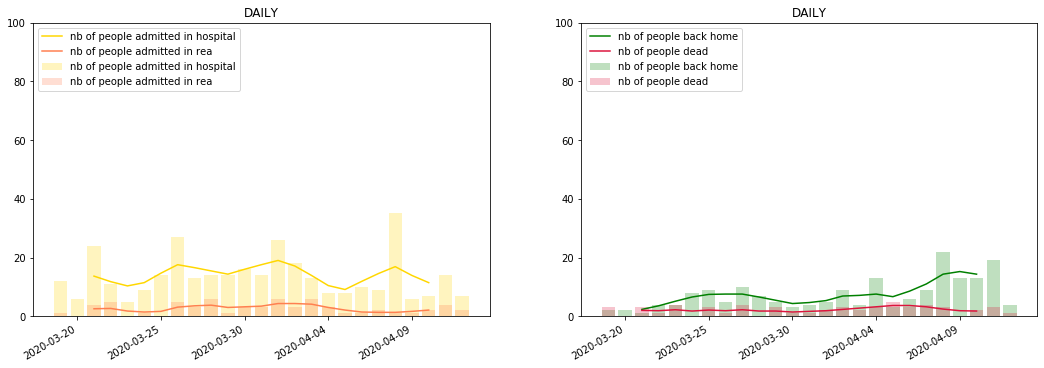

habitants: 771000 801000 3.891051
start with dep 57 --------------------------------------------------------------------------------------- 
Departement 57 Moselle


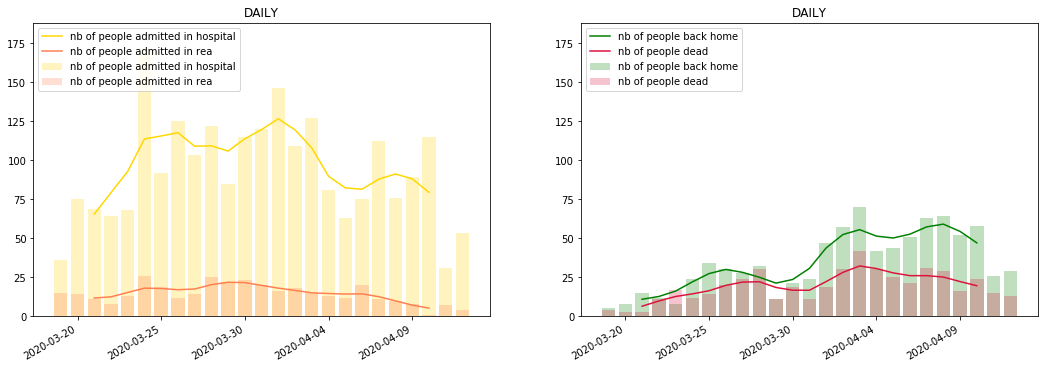

habitants: 1164000 1155000 -0.773196
start with dep 58 --------------------------------------------------------------------------------------- 
Departement 58 Nièvre


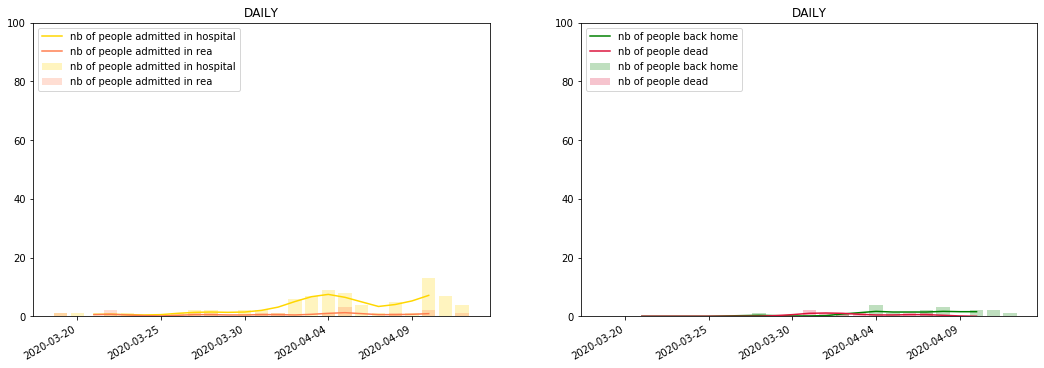

habitants: 196000 205000 4.591837
start with dep 59 --------------------------------------------------------------------------------------- 
Departement 59 Nord


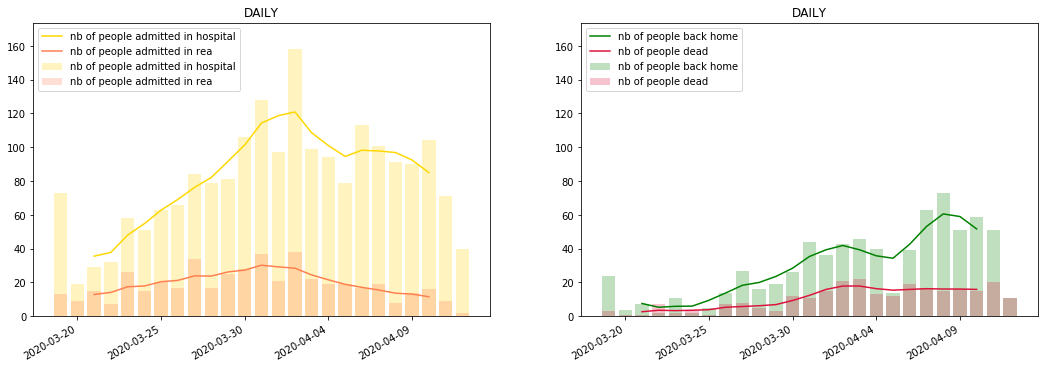

habitants: 2668000 2660000 -0.299850
start with dep 60 --------------------------------------------------------------------------------------- 
Departement 60 Oise


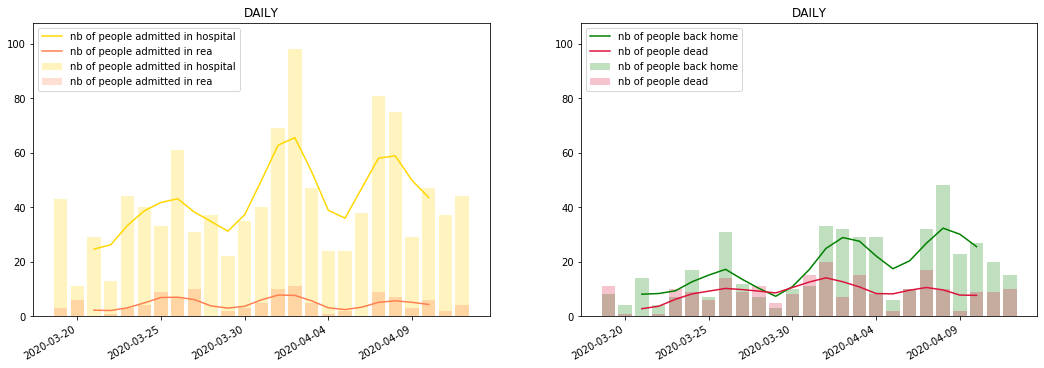

habitants: 839000 871000 3.814064
start with dep 61 --------------------------------------------------------------------------------------- 
Departement 61 Orne


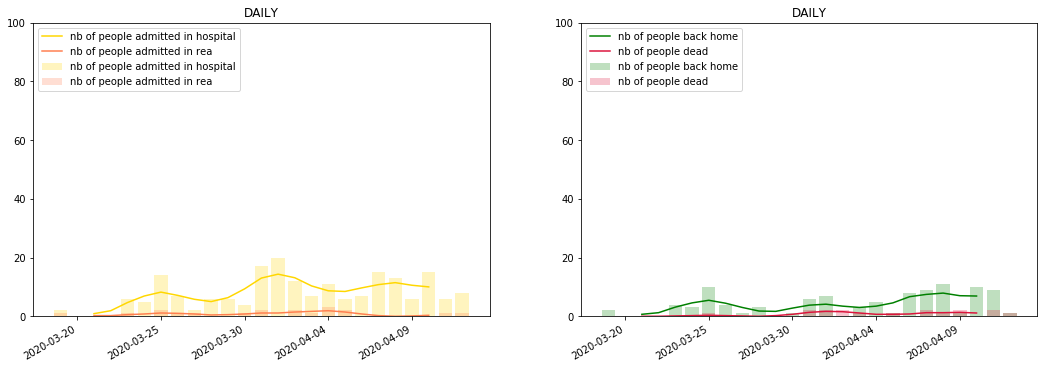

habitants: 281000 294000 4.626335
start with dep 62 --------------------------------------------------------------------------------------- 
Departement 62 Pas-de-Calais


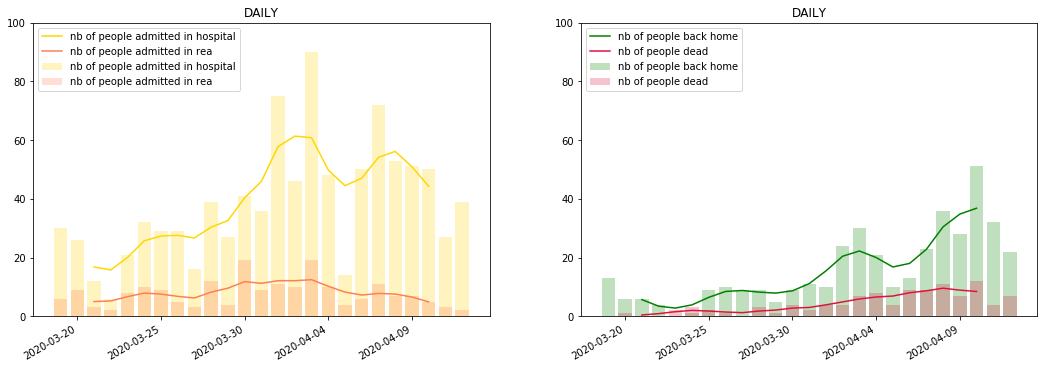

habitants: 1469000 1507000 2.586794
start with dep 63 --------------------------------------------------------------------------------------- 
Departement 63 Puy-de-Dôme


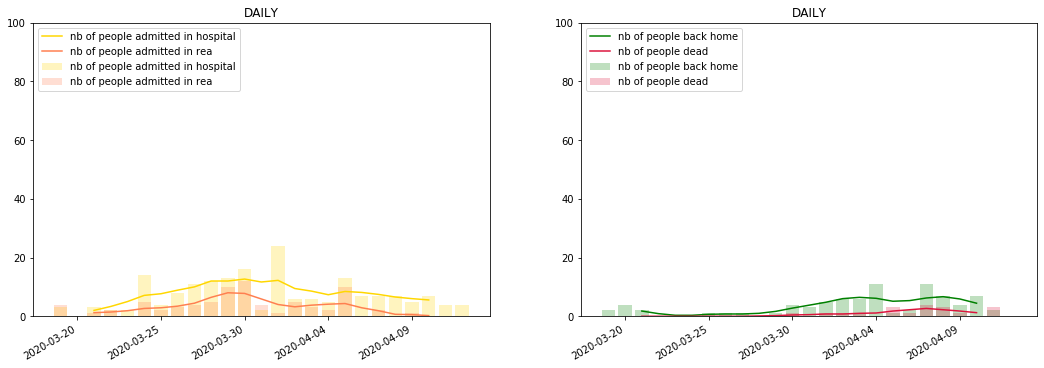

habitants: 678000 670000 -1.179941
start with dep 64 --------------------------------------------------------------------------------------- 
Departement 64 Pyrénées-Atlantiques


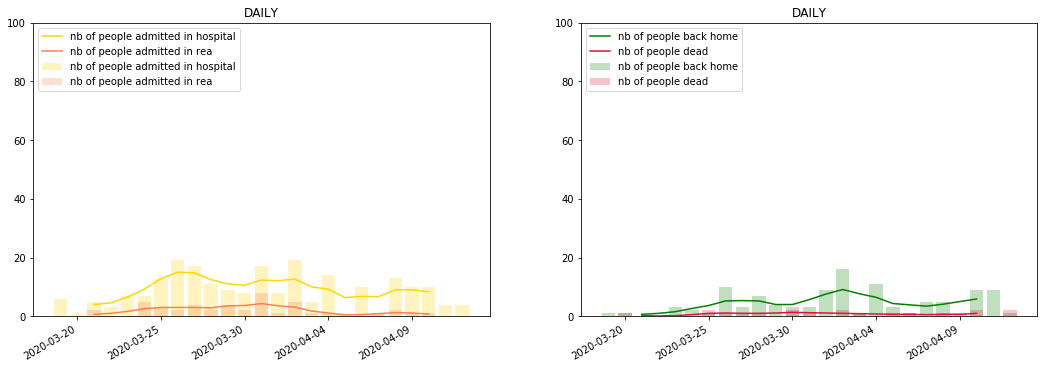

habitants: 723000 723000 0.000000
start with dep 65 --------------------------------------------------------------------------------------- 
Departement 65 Hautes-Pyrénées


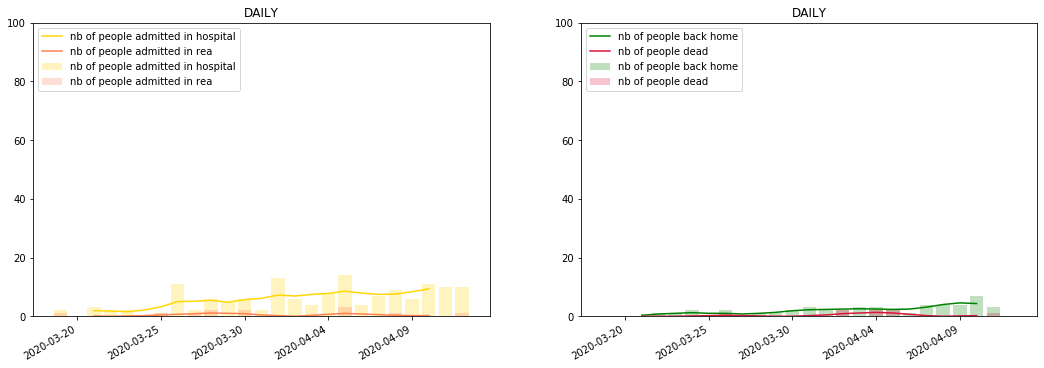

habitants: 257000 234000 -8.949416
start with dep 66 --------------------------------------------------------------------------------------- 
Departement 66 Pyrénées-Orientales


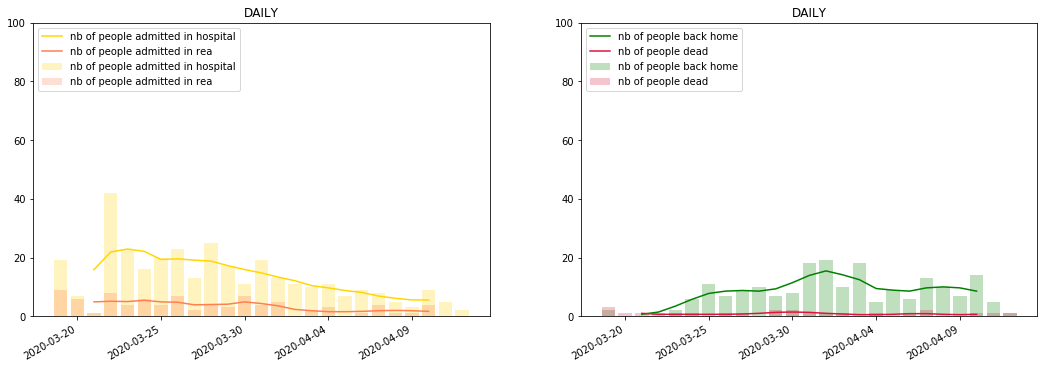

habitants: 523000 507000 -3.059273
start with dep 67 --------------------------------------------------------------------------------------- 
Departement 67 Bas-Rhin


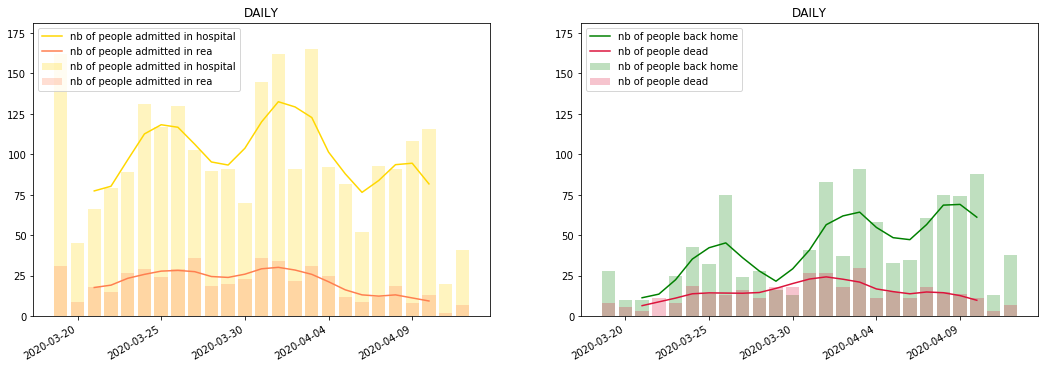

habitants: 1234000 1224000 -0.810373
start with dep 68 --------------------------------------------------------------------------------------- 
Departement 68 Haut-Rhin


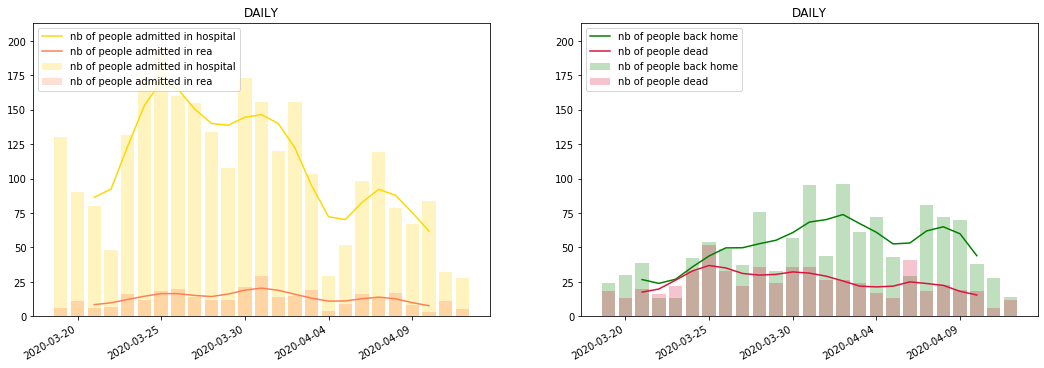

habitants: 812000 824000 1.477833
start with dep 69 --------------------------------------------------------------------------------------- 
Departement 69 Rhône


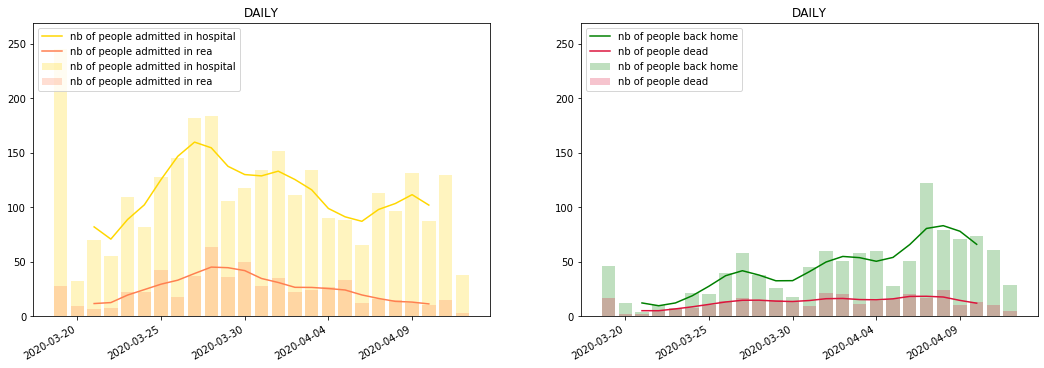

habitants: 1970000 1891000 -4.010152
start with dep 70 --------------------------------------------------------------------------------------- 
Departement 70 Haute-Saône


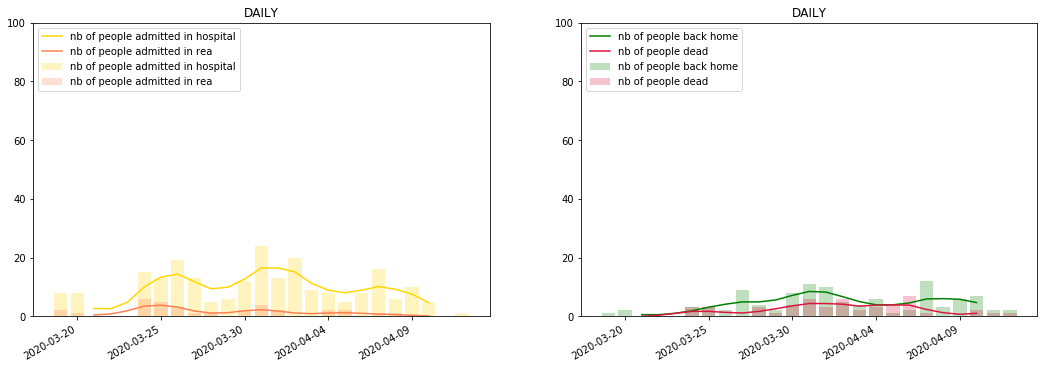

habitants: 238000 246000 3.361345
start with dep 71 --------------------------------------------------------------------------------------- 
Departement 71 Saône-et-Loire


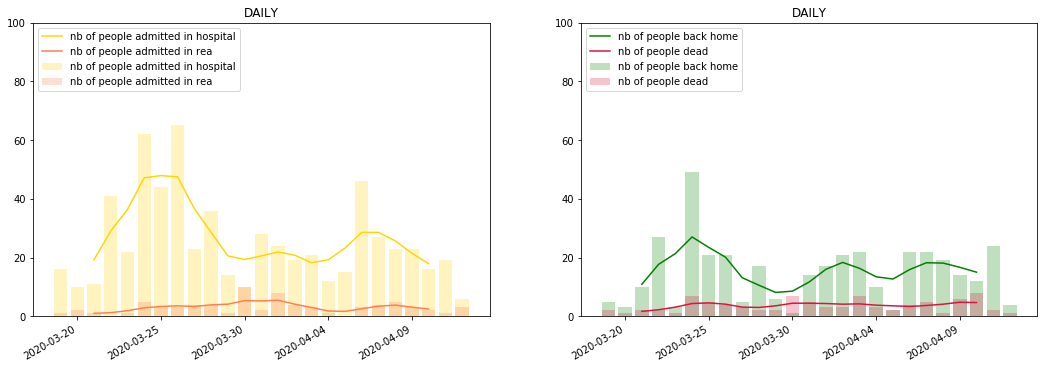

habitants: 550000 572000 4.000000
start with dep 72 --------------------------------------------------------------------------------------- 
Departement 72 Sarthe


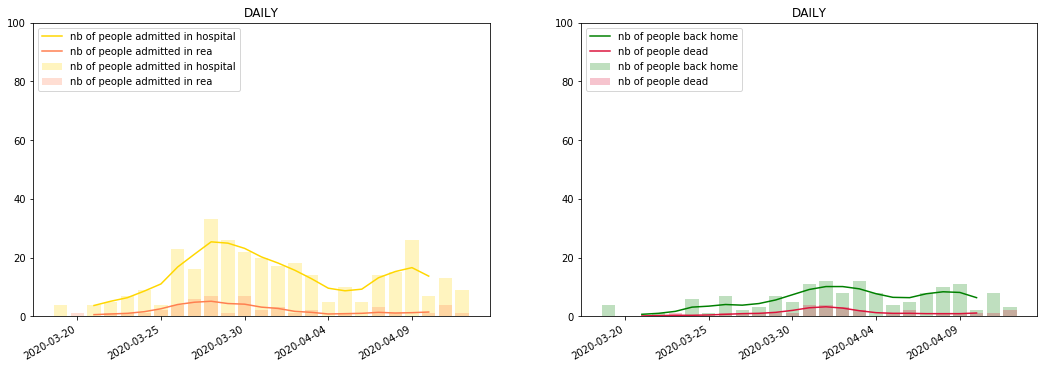

habitants: 564000 567000 0.531915
start with dep 73 --------------------------------------------------------------------------------------- 
Departement 73 Savoie


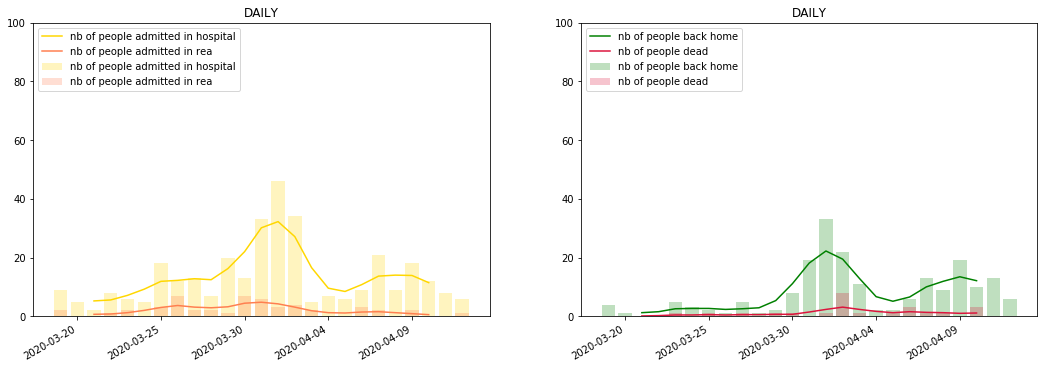

habitants: 755000 465000 -38.410596
start with dep 74 --------------------------------------------------------------------------------------- 
Departement 74 Haute-Savoie


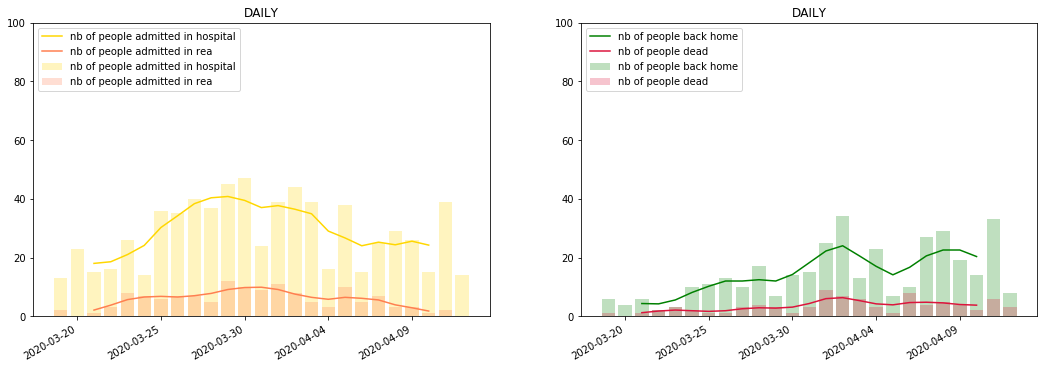

habitants: 1114000 996000 -10.592460
start with dep 75 --------------------------------------------------------------------------------------- 
Departement 75 Paris


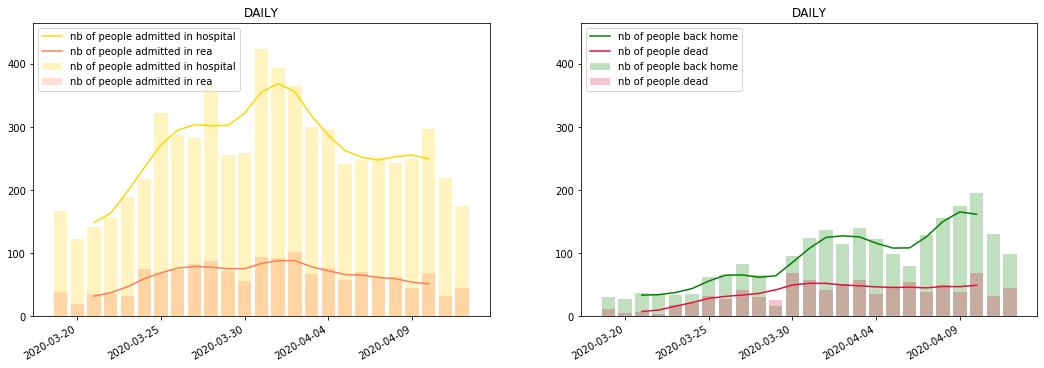

habitants: 2608000 2000000 -23.312883
start with dep 76 --------------------------------------------------------------------------------------- 
Departement 76 Seine-Maritime


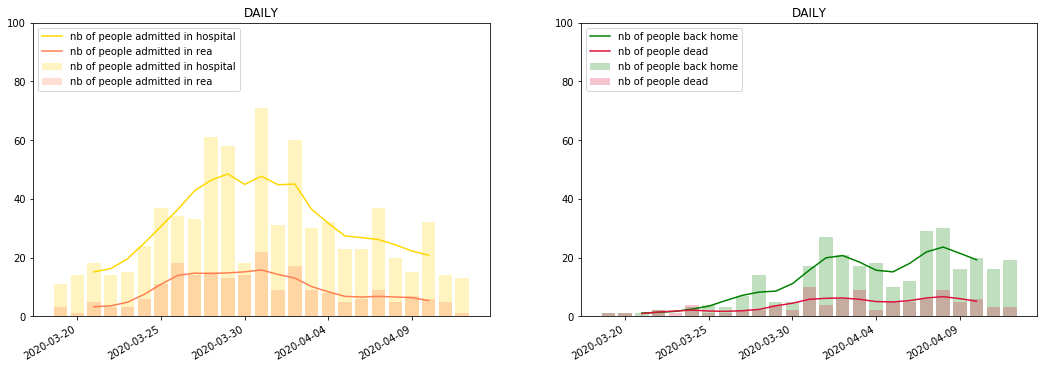

habitants: 1243000 1238000 -0.402253
start with dep 77 --------------------------------------------------------------------------------------- 
Departement 77 Seine-et-Marne


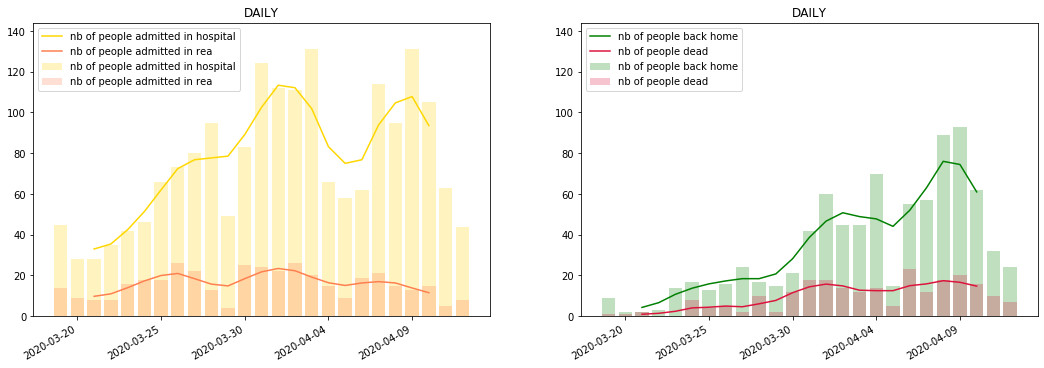

habitants: 1497000 1519000 1.469606
start with dep 78 --------------------------------------------------------------------------------------- 
Departement 78 Yvelines


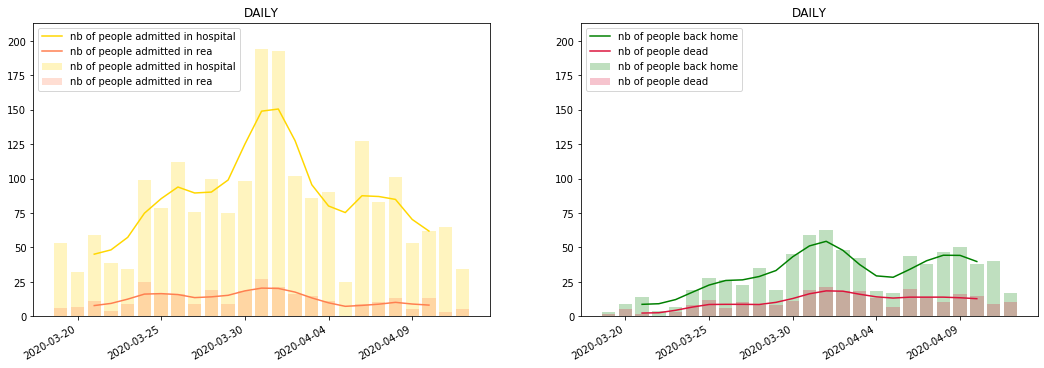

habitants: 1464000 1501000 2.527322
start with dep 79 --------------------------------------------------------------------------------------- 
Departement 79 Deux-Sèvres


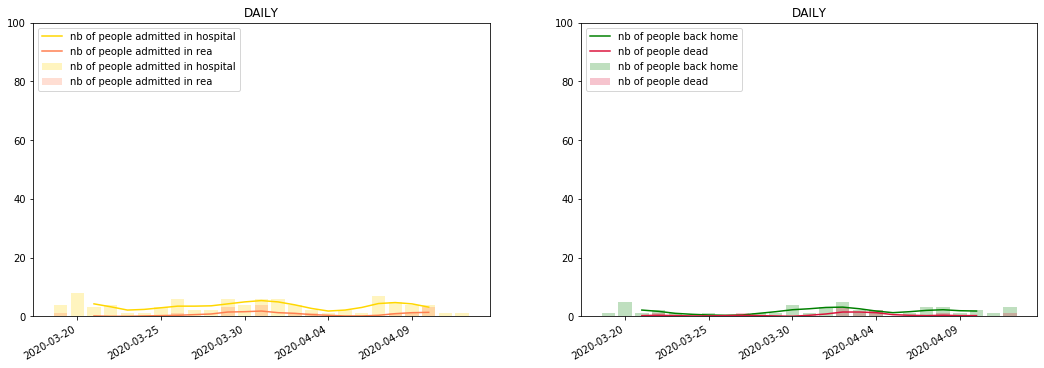

habitants: 377000 386000 2.387268
start with dep 80 --------------------------------------------------------------------------------------- 
Departement 80 Somme


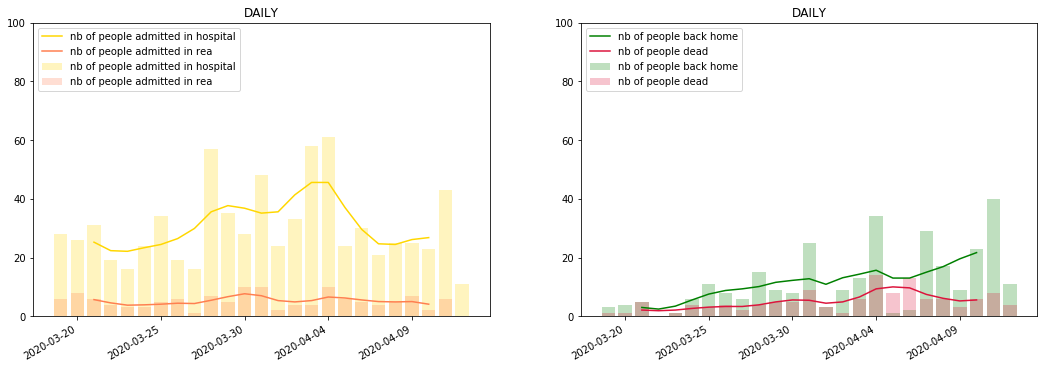

habitants: 595000 599000 0.672269
start with dep 81 --------------------------------------------------------------------------------------- 
Departement 81 Tarn


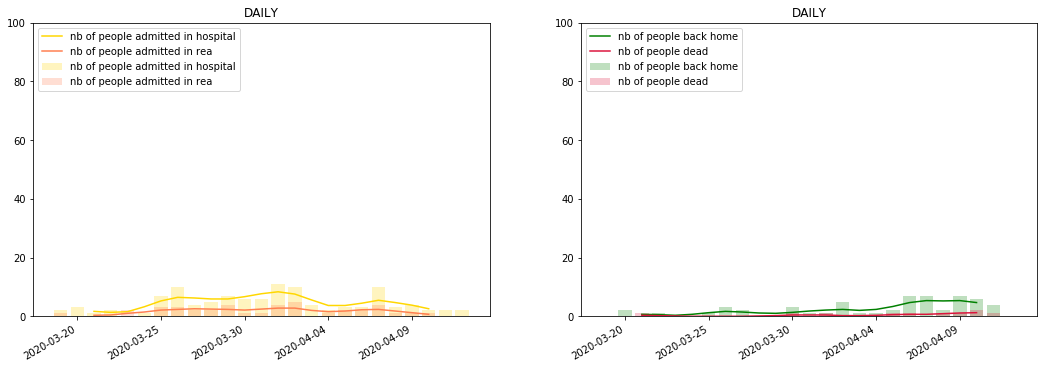

habitants: 393000 405000 3.053435
start with dep 82 --------------------------------------------------------------------------------------- 
Departement 82 Tarn-et-Garonne


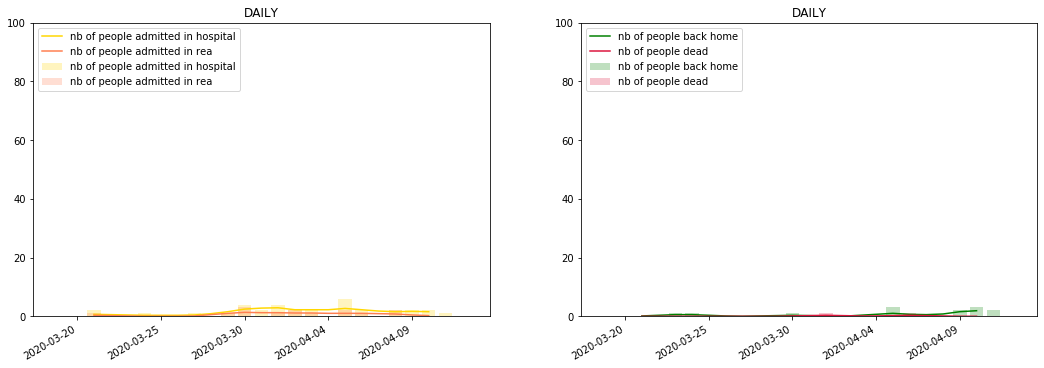

habitants: 259000 267000 3.088803
start with dep 83 --------------------------------------------------------------------------------------- 
Departement 83 Var


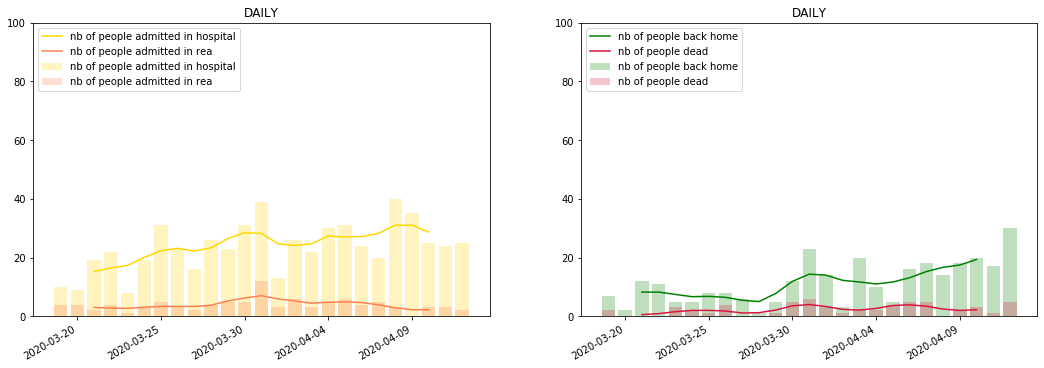

habitants: 1127000 1172000 3.992902
start with dep 84 --------------------------------------------------------------------------------------- 
Departement 84 Vaucluse


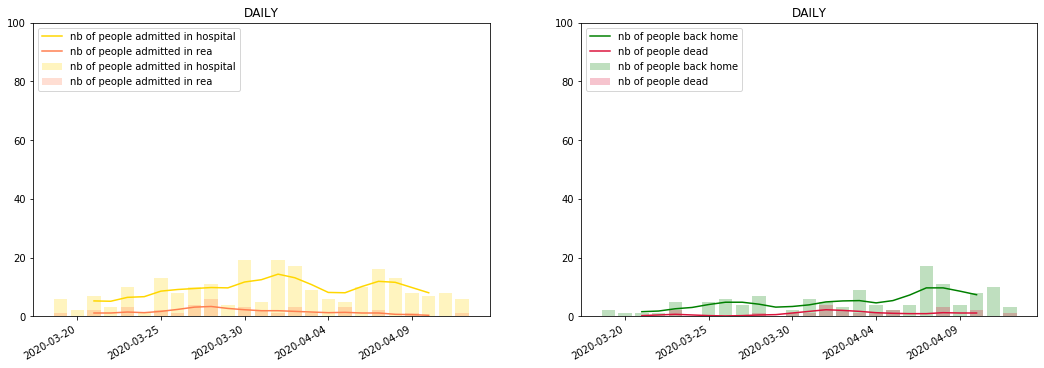

habitants: 589000 614000 4.244482
start with dep 85 --------------------------------------------------------------------------------------- 
Departement 85 Vendée


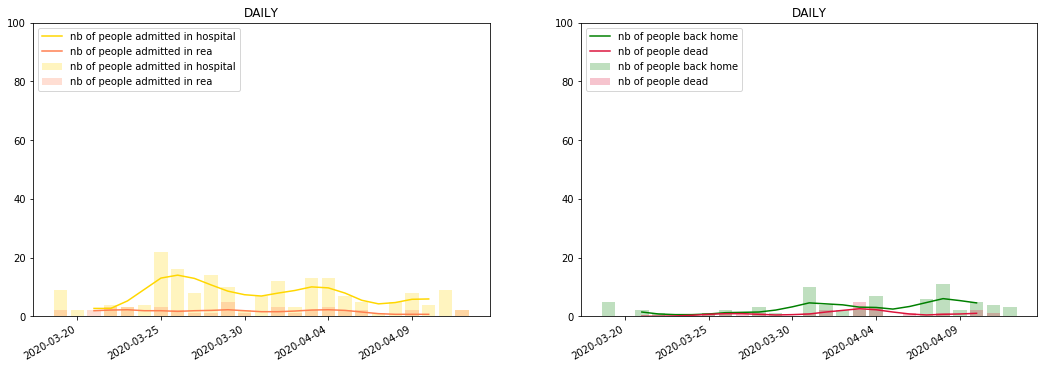

habitants: 715000 732000 2.377622
start with dep 86 --------------------------------------------------------------------------------------- 
Departement 86 Vienne


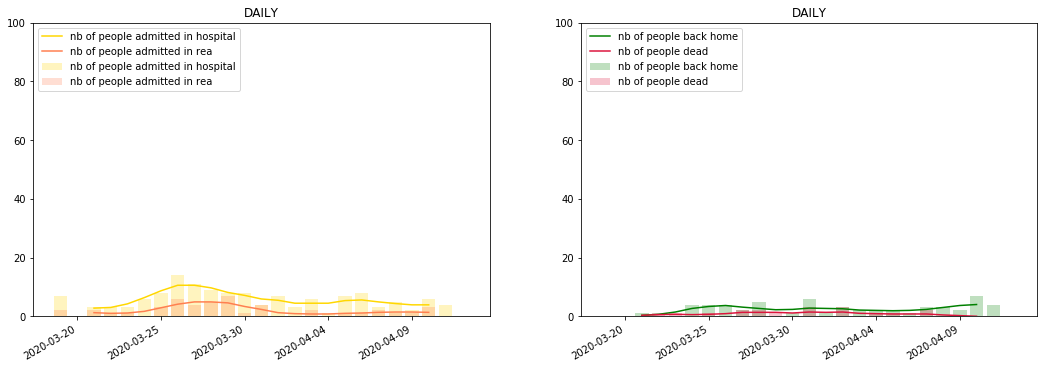

habitants: 433000 423000 -2.309469
start with dep 87 --------------------------------------------------------------------------------------- 
Departement 87 Haute-Vienne


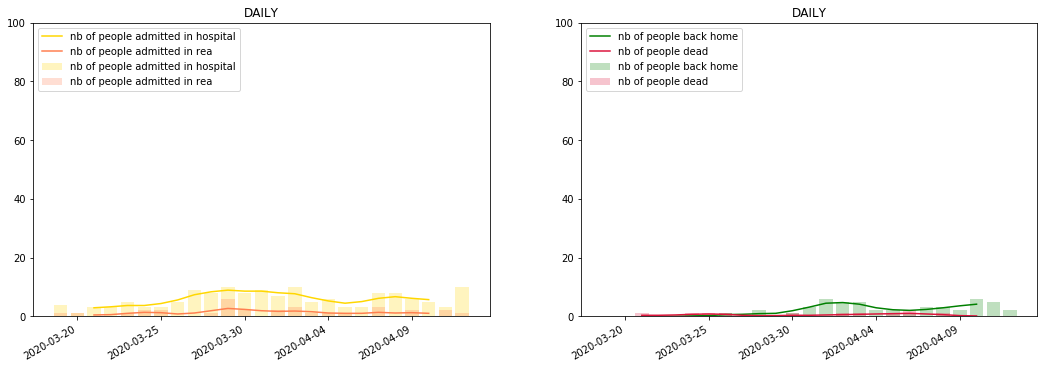

habitants: 384000 378000 -1.562500
start with dep 88 --------------------------------------------------------------------------------------- 
Departement 88 Vosges


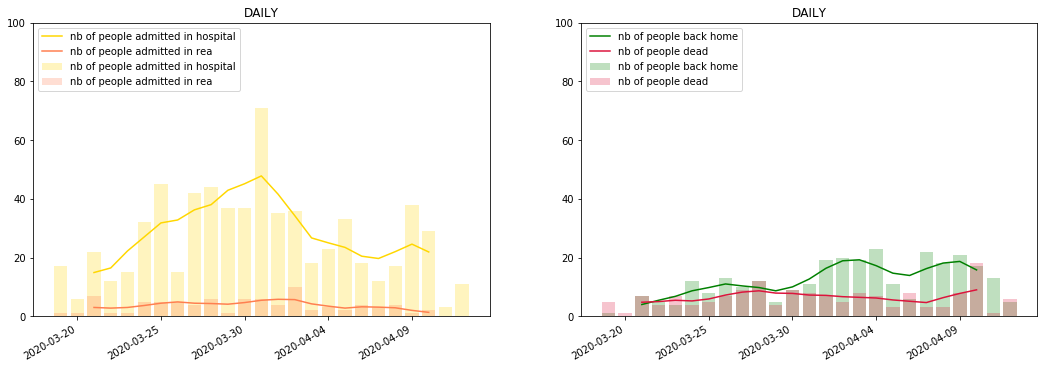

habitants: 365000 376000 3.013699
start with dep 89 --------------------------------------------------------------------------------------- 
Departement 89 Yonne


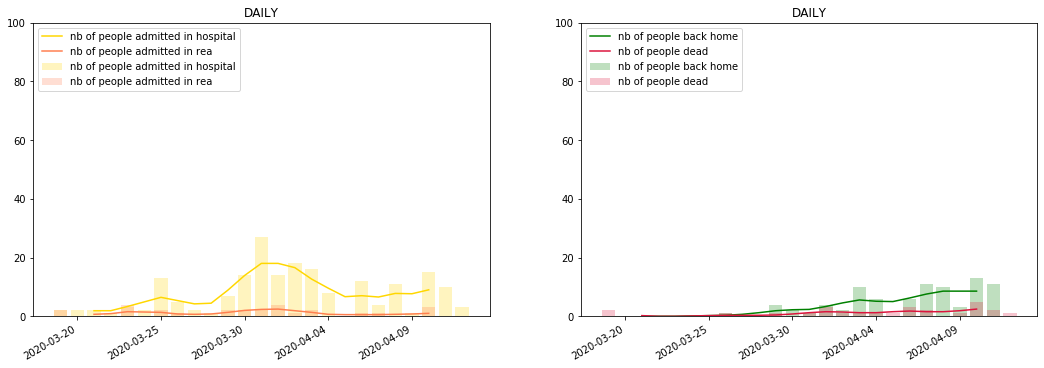

habitants: 341000 366000 7.331378
start with dep 90 --------------------------------------------------------------------------------------- 
Departement 90 Territoire de Belfort


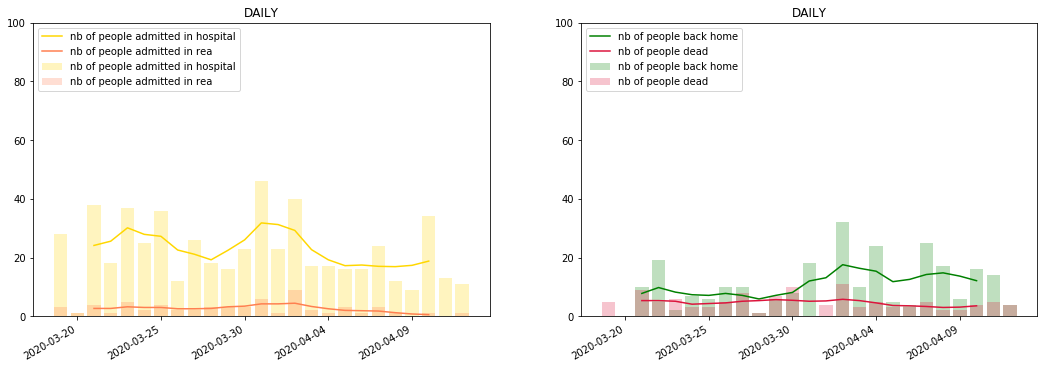

habitants: 132000 134000 1.515152
start with dep 91 --------------------------------------------------------------------------------------- 
Departement 91 Essonne


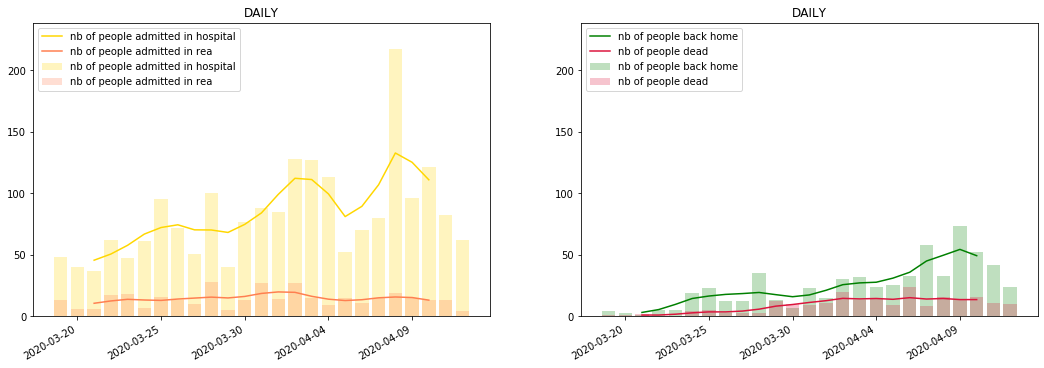

habitants: 1334000 1353000 1.424288
start with dep 92 --------------------------------------------------------------------------------------- 
Departement 92 Hauts-de-Seine


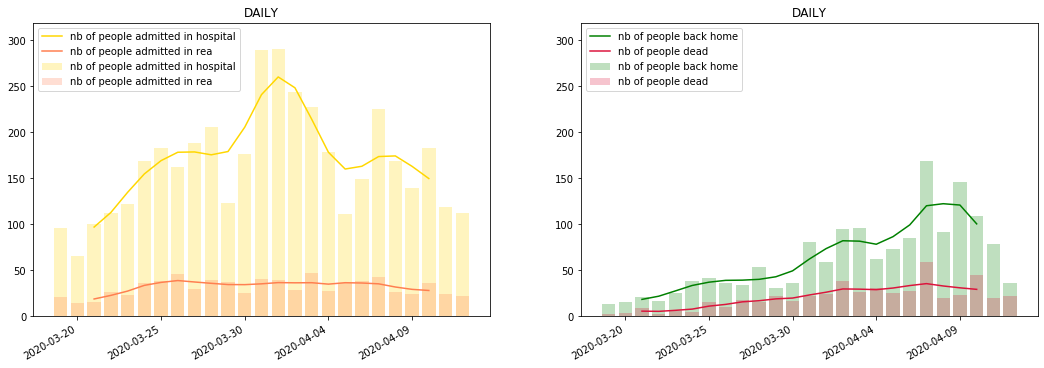

habitants: 1671000 1568000 -6.163974
start with dep 93 --------------------------------------------------------------------------------------- 
Departement 93 Seine-Saint-Denis


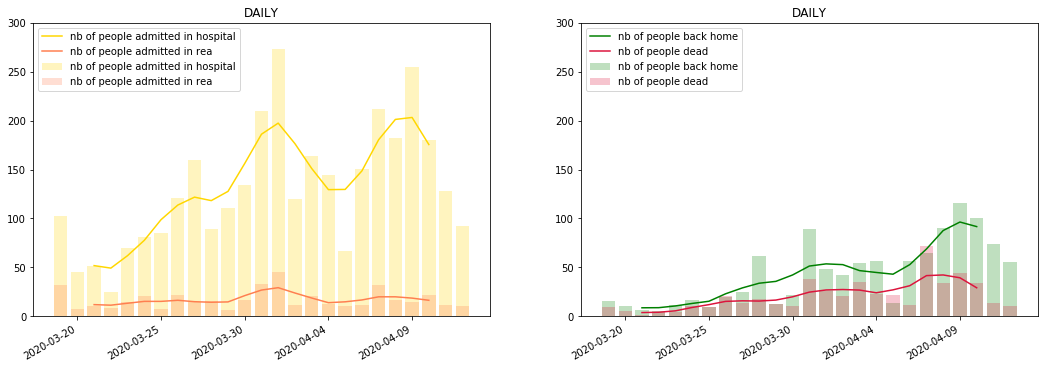

habitants: 1664000 1625000 -2.343750
start with dep 94 --------------------------------------------------------------------------------------- 
Departement 94 Val-de-Marne


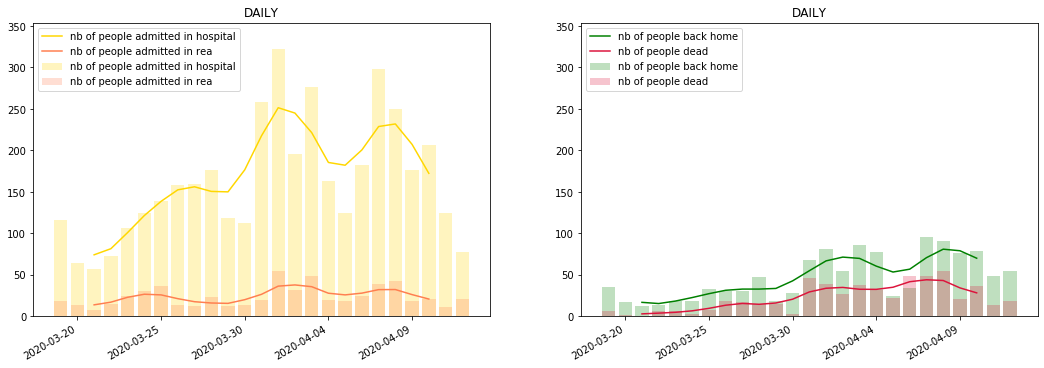

habitants: 1428000 1388000 -2.801120
start with dep 95 --------------------------------------------------------------------------------------- 
Departement 95 Val-d'Oise


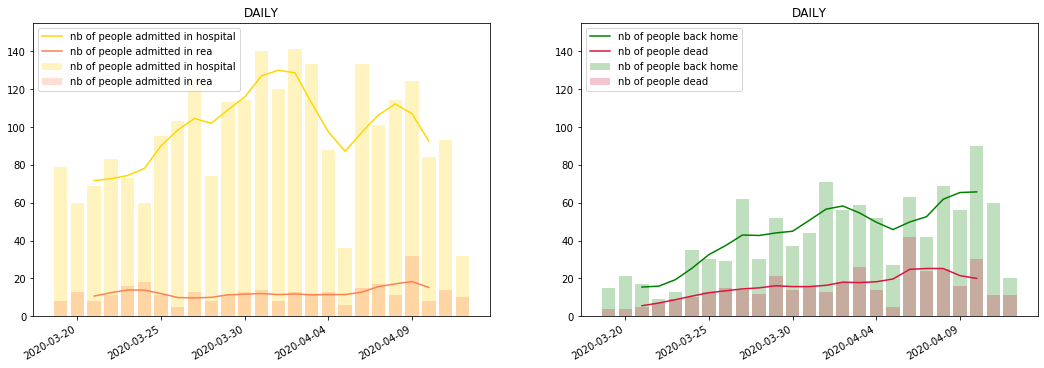

habitants: 1248000 1262000 1.121795
start with dep 971 --------------------------------------------------------------------------------------- 
start with dep 972 --------------------------------------------------------------------------------------- 
start with dep 973 --------------------------------------------------------------------------------------- 
start with dep 974 --------------------------------------------------------------------------------------- 
start with dep 976 --------------------------------------------------------------------------------------- 


In [14]:
# will make check date every 4 days
timeStep=5
slidingFrame=5
points=[]
        
for nbDone,dep in enumerate(np.unique(dfGBnew['dep'].tolist())):
    
    print('start with dep',dep,'--------------------------------------------------------------------------------------- ')
    
    # get departement name
    depNom=dfMvt[dfMvt['Code_departement']==dep]['Departement'].tolist()
    
    # haven't make the effort to analyze OutreMer departments data:
    # encoding is not the same in INSEE and datagouv
    if len(depNom)>0:
        
        depNom=depNom[0]
        print('Departement',dep,depNom)
        
        # select data only for this department
        depData=dfGBnew[dfGBnew['dep']==dep]
        #print(depData)

        # compute sliding mean for each column
        depData['incid_hosp_sliding']=depData['incid_hosp'].rolling(slidingFrame, win_type='triang',center=True).mean()
        depData['incid_rea_sliding']=depData['incid_rea'].rolling(slidingFrame, win_type='triang',center=True).mean()
        depData['incid_dc_sliding']=depData['incid_dc'].rolling(slidingFrame, win_type='triang',center=True).mean()
        depData['incid_rad_sliding']=depData['incid_rad'].rolling(slidingFrame, win_type='triang',center=True).mean()
            
        #print(depData[5:10])

        # to have same yaxis on every chart, take max for of all variables
        yaxis_max=np.max(depData[['incid_hosp','incid_rea','incid_rad','incid_dc']].max(axis=0))*1.1
        yaxis_max=max(100,yaxis_max)
        
        plt.figure(figsize=(18,6))
        plt.subplot(121)
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
        plt.bar(depData['date'].tolist(),depData['incid_hosp'],color='gold',label='nb of people admitted in hospital',alpha=0.25)
        plt.plot(depData['date'].tolist(),depData['incid_hosp_sliding'],color='gold',label='nb of people admitted in hospital')        
        plt.bar(depData['date'].tolist(),depData['incid_rea'],color='coral',label='nb of people admitted in rea',alpha=0.25)
        plt.plot(depData['date'].tolist(),depData['incid_rea_sliding'],color='coral',label='nb of people admitted in rea')
        plt.gcf().autofmt_xdate()
        plt.ylim((0,yaxis_max))
        plt.title('DAILY')
        plt.legend(loc='upper left')

        plt.subplot(122)
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
        plt.bar(depData['date'].tolist(),depData['incid_rad'],color='green',label='nb of people back home',alpha=0.25)
        plt.plot(depData['date'].tolist(),depData['incid_rad_sliding'],color='green',label='nb of people back home')
        plt.bar(depData['date'].tolist(),depData['incid_dc'],color='crimson',label='nb of people dead',alpha=0.25)
        plt.plot(depData['date'].tolist(),depData['incid_dc_sliding'],color='crimson',label='nb of people dead')
        plt.gcf().autofmt_xdate()
        plt.ylim((0,yaxis_max))
        plt.title('DAILY')
        plt.legend(loc='upper left')
        plt.show()
        
        # get the data of population movement for this department
        depNuit=dfMvt[dfMvt['Code_departement']==dep]
        #print(depNuit)

        # compute difference and increase of inhabitants (purcentage not accurate in the csv)
        habitant=int(depNuit['Scenario1_Nuitees_avant_confinement'].astype(int))
        habitantApres=habitant+int(depNuit['Scenario1_Nuiteestotales_ecart_lie_au_confinement'].astype(int))        
        habitantIncrease=float((habitantApres/habitant)-1)*100
        print('habitants: {} {} {:2f}'.format(habitant,habitantApres,habitantIncrease))
            
        # list of data for analysis (start at firstDay+2 because of sliding means)
        dateList=depData[2::timeStep]['date'].tolist()       
        #print('dateList:',dateList)
        
        # get first data as reference
        firstData=depData[depData['date']==dateList[0]]        
        #print('firstData:',firstData)
        
        # for each check date
        for date in dateList:
            # get data 
            thisData=depData[depData['date']==date]
            #print('thisData:',thisData)
            # check if we don't have nan or 0 division
            if int(firstData['incid_hosp_sliding'])+int(firstData['incid_rea_sliding'])>0 \
                and not np.isnan(thisData['incid_hosp_sliding']).tolist()[0] \
                and not np.isnan(thisData['incid_rea_sliding']).tolist()[0] :
                # append a point with these data containing hospital+rea admissions                
                acceleration=(int(thisData['incid_hosp_sliding'])+int(thisData['incid_rea_sliding']))-(int(firstData['incid_hosp_sliding'])+int(firstData['incid_rea_sliding']))
                accelerationPrct=10000*acceleration/habitant
                points.append([date,dep,dateList[0],habitant,habitantIncrease,acceleration,accelerationPrct])
                
            else:
                points.append([date,dep,dateList[0],habitant,habitantIncrease,np.nan,np.nan])
            

        #if nbDone>5:
        #    break
            
# make a dataframe of it
points=pd.DataFrame(points,columns=['date','dep','firstDate','habitant','habitantIncrease','admissionIncrease','admissionIncreasePrct'])

# print some remarkable values

In [15]:
# departments where population has decreased a lot
print(np.unique(points[points['habitantIncrease']<=-5]['dep']))
# department where population has increased a lot
print(np.unique(points[points['habitantIncrease']>=5]['dep']))
# department where population hasn't really change
print(np.unique(points[(points['habitantIncrease']<0.5) & (points['habitantIncrease']>-0.5)]['dep']))
# department with lowest and highest population
pointsSorted=points.sort_values(by='habitant').drop_duplicates(['dep'])
print(pointsSorted.head(10)['dep'].tolist())
print(pointsSorted.tail(10)['dep'].tolist())

['05' '65' '73' '74' '75' '92']
['07' '32' '43' '46' '89']
['11' '18' '19' '45' '49' '54' '59' '64' '76']
['48', '23', '90', '15', '09', '2A', '52', '46', '04', '55']
['44', '31', '77', '93', '92', '33', '69', '13', '75', '59']


# Correlation nb habitants / acceleration des admissions

--------------------------------------- 2020-03-21T00:00:00.000000000 --------------------------------------------------------
acceleration for all departments:0.00 compared to reference
--------------------------------------- 2020-03-26T00:00:00.000000000 --------------------------------------------------------
acceleration for all departments:0.22 compared to reference
--------------------------------------- 2020-03-31T00:00:00.000000000 --------------------------------------------------------
acceleration for all departments:0.30 compared to reference
--------------------------------------- 2020-04-05T00:00:00.000000000 --------------------------------------------------------
acceleration for all departments:0.13 compared to reference
--------------------------------------- 2020-04-10T00:00:00.000000000 --------------------------------------------------------
acceleration for all departments:0.12 compared to reference


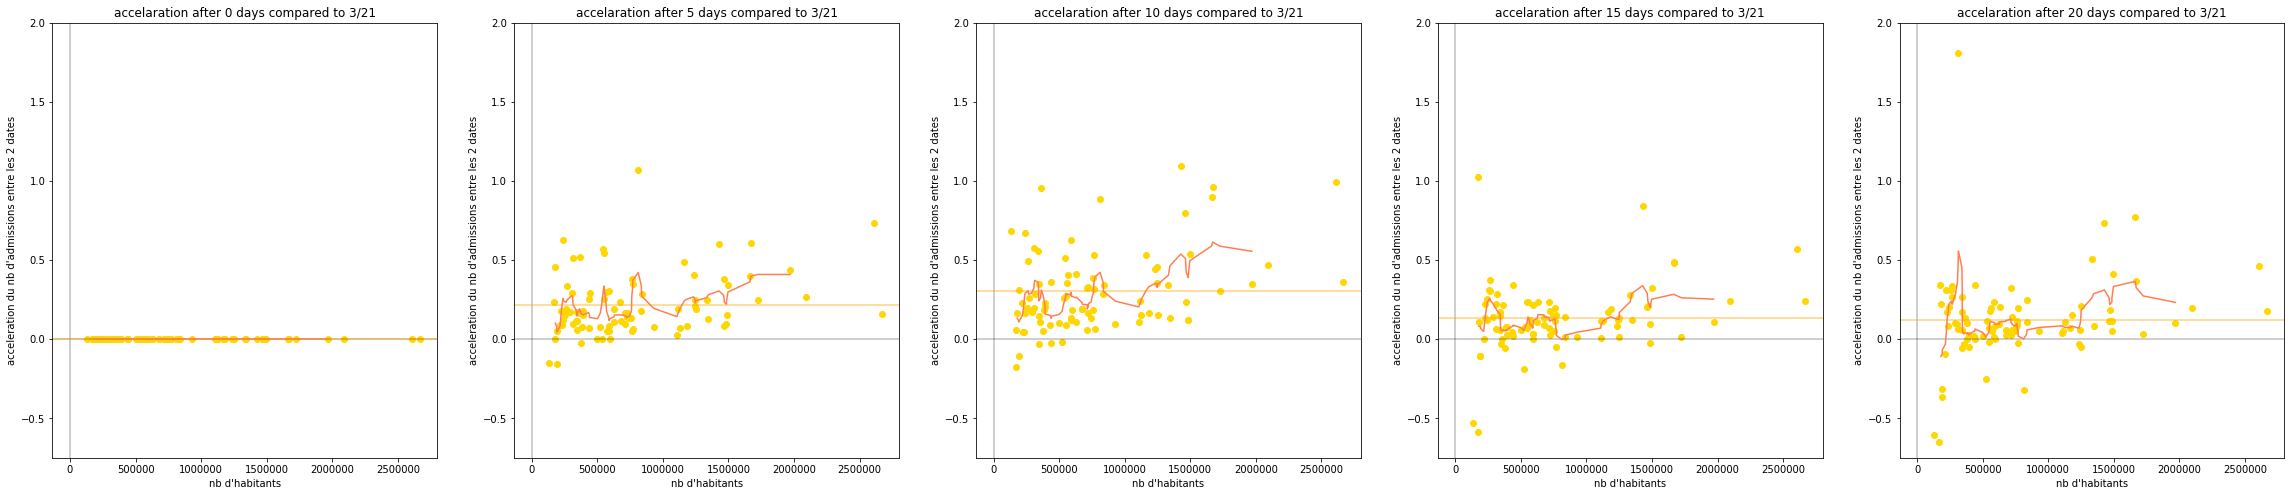

In [16]:
plt.figure(figsize=(8*len(np.unique(points['date'])),8))

for num,date in enumerate(np.unique(points['date'])):
    
    print('---------------------------------------',date,'--------------------------------------------------------')
    
    sub=points[points['date']==date]
    
    sub=sub.dropna()
    
    if(len(sub)>0):
    
        #print(sub)
        firstDate=sub['firstDate'].iloc[0]

        nbDays=(pd.to_datetime(date)-pd.to_datetime(firstDate)).days

        # also compute sliding mean of acceleration by chunk of population
        sub=sub.sort_values(by=['habitant'])
        sub['admissionIncreaseSliding']=sub['admissionIncreasePrct'].rolling(7, win_type='triang',center=True).mean()

        # mean acceleration
        meanAdmissionIncrease=sub['admissionIncreasePrct'].mean()   
        print('acceleration for all departments:{:.2f} compared to reference'.format(meanAdmissionIncrease))

        plt.subplot(1,len(np.unique(points['date'])),num+1)
        plt.title('accelaration after '+str(nbDays)+' days compared to '+str(pd.to_datetime(firstDate).month)+'/'+str(pd.to_datetime(firstDate).day))
        plt.axhline(0, color='black',alpha=0.25)
        plt.axvline(0, color='black',alpha=0.25)
        plt.axhline(meanAdmissionIncrease, color='orange',alpha=0.5)
        plt.scatter(sub['habitant'],sub['admissionIncreasePrct'],color='gold',label='')
        plt.plot(sub['habitant'],sub['admissionIncreaseSliding'],color='coral',label='')
        #plt.axis('equal')
        #plt.legend(loc='upper left')
        plt.ylim((-0.75,2))
        plt.xlabel('nb d\'habitants')
        plt.ylabel('acceleration du nb d\'admissions entre les 2 dates')

        # fitting curve is not very relevant
        #z=np.polyfit(sub['habitant'].tolist(),sub['admissionIncrease'].tolist(),3)
        #p=np.poly1d(z)
        #xp=np.linspace(0,2500000,1000)
        #plt.plot(xp,p(xp),'-')
        #print('-10%->{:.2f} -5%->{:.2f} -2%->{:.2f} -1%->{:.2f} 0%->{:.2f} 1%->{:.2f} 2%->{:.2f} 5%->{:.2f} 10%->{:.2f}'.format(
        #    p(-10),p(-5),p(-2),p(-1),p(0),p(1),p(2),p(5),p(10)))

plt.show()

    
    

# Correlation augmentation du nb d'habitants / acceleration des admissions

--------------------------------------- 2020-03-21T00:00:00.000000000 ------------------------------------------------------
acceleration for all departments:0.00
acceleration for department losing inhabitants:0.00 ( 31 )
acceleration for department gaining inhabitants:0.00 ( 54 )
habitant increase and admission increase over mean: 0 under mean: 0
habitant decrease and admission increase over mean: 0 under_mean: 0
habitant stable and admission increase over mean: 0 under mean: 0
--------------------------------------- 2020-03-26T00:00:00.000000000 ------------------------------------------------------
acceleration for all departments:0.22
acceleration for department losing inhabitants:0.25 ( 31 )
acceleration for department gaining inhabitants:0.20 ( 54 )
habitant increase and admission increase over mean: 18 under mean: 28
habitant decrease and admission increase over mean: 9 under_mean: 13
habitant stable and admission increase over mean: 5 under mean: 12
----------------------------

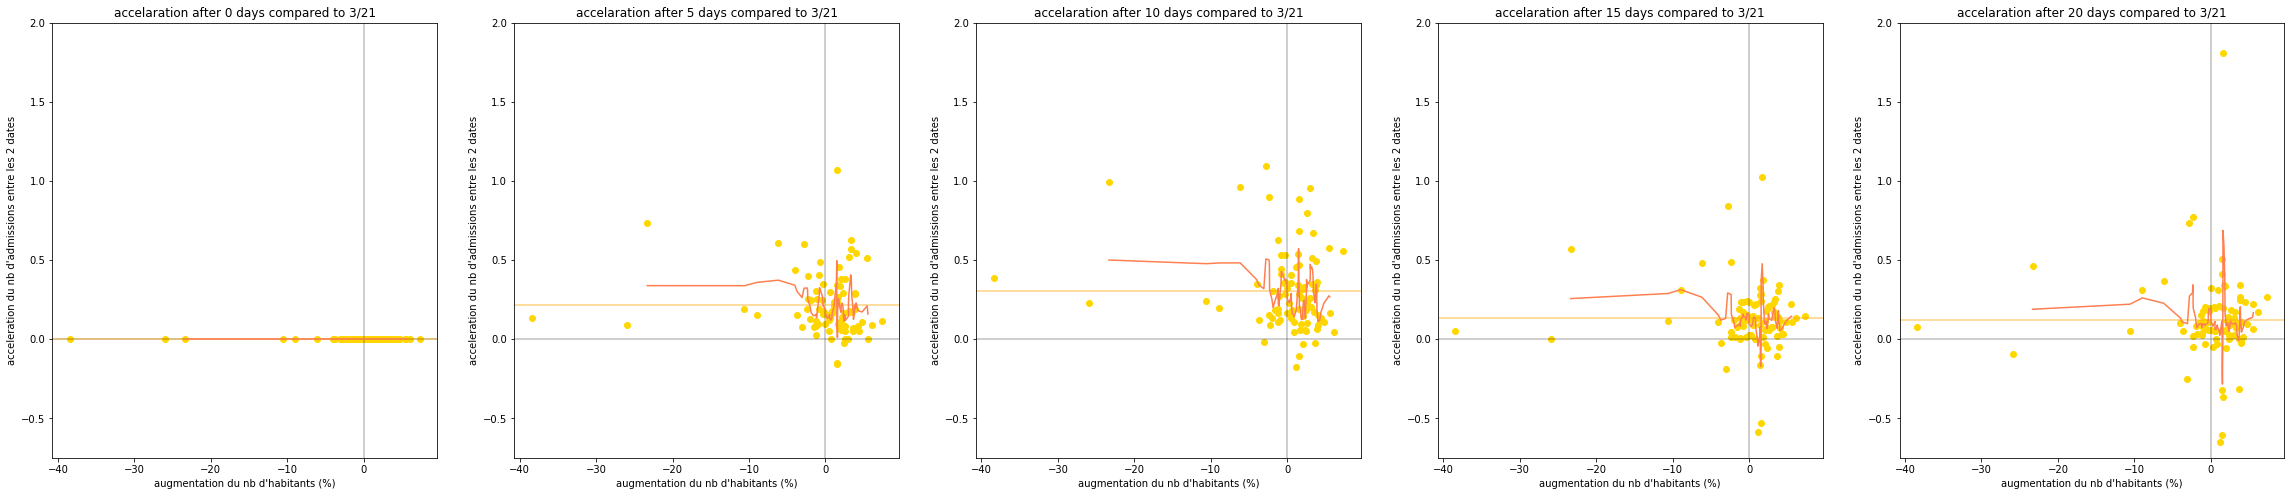

In [17]:
plt.figure(figsize=(8*len(np.unique(points['date'])),8))

for num,date in enumerate(np.unique(points['date'])):
    
    print('---------------------------------------',date,'------------------------------------------------------')
    
    sub=points[points['date']==date]
    
    sub=sub.dropna()
    
    #print(sub)
    firstDate=sub['firstDate'].iloc[0]
    
    # margin to compute 'statistics' 
    mgAdm=0.1
    mgPop=1
    
    '''
    # compute population in 4 quarters of the graph
    up_right=len(sub[(sub['habitantIncrease']>mgPop) &(sub['admissionIncrease']>1+mgAdm)])
    up_left =len(sub[(sub['habitantIncrease']<mgPop) &(sub['admissionIncrease']>1-mgAdm)])
    
    down_right=len(sub[(sub['habitantIncrease']>-mgPop) &(sub['admissionIncrease']<1+mgAdm)])
    down_left =len(sub[(sub['habitantIncrease']<-mgPop) &(sub['admissionIncrease']<1-mgAdm)])
    
    print('habitant increase and admission increase:',up_right)   
    print('habitant decrease and admission increase:',up_left)
    print('habitant increase and admission decrease:',down_right)
    print('habitant decrease and admission decrease:',down_left)    

    up_center=len(sub[(sub['habitantIncrease']>-mgPop)&(sub['habitantIncrease']<mgPop)&(sub['admissionIncrease']>1+mgAdm)])
    down_center=len(sub[(sub['habitantIncrease']>-mgPop)&(sub['habitantIncrease']<mgPop)&(sub['admissionIncrease']<1-mgAdm)])

    print('habitant stable and admission increase:',up_center,'decrease:',down_center)      
    '''
    
    # also compute sliding mean of acceleration by chunk of population
    sub=sub.sort_values(by=['habitantIncrease'])
    sub['admissionIncreaseSliding']=sub['admissionIncreasePrct'].rolling(5, win_type='triang',center=True).mean()

    
    # mean acceleration for all departments
    meanAdmissionIncrease=sub['admissionIncreasePrct'].mean()
    # mean acceleration for losing and gaining inhabitants departments
    meanAdmissionIncreaseDown=sub[sub['habitantIncrease']<=0]['admissionIncreasePrct'].mean()
    meanAdmissionIncreaseUp=sub[sub['habitantIncrease']>0]['admissionIncreasePrct'].mean()
    
    print('acceleration for all departments:{:.2f}'.format(meanAdmissionIncrease))
    print('acceleration for department losing inhabitants:{:.2f}'.format(meanAdmissionIncreaseDown),'(',len(sub[sub['habitantIncrease']<=0]),')') 
    print('acceleration for department gaining inhabitants:{:.2f}'.format(meanAdmissionIncreaseUp),'(',len(sub[sub['habitantIncrease']>0]),')')
    
    
    # the "gros grain" analysis to conclude if population movements has an impact on the spread
    
    # compute population in 4 quarters of the graph using mean acceleration
    up_right=len(sub[(sub['habitantIncrease']>=mgPop) &(sub['admissionIncreasePrct']>meanAdmissionIncrease)])
    up_left =len(sub[(sub['habitantIncrease']<=-mgPop)&(sub['admissionIncreasePrct']>meanAdmissionIncrease)])
    
    down_right=len(sub[(sub['habitantIncrease']>=mgPop) &(sub['admissionIncreasePrct']<meanAdmissionIncrease)])
    down_left =len(sub[(sub['habitantIncrease']<=-mgPop)&(sub['admissionIncreasePrct']<meanAdmissionIncrease)])
    
    print('habitant increase and admission increase over mean:',up_right,'under mean:',down_right)   
    print('habitant decrease and admission increase over mean:',up_left,'under_mean:',down_left)

    # compute center of departement: the one with popluation that almost don't change
    up_center=len(sub[(sub['habitantIncrease']>-mgPop)&(sub['habitantIncrease']<mgPop)&(sub['admissionIncreasePrct']>meanAdmissionIncrease)])
    down_center=len(sub[(sub['habitantIncrease']>-mgPop)&(sub['habitantIncrease']<mgPop)&(sub['admissionIncreasePrct']<meanAdmissionIncrease)])

    print('habitant stable and admission increase over mean:',up_center,'under mean:',down_center)      
    
    
    # very large increase ... where is that?
    #print(sub[sub['admissionIncreasePrct']>1.5])
    
    # nb of days to reference
    nbDays=(pd.to_datetime(date)-pd.to_datetime(firstDate)).days
    
    plt.subplot(1,len(np.unique(points['date'])),num+1)
    plt.title('accelaration after '+str(nbDays)+' days compared to '+str(pd.to_datetime(firstDate).month)+'/'+str(pd.to_datetime(firstDate).day))
    plt.axhline(0, color='black',alpha=0.25)
    plt.axvline(0, color='black',alpha=0.25)
    plt.axhline(meanAdmissionIncrease, color='orange',alpha=0.5)
    plt.scatter(sub['habitantIncrease'],sub['admissionIncreasePrct'],color='gold',label='')
    plt.plot(sub['habitantIncrease'],sub['admissionIncreaseSliding'],color='coral',label='')
    #plt.axis('equal')
    #plt.legend(loc='upper left')
    plt.ylim((-0.75,2))
    plt.xlabel('augmentation du nb d\'habitants (%)')
    plt.ylabel('acceleration du nb d\'admissions entre les 2 dates')
    
    # fitting curve is not very relevant
    #z=np.polyfit(sub['habitantIncrease'].tolist(),sub['admissionIncrease'].tolist(),3)
    #p=np.poly1d(z)
    #xp=np.linspace(-40,10,50)
    #plt.plot(xp,p(xp),'-')
    #print('-10%->{:.2f} -5%->{:.2f} -2%->{:.2f} -1%->{:.2f} 0%->{:.2f} 1%->{:.2f} 2%->{:.2f} 5%->{:.2f} 10%->{:.2f}'.format(
    #    p(-10),p(-5),p(-2),p(-1),p(0),p(1),p(2),p(5),p(10)))

plt.show()
    

In [18]:
raise

RuntimeError: No active exception to reraise

# Sandbox

In [ ]:
timeSteps=[5]
for step in timeSteps:
    
    print('start with step',step,'days --------------------------------------------------------------------------------------- ')

    pointsAll=[]
    points2All=[]

    for nbDone,dep in enumerate(np.unique(dfGB['dep'].tolist())):

        print('start with dep',dep,'---------------------------------------------------------- ')

        # get the name of the department
        depNom=dfMvt[dfMvt['Code_departement']==dep]['Departement'].tolist()

        if len(depNom)>0:
            depNom=depNom[0]
            print('Departement',dep,depNom)

            # ---------------------------------------------------------------------------------------------
            
            # select data for the current department
            #print(dep)
            depData=dfGB[dfGB['dep']==dep]
            #print(depData)

            # compute sortie: each day difference rad
            depData['sortie']=depData['rad']-depData['rad'].shift(1)

            # set dates with a step
            dateList=depData[2::step]['date'].tolist()
            #dateList=['2020-03-18','2020-03-21','2020-03-24','2020-03-3','2020-04-03','2020-04-07','2020-04-10']
            #print(dateList)

            # compute difference for a step
            depData['sortieWeek']=depData['rad']-depData['rad'].shift(step)
            depData['admissionWeek']=depData['hosp']-depData['hosp'].shift(step)+depData['sortie'].shift(step)
            depData['deadWeek']=depData['dc']-depData['dc'].shift(step)
                       
            #print('depData:',depData[:5])

            # ---------------------------------------------------------------------------------------------
            
            # get the data of population movement for this department
            depNuit=dfMvt[dfMvt['Code_departement']==dep]
            #print(depNuit)

            nuitAvant=int(depNuit['Scenario1_Nuitees_avant_confinement'].astype(int))
            nuitApres=nuitAvant+int(depNuit['Scenario1_Nuiteestotales_ecart_lie_au_confinement'].astype(int))
            
            nuitIncrease=float((nuitApres/nuitAvant)-1)*100
            
            print('nuits:',nuitAvant,nuitApres,nuitIncrease)
            
            if False:
                print('nuitIncrease:',nuitIncrease)
                print(points['admissionWeekRaise'])

            # ---------------------------------------------------------------------------------------------
            
            # compute sortie, admission and dead per step as prct of population
            # before lock down
            depData['sortieWeekRatioAv']=10000*depData['sortieWeek']/nuitAvant
            depData['admissionWeekRatioAv']=10000*depData['admissionWeek']/nuitAvant
            depData['deadWeekRatioAv']=10000*depData['deadWeek']/nuitAvant
            # after lockdown
            depData['sortieWeekRatioAp']=10000*depData['sortieWeek']/nuitApres
            depData['admissionWeekRatioAp']=10000*depData['admissionWeek']/nuitApres
            depData['deadWeekRatioAp']=10000*depData['deadWeek']/nuitApres

            #print('depData:',depData)
            
            # keep points for the choosen dates
            points=depData[depData['date'].isin(dateList)]

            # get weelky (step) admission raise
            points['admissionWeekRaise']=points['admissionWeek']-points['admissionWeek'].shift(1)

            #print('points:',points)

            if False:
                plt.figure(figsize=(12,6))
                plt.subplot(111)
                plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
                plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
                plt.plot(points['date'],points['admissionWeekRaise'],color='gold',label='weekly admission raise')
                plt.axhline(0, color='black')
                plt.gcf().autofmt_xdate()
                plt.legend(loc='upper left')
                plt.show()
            
            # ---------------------------------------------------------------------------------------------
              
            print('points:',points)
            
            for date,adwr,adwrav,adwrap in zip(points['date'],points['admissionWeekRaise'],points['admissionWeekRatioAv'],points['admissionWeekRatioAp']):
                pointsAll.append([date,adwr,nuitIncrease,adwrav,adwrav])
            
            if nbDone>5:
                break

    pointsAll=pd.DataFrame(pointsAll,columns=['date','admissionRaise','nuitRaise','admWeekRatioAv','admWeekRatioAp'])    
    pointsAll=pointsAll.dropna(axis=0)
    
    for date in np.unique(pointsAll['date']):    
        sub=pointsAll[pointsAll['date']==date]
        plt.figure(figsize=(12,12))
        plt.subplot(111)
        plt.title(str(date)+' diff on '+str(step)+' days')
        plt.scatter(sub['nuitRaise'],sub['admissionRaise'],color='gold',label='')
        plt.axis('equal')
        #plt.legend(loc='upper left')
        plt.xlabel('augmentation du nb d\'habitants (%)')
        plt.ylabel('augmentation du nb d\'admissions sur '+str(step)+' jours (%)')
        plt.show()
        
    for date in np.unique(pointsAll['date']):    
        sub=pointsAll[pointsAll['date']==date]
        plt.figure(figsize=(12,12))
        plt.subplot(111)
        plt.title(str(date)+' diff on '+str(step)+' days')
        plt.scatter(sub['nuitRaise'],sub['admWeekRatioAv']/sub['admWeekRatioAp'],color='gold',label='')
        plt.axis('equal')
        #plt.legend(loc='upper left')
        plt.xlabel('augmentation du nb d\'habitants (%)')
        plt.ylabel('ration entre admission avant/apres '+str(step)+' jours (%)')
        plt.show()

# Correlation augmentation du nb d'habitants / acceleration des admissions

In [ ]:
plt.figure(figsize=(8*len(np.unique(points['date'])),8))

for num,date in enumerate(np.unique(points['date'])):
    
    print('---------------------------------------',date,'--------------------------------------------------------')
    
    sub=points[points['date']==date]
    
    sub=sub.dropna()
    
    #print(sub)
    firstDate=sub['firstDate'].iloc[0]
    
    nbDays=(pd.to_datetime(date)-pd.to_datetime(firstDate)).days
    
    # compute population in 4 quarters of the graph
    up_right=len(sub[(sub['habitantIncrease']>0) &(sub['admissionIncrease']>1)])
    up_left =len(sub[(sub['habitantIncrease']<0) &(sub['admissionIncrease']>1)])
    
    down_right=len(sub[(sub['habitantIncrease']>0) &(sub['admissionIncrease']<1)])
    down_left =len(sub[(sub['habitantIncrease']<0) &(sub['admissionIncrease']<1)])
    
    print('habitant increase and admission increase:',up_right)   
    print('habitant decrease and admission increase:',up_left)
    print('habitant increase and admission decrease:',down_right)
    print('habitant decrease and admission decrease:',down_left)    

    # also compute sliding mean of acceleration by chunk of population increase
    sub=sub.sort_values(by=['habitantIncrease'])
    sub['admissionIncreaseSliding']=sub['admissionIncrease'].rolling(7, win_type='triang',center=True).mean()

    
    # mean acceleration
    meanAdmissionIncrease=sub['admissionIncrease'].mean()
    
    meanAdmissionIncreaseDown=sub[sub['habitantIncrease']<=0]['admissionIncrease'].mean()
    meanAdmissionIncreaseUp=sub[sub['habitantIncrease']>0]['admissionIncrease'].mean()
    
    print('acceleration for all departments:{:.2f}'.format(meanAdmissionIncrease))
    print('acceleration for department losing inhabitants:{:.2f}'.format(meanAdmissionIncreaseDown),'(',len(sub[sub['habitantIncrease']<=0]),')') 
    print('acceleration for department gaining inhabitants:{:.2f}'.format(meanAdmissionIncreaseUp),'(',len(sub[sub['habitantIncrease']>0]),')')                                                           
    
    
    # compute population in 4 quarters of the graph using mean acceleration
    up_right=len(sub[(sub['habitantIncrease']>=1) &(sub['admissionIncrease']>meanAdmissionIncrease)])
    up_left =len(sub[(sub['habitantIncrease']<=-1) &(sub['admissionIncrease']>meanAdmissionIncrease)])
    
    down_right=len(sub[(sub['habitantIncrease']>=1) &(sub['admissionIncrease']<meanAdmissionIncrease)])
    down_left =len(sub[(sub['habitantIncrease']<=-1) &(sub['admissionIncrease']<meanAdmissionIncrease)])
    
    print('habitant increase and admission increase over mean:',up_right,'under mean:',down_right)   
    print('habitant decrease and admission increase over mean:',up_left,'under_mean:',down_left)

    # compute center of departement: the one with popluation that almost don't change
    up_center=len(sub[(sub['habitantIncrease']>-1)&(sub['habitantIncrease']<1)&(sub['admissionIncrease']>meanAdmissionIncrease)])
    down_center=len(sub[(sub['habitantIncrease']>-1)&(sub['habitantIncrease']<1)&(sub['admissionIncrease']<meanAdmissionIncrease)])

    print('habitant stable and admission increase over mean:',up_center,'under mean:',down_center)      
      
        
    plt.subplot(1,len(np.unique(points['date'])),num+1)
    plt.title('accelaration after '+str(nbDays)+' days compared to '+str(pd.to_datetime(firstDate).month)+'/'+str(pd.to_datetime(firstDate).day))
    plt.axhline(1, color='black',alpha=0.25)
    plt.axvline(0, color='black',alpha=0.25)
    plt.axhline(meanAdmissionIncrease, color='orange',alpha=0.5)
    plt.scatter(sub['habitantIncrease'],sub['admissionIncrease'],color='gold',label='')
    plt.plot(sub['habitantIncrease'],sub['admissionIncreaseSliding'],color='coral',label='')
    #plt.axis('equal')
    #plt.legend(loc='upper left')
    plt.ylim((-5,20))
    plt.xlabel('augmentation du nb d\'habitants (%)')
    plt.ylabel('ratio du nb d\'admissions entre les 2 dates')
    
    #z=np.polyfit(sub['habitantIncrease'].tolist(),sub['admissionIncrease'].tolist(),3)
    #p=np.poly1d(z)
    #xp=np.linspace(-40,10,50)
    #plt.plot(xp,p(xp),'-')
    #print('-10%->{:.2f} -5%->{:.2f} -2%->{:.2f} -1%->{:.2f} 0%->{:.2f} 1%->{:.2f} 2%->{:.2f} 5%->{:.2f} 10%->{:.2f}'.format(
    #    p(-10),p(-5),p(-2),p(-1),p(0),p(1),p(2),p(5),p(10)))

plt.show()
     